In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Yellow Taxi Feb data

## Data Importing and Data Summarisation

In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Data/yellow_tripdata_2020-02.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         1  2020-02-01 00:17:35   2020-02-01 00:30:32   
1           1         1  2020-02-01 00:32:47   2020-02-01 01:05:36   
2           2         1  2020-02-01 00:31:44   2020-02-01 00:43:28   
3           3         2  2020-02-01 00:07:35   2020-02-01 00:31:39   
4           4         2  2020-02-01 00:51:43   2020-02-01 01:01:29   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.60         1.0                  N   
1              1.0           4.80         1.0                  N   
2              1.0           3.20         1.0                  N   
3              1.0           4.38         1.0                  N   
4              1.0           2.28         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           145             7             1         11.0    0.5      0.5   
1            45            61             1         21.5    3.0      0.5   
2           186           140             1         11.0    3.0      0.5   
3           144           140             1         18.0    0.5      0.5   
4           238           152             2          9.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.45           0.0                    0.3         14.75   
1        6.30           0.0                    0.3         31.60   
2        1.00           0.0                    0.3         15.80   
3        3.00           0.0                    0.3         24.80   
4        0.00           0.0                    0.3         10.80   

   congestion_surcharge  airport_fee  
0                   0.0          NaN  
1                   2.5          NaN  
2                   2.5          NaN  
3                   2.5          NaN  
4                   0.0          NaN

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 961.2+ MB


In [ ]:
trip_data.shape

(6299367, 20)

## Data Cleaning and Manipulation Steps

In [ ]:
#removing unwanted columns
trip_data.drop(['Unnamed: 0','VendorID','RatecodeID','store_and_fwd_flag','airport_fee','congestion_surcharge'],inplace = True,axis =1)

In [ ]:
#converting object to datetime object
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
dtypes: datetime64[ns](2), float64(9), int64(3)
memory usage: 672.8 MB


In [ ]:
# droping nan values
trip_data = trip_data.dropna()

In [ ]:

# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250533 entries, 0 to 6250532
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  duration               float64       
 15  trip_pickup_hour       int64         
 16  trip_dropoff_hour      int64         
 17  trip_day               object        
dtypes: datetime64[ns](2), 

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-02-01 00:17:35   2020-02-01 00:30:32              1.0           2.60   
1  2020-02-01 00:32:47   2020-02-01 01:05:36              1.0           4.80   
2  2020-02-01 00:31:44   2020-02-01 00:43:28              1.0           3.20   
3  2020-02-01 00:07:35   2020-02-01 00:31:39              1.0           4.38   
4  2020-02-01 00:51:43   2020-02-01 01:01:29              1.0           2.28   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           145             7             1         11.0    0.5      0.5   
1            45            61             1         21.5    3.0      0.5   
2           186           140             1         11.0    3.0      0.5   
3           144           140             1         18.0    0.5      0.5   
4           238           152             2          9.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount   duration  \
0        2.45           0.0                    0.3         14.75  12.950000   
1        6.30           0.0                    0.3         31.60  32.816667   
2        1.00           0.0                    0.3         15.80  11.733333   
3        3.00           0.0                    0.3         24.80  24.066667   
4        0.00           0.0                    0.3         10.80   9.766667   

   trip_pickup_hour  trip_dropoff_hour  trip_day  
0                 0                  0  Saturday  
1                 0                  1  Saturday  
2                 0                  0  Saturday  
3                 0                  0  Saturday  
4                 0                  1  Saturday

Now our Total_amount is basically Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'.

In [ ]:
#combining the all taxes to one, then drop that columns  
trip_data['total_tax'] = trip_data['extra'] + trip_data['mta_tax'] + trip_data['improvement_surcharge'] 
trip_data.drop(['extra','mta_tax','improvement_surcharge'],inplace = True,axis = 1)

In [ ]:
# covert passenger count to int, float does not make sense
trip_data['passenger_count']=trip_data['passenger_count'].astype(int)

For payment_type we have the following mapping for categories: 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [ ]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1    4705735
2    1494468
3      32081
4      18249
Name: payment_type, dtype: int64

In [ ]:
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data['payment_type'] = trip_data.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-02-01 00:17:35   2020-02-01 00:30:32                1           2.60   
1  2020-02-01 00:32:47   2020-02-01 01:05:36                1           4.80   
2  2020-02-01 00:31:44   2020-02-01 00:43:28                1           3.20   
3  2020-02-01 00:07:35   2020-02-01 00:31:39                1           4.38   
4  2020-02-01 00:51:43   2020-02-01 01:01:29                1           2.28   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           145             7  Credit_card         11.0        2.45   
1            45            61  Credit_card         21.5        6.30   
2           186           140  Credit_card         11.0        1.00   
3           144           140  Credit_card         18.0        3.00   
4           238           152         Cash          9.5        0.00   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         14.75  12.950000                 0                  0   
1           0.0         31.60  32.816667                 0                  1   
2           0.0         15.80  11.733333                 0                  0   
3           0.0         24.80  24.066667                 0                  0   
4           0.0         10.80   9.766667                 0                  1   

   trip_day  total_tax  
0  Saturday        1.3  
1  Saturday        3.8  
2  Saturday        3.8  
3  Saturday        1.3  
4  Saturday        1.3

In [ ]:
#Save to cleaned csv
trip_data.to_csv('/content/drive/MyDrive/Data/yellow_tripdata_2020-02_cleaned.csv',index=False)

## Data Analysis and Visualisation

In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Data/yellow_tripdata_2020-02_cleaned.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-02-01 00:17:35   2020-02-01 00:30:32                1           2.60   
1  2020-02-01 00:32:47   2020-02-01 01:05:36                1           4.80   
2  2020-02-01 00:31:44   2020-02-01 00:43:28                1           3.20   
3  2020-02-01 00:07:35   2020-02-01 00:31:39                1           4.38   
4  2020-02-01 00:51:43   2020-02-01 01:01:29                1           2.28   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           145             7  Credit_card         11.0        2.45   
1            45            61  Credit_card         21.5        6.30   
2           186           140  Credit_card         11.0        1.00   
3           144           140  Credit_card         18.0        3.00   
4           238           152         Cash          9.5        0.00   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         14.75  12.950000                 0                  0   
1           0.0         31.60  32.816667                 0                  1   
2           0.0         15.80  11.733333                 0                  0   
3           0.0         24.80  24.066667                 0                  0   
4           0.0         10.80   9.766667                 0                  1   

   trip_day  total_tax  
0  Saturday        1.3  
1  Saturday        3.8  
2  Saturday        3.8  
3  Saturday        1.3  
4  Saturday        1.3



### Univariate Analysis

CONTINUOUS VARIABLE DISTRIBUTION

In [ ]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_tax','total_amount','duration','trip_distance','tolls_amount']

In [ ]:
trip_data[continuous_columns].head()

fare_amount  tip_amount  total_tax  total_amount   duration  trip_distance  \
0         11.0        2.45        1.3         14.75  12.950000           2.60   
1         21.5        6.30        3.8         31.60  32.816667           4.80   
2         11.0        1.00        3.8         15.80  11.733333           3.20   
3         18.0        3.00        1.3         24.80  24.066667           4.38   
4          9.5        0.00        1.3         10.80   9.766667           2.28   

   tolls_amount  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [ ]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

fare_amount    tip_amount     total_tax  total_amount      duration  \
count  6.250533e+06  6.250533e+06  6.250533e+06  6.250533e+06  6.250533e+06   
mean   1.245649e+01  2.237489e+00  1.887136e+00  1.844633e+01  1.602990e+01   
std    1.175894e+01  2.667471e+00  1.261442e+00  1.435989e+01  6.168317e+01   
min   -7.500000e+02 -9.300000e+01 -5.300000e+00 -7.503000e+02 -9.990667e+03   
25%    6.500000e+00  0.000000e+00  8.000000e-01  1.127000e+01  6.516667e+00   
50%    9.000000e+00  1.960000e+00  1.300000e+00  1.430000e+01  1.075000e+01   
75%    1.400000e+01  2.950000e+00  3.300000e+00  1.980000e+01  1.716667e+01   
max    6.052000e+03  5.490200e+02  9.086000e+01  6.061420e+03  3.147617e+03   

       trip_distance  tolls_amount  
count   6.250533e+06  6.250533e+06  
mean    2.789204e+00  3.170078e-01  
std     3.640196e+00  1.658398e+00  
min     0.000000e+00 -3.823000e+01  
25%     9.500000e-01  0.000000e+00  
50%     1.600000e+00  0.000000e+00  
75%     2.860000e+00  0.000000e+00  
max     3.699400e+02  9.255000e+02

Since we are trying to understand the distribution of continuous numerical variables, we will be using

histograms box plots Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


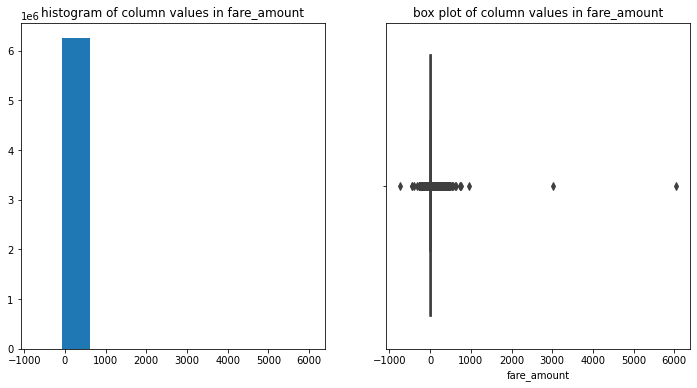

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


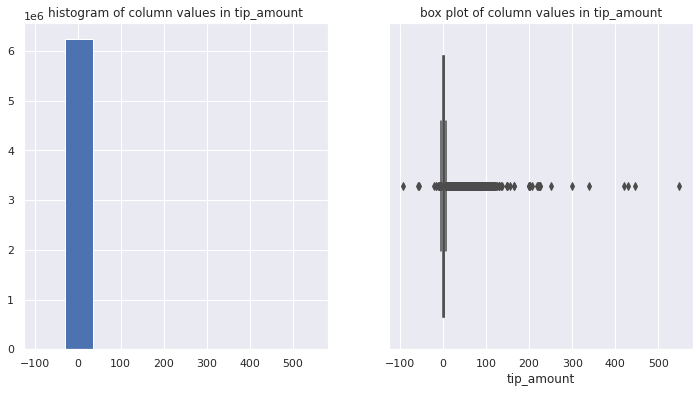

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


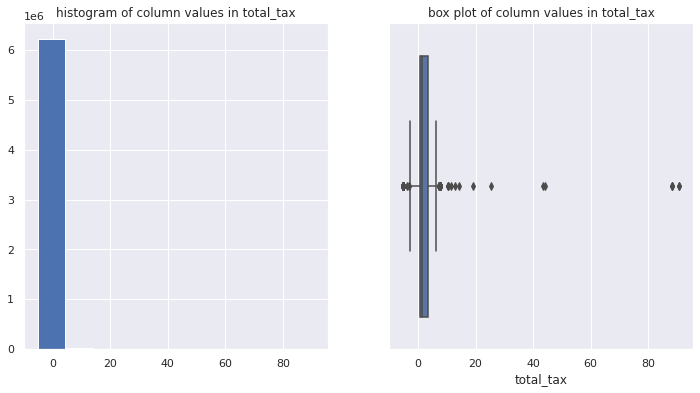

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


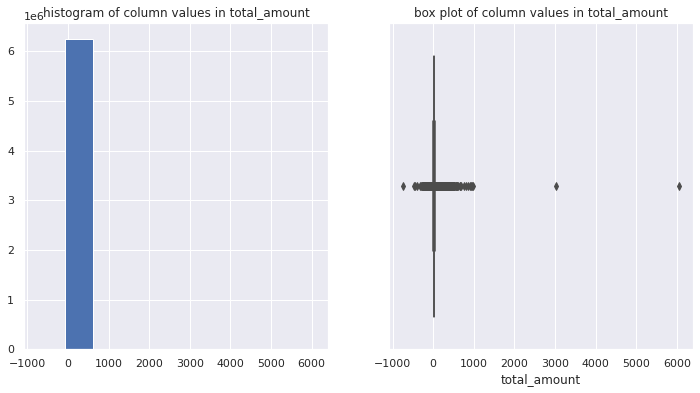

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


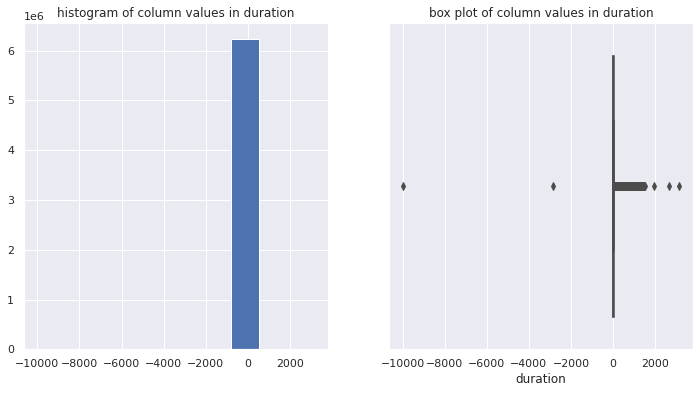

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


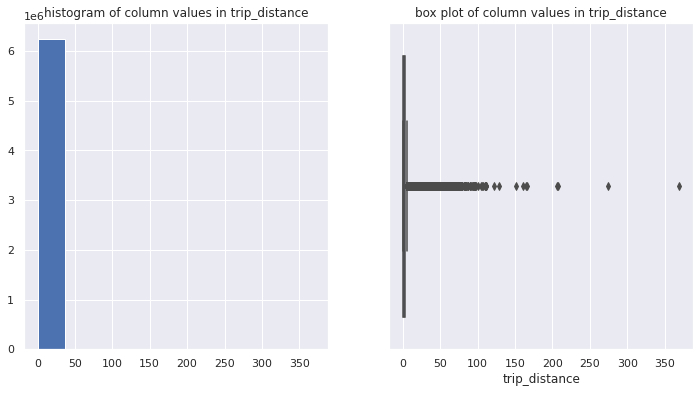

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


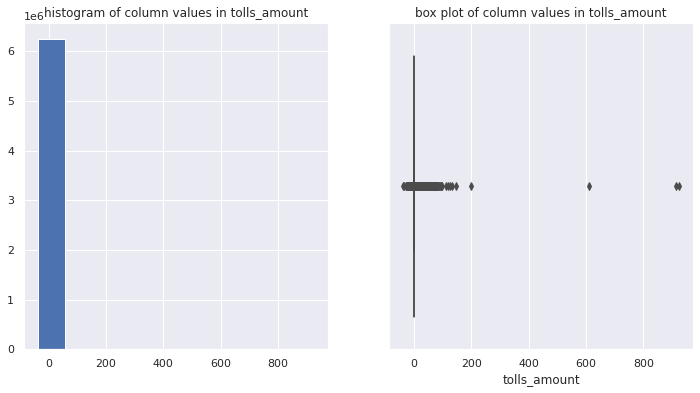

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense fare_amount tip_amount total_taxes tolls_amount total_amount duration

Let's just observe how the negative values in each of these columns look like

In [ ]:
trip_data.loc[trip_data['fare_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
93       2020-02-01 00:40:09   2020-02-01 00:40:56                5   
229      2020-02-01 00:21:29   2020-02-01 00:23:17                1   
411      2020-02-01 00:36:53   2020-02-01 00:40:24                1   
725      2020-02-01 00:04:51   2020-02-01 00:06:36                1   
907      2020-02-01 00:59:01   2020-02-01 01:22:38                1   
...                      ...                   ...              ...   
6249602  2020-02-29 23:42:01   2020-02-29 23:48:28                1   
6250088  2020-02-29 23:58:03   2020-03-01 00:10:03                1   
6250319  2020-02-29 23:57:34   2020-02-29 23:59:33                1   
6250353  2020-02-29 23:32:22   2020-02-29 23:47:16                1   
6250355  2020-02-29 23:52:34   2020-02-29 23:57:48                1   

         trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
93                0.02           100           100    No_charge         -2.5   
229               0.03           244           244      Dispute         -3.0   
411               0.00           230           230    No_charge         -4.0   
725               0.12           230           230         Cash         -3.0   
907               6.53            48           129      Dispute        -22.5   
...                ...           ...           ...          ...          ...   
6249602           1.36           142           162         Cash         -6.5   
6250088           1.84           249             4    No_charge         -9.5   
6250319           0.25           140           141      Dispute         -3.5   
6250353           2.38            79           230    No_charge        -11.0   
6250355           0.89           230            48    No_charge         -5.5   

         tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
93              0.0           0.0          -6.3   0.783333                 0   
229             0.0           0.0          -4.3   1.800000                 0   
411             0.0           0.0          -7.8   3.516667                 0   
725             0.0           0.0          -6.8   1.750000                 0   
907             0.0           0.0         -26.3  23.616667                 0   
...             ...           ...           ...        ...               ...   
6249602         0.0           0.0         -10.3   6.450000                23   
6250088         0.0           0.0         -13.3  12.000000                23   
6250319         0.0           0.0          -7.3   1.983333                23   
6250353         0.0           0.0         -14.8  14.900000                23   
6250355         0.0           0.0          -9.3   5.233333                23   

         trip_dropoff_hour  trip_day  total_tax  
93                       0  Saturday       -1.3  
229                      0  Saturday       -1.3  
411                      0  Saturday       -1.3  
725                      0  Saturday       -1.3  
907                      1  Saturday       -1.3  
...                    ...       ...        ...  
6249602                 23  Saturday       -1.3  
6250088                  0  Saturday       -1.3  
6250319                 23  Saturday       -1.3  
6250353                 23  Saturday       -1.3  
6250355                 23  Saturday       -1.3  

[19983 rows x 16 columns]

In [ ]:
trip_data.loc[trip_data['tip_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
90145    2020-02-01 13:53:14   2020-02-01 13:53:31                1   
265262   2020-02-02 10:53:13   2020-02-02 10:53:28                1   
271885   2020-02-02 11:23:46   2020-02-02 11:28:10                1   
272648   2020-02-02 11:36:17   2020-02-02 11:38:03                1   
336218   2020-02-02 17:49:48   2020-02-02 17:50:28                1   
...                      ...                   ...              ...   
6005279  2020-02-28 22:24:06   2020-02-28 22:24:14                1   
6034008  2020-02-29 01:39:31   2020-02-29 01:40:36                4   
6043967  2020-02-29 02:07:11   2020-02-29 02:07:14                1   
6046852  2020-02-29 02:06:26   2020-02-29 02:06:35                4   
6052892  2020-02-29 04:07:27   2020-02-29 04:13:17                2   

         trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
90145             0.00           233           233    No_charge         -2.5   
265262            0.00           193           193    No_charge         -2.5   
271885            0.86           246            90    No_charge         -5.5   
272648            0.00           193           193    No_charge         -3.0   
336218            0.00           193           193    No_charge         -2.5   
...                ...           ...           ...          ...          ...   
6005279           0.00             7             7    No_charge         -2.5   
6034008           0.20           236           237      Dispute         -3.0   
6043967           0.00            13           264      Dispute        -31.0   
6046852           0.00           211           211      Dispute        -30.0   
6052892           0.91            80           112      Dispute         -6.0   

         tip_amount  tolls_amount  total_amount  duration  trip_pickup_hour  \
90145         -1.16           0.0         -8.91  0.283333                13   
265262        -0.66           0.0         -3.96  0.250000                10   
271885        -1.00           0.0         -9.80  4.400000                11   
272648        -0.76           0.0         -4.56  1.766667                11   
336218        -0.66           0.0         -3.96  0.666667                17   
...             ...           ...           ...       ...               ...   
6005279       -1.14           0.0         -4.94  0.133333                22   
6034008       -1.50           0.0         -8.30  1.083333                 1   
6043967       -7.95           0.0        -39.75  0.050000                 2   
6046852       -6.56           0.0        -39.36  0.150000                 2   
6052892       -2.19           0.0         -9.49  5.833333                 4   

         trip_dropoff_hour  trip_day  total_tax  
90145                   13  Saturday       -0.8  
265262                  10    Sunday       -0.8  
271885                  11    Sunday       -0.8  
272648                  11    Sunday       -0.8  
336218                  17    Sunday       -0.8  
...                    ...       ...        ...  
6005279                 22    Friday       -1.3  
6034008                  1  Saturday       -1.3  
6043967                  2  Saturday       -0.8  
6046852                  2  Saturday       -0.3  
6052892                  4  Saturday       -1.3  

[177 rows x 16 columns]

In [ ]:
trip_data.loc[trip_data['tolls_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1981     2020-02-01 00:54:26   2020-02-01 01:07:28                1   
24629    2020-02-01 03:27:35   2020-02-01 03:28:43                1   
26688    2020-02-01 03:38:15   2020-02-01 03:55:41                1   
30057    2020-02-01 04:14:57   2020-02-01 04:33:59                1   
33505    2020-02-01 06:24:00   2020-02-01 06:50:57                1   
...                      ...                   ...              ...   
6175398  2020-02-29 18:49:16   2020-02-29 19:17:31                2   
6176162  2020-02-29 18:32:16   2020-02-29 18:49:31                2   
6187979  2020-02-29 19:46:34   2020-02-29 19:46:43                2   
6226805  2020-02-29 22:33:48   2020-02-29 22:53:11                1   
6247515  2020-02-29 23:19:24   2020-02-29 23:43:20                1   

         trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
1981              5.43            74           138      Dispute        -17.5   
24629             0.00           265           265      Dispute        -45.0   
26688             7.57           107            82      Dispute        -23.5   
30057            10.08           237           138         Cash        -29.0   
33505            20.62           132           119         Cash        -54.5   
...                ...           ...           ...          ...          ...   
6175398           9.86           186           138      Dispute        -32.0   
6176162           6.16            13           133         Cash        -20.0   
6187979           0.00           230           230      Dispute        -52.0   
6226805           6.13           161            80      Dispute        -20.5   
6247515           6.17           230           157      Dispute        -22.5   

         tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
1981            0.0         -6.12        -24.92  13.033333                 0   
24629           0.0        -11.75        -57.05   1.133333                 3   
26688           0.0         -6.12        -33.42  17.433333                 3   
30057           0.0         -6.12        -38.92  19.033333                 4   
33505           0.0         -6.12        -61.42  26.950000                 6   
...             ...           ...           ...        ...               ...   
6175398         0.0         -6.12        -41.42  28.250000                18   
6176162         0.0         -6.12        -29.42  17.250000                18   
6187979         1.5         -6.12        -59.92   0.150000                19   
6226805         0.0         -6.12        -30.42  19.383333                22   
6247515         0.0         -6.12        -32.42  23.933333                23   

         trip_dropoff_hour  trip_day  total_tax  
1981                     1  Saturday       -1.3  
24629                    3  Saturday       -0.3  
26688                    3  Saturday       -1.3  
30057                    4  Saturday       -1.3  
33505                    6  Saturday       -0.8  
...                    ...       ...        ...  
6175398                 19  Saturday       -0.8  
6176162                 18  Saturday       -0.8  
6187979                 19  Saturday       -0.8  
6226805                 22  Saturday       -1.3  
6247515                 23  Saturday       -1.3  

[403 rows x 16 columns]

In [ ]:
trip_data.loc[trip_data['total_tax']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
93       2020-02-01 00:40:09   2020-02-01 00:40:56                5   
229      2020-02-01 00:21:29   2020-02-01 00:23:17                1   
411      2020-02-01 00:36:53   2020-02-01 00:40:24                1   
725      2020-02-01 00:04:51   2020-02-01 00:06:36                1   
907      2020-02-01 00:59:01   2020-02-01 01:22:38                1   
...                      ...                   ...              ...   
6249602  2020-02-29 23:42:01   2020-02-29 23:48:28                1   
6250088  2020-02-29 23:58:03   2020-03-01 00:10:03                1   
6250319  2020-02-29 23:57:34   2020-02-29 23:59:33                1   
6250353  2020-02-29 23:32:22   2020-02-29 23:47:16                1   
6250355  2020-02-29 23:52:34   2020-02-29 23:57:48                1   

         trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
93                0.02           100           100    No_charge         -2.5   
229               0.03           244           244      Dispute         -3.0   
411               0.00           230           230    No_charge         -4.0   
725               0.12           230           230         Cash         -3.0   
907               6.53            48           129      Dispute        -22.5   
...                ...           ...           ...          ...          ...   
6249602           1.36           142           162         Cash         -6.5   
6250088           1.84           249             4    No_charge         -9.5   
6250319           0.25           140           141      Dispute         -3.5   
6250353           2.38            79           230    No_charge        -11.0   
6250355           0.89           230            48    No_charge         -5.5   

         tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
93              0.0           0.0          -6.3   0.783333                 0   
229             0.0           0.0          -4.3   1.800000                 0   
411             0.0           0.0          -7.8   3.516667                 0   
725             0.0           0.0          -6.8   1.750000                 0   
907             0.0           0.0         -26.3  23.616667                 0   
...             ...           ...           ...        ...               ...   
6249602         0.0           0.0         -10.3   6.450000                23   
6250088         0.0           0.0         -13.3  12.000000                23   
6250319         0.0           0.0          -7.3   1.983333                23   
6250353         0.0           0.0         -14.8  14.900000                23   
6250355         0.0           0.0          -9.3   5.233333                23   

         trip_dropoff_hour  trip_day  total_tax  
93                       0  Saturday       -1.3  
229                      0  Saturday       -1.3  
411                      0  Saturday       -1.3  
725                      0  Saturday       -1.3  
907                      1  Saturday       -1.3  
...                    ...       ...        ...  
6249602                 23  Saturday       -1.3  
6250088                  0  Saturday       -1.3  
6250319                 23  Saturday       -1.3  
6250353                 23  Saturday       -1.3  
6250355                 23  Saturday       -1.3  

[19979 rows x 16 columns]

In [ ]:
trip_data.loc[trip_data['total_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
93       2020-02-01 00:40:09   2020-02-01 00:40:56                5   
229      2020-02-01 00:21:29   2020-02-01 00:23:17                1   
411      2020-02-01 00:36:53   2020-02-01 00:40:24                1   
725      2020-02-01 00:04:51   2020-02-01 00:06:36                1   
907      2020-02-01 00:59:01   2020-02-01 01:22:38                1   
...                      ...                   ...              ...   
6249602  2020-02-29 23:42:01   2020-02-29 23:48:28                1   
6250088  2020-02-29 23:58:03   2020-03-01 00:10:03                1   
6250319  2020-02-29 23:57:34   2020-02-29 23:59:33                1   
6250353  2020-02-29 23:32:22   2020-02-29 23:47:16                1   
6250355  2020-02-29 23:52:34   2020-02-29 23:57:48                1   

         trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
93                0.02           100           100    No_charge         -2.5   
229               0.03           244           244      Dispute         -3.0   
411               0.00           230           230    No_charge         -4.0   
725               0.12           230           230         Cash         -3.0   
907               6.53            48           129      Dispute        -22.5   
...                ...           ...           ...          ...          ...   
6249602           1.36           142           162         Cash         -6.5   
6250088           1.84           249             4    No_charge         -9.5   
6250319           0.25           140           141      Dispute         -3.5   
6250353           2.38            79           230    No_charge        -11.0   
6250355           0.89           230            48    No_charge         -5.5   

         tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
93              0.0           0.0          -6.3   0.783333                 0   
229             0.0           0.0          -4.3   1.800000                 0   
411             0.0           0.0          -7.8   3.516667                 0   
725             0.0           0.0          -6.8   1.750000                 0   
907             0.0           0.0         -26.3  23.616667                 0   
...             ...           ...           ...        ...               ...   
6249602         0.0           0.0         -10.3   6.450000                23   
6250088         0.0           0.0         -13.3  12.000000                23   
6250319         0.0           0.0          -7.3   1.983333                23   
6250353         0.0           0.0         -14.8  14.900000                23   
6250355         0.0           0.0          -9.3   5.233333                23   

         trip_dropoff_hour  trip_day  total_tax  
93                       0  Saturday       -1.3  
229                      0  Saturday       -1.3  
411                      0  Saturday       -1.3  
725                      0  Saturday       -1.3  
907                      1  Saturday       -1.3  
...                    ...       ...        ...  
6249602                 23  Saturday       -1.3  
6250088                  0  Saturday       -1.3  
6250319                 23  Saturday       -1.3  
6250353                 23  Saturday       -1.3  
6250355                 23  Saturday       -1.3  

[19982 rows x 16 columns]

In [ ]:
#droping negative values
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
trip_data = trip_data.loc[trip_data['tip_amount']>=0]
trip_data = trip_data.loc[trip_data['tolls_amount']>=0]
trip_data = trip_data.loc[trip_data['total_tax']>=0]
trip_data = trip_data.loc[trip_data['total_amount']>=0]
trip_data = trip_data.loc[trip_data['duration']>=0]

In [ ]:
trip_data.shape

(6230547, 16)

Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


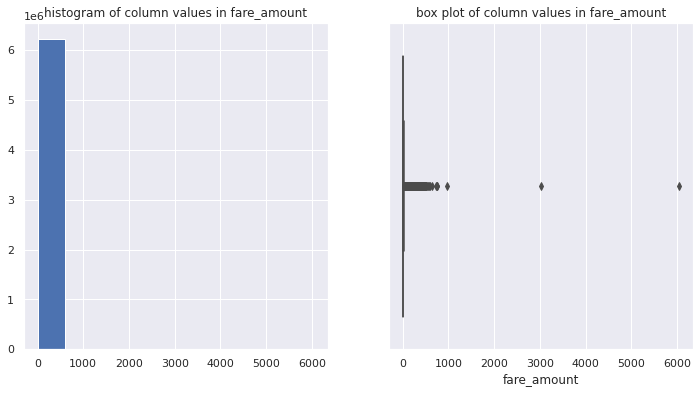

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


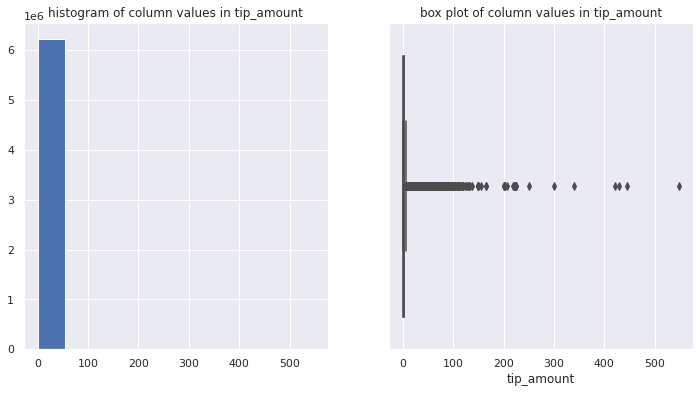

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


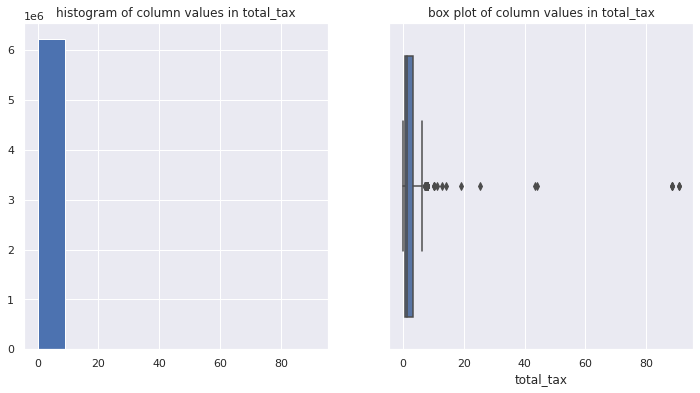

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


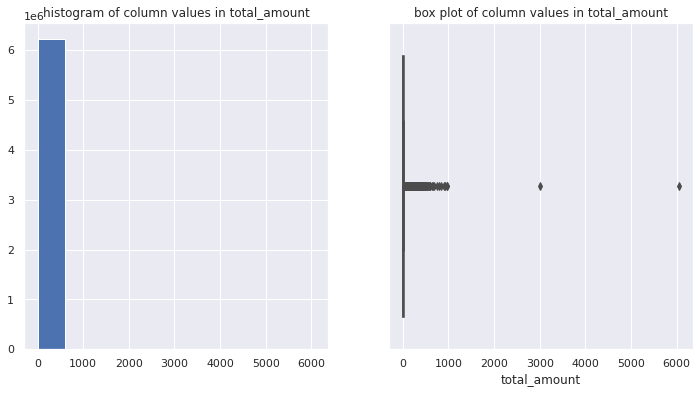

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


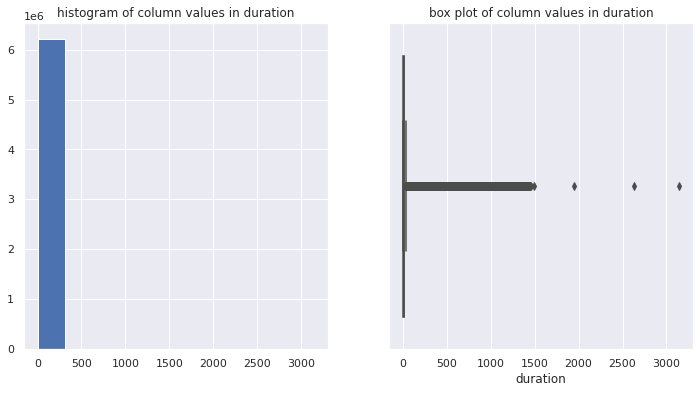

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


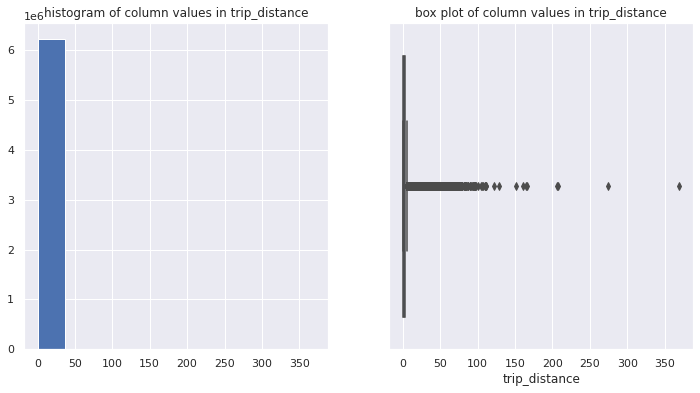

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


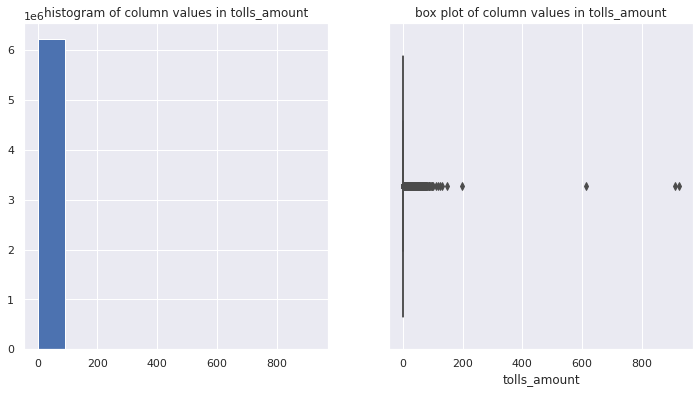

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [ ]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

fare_amount    tip_amount     total_tax  total_amount      duration  \
count  6.230547e+06  6.230547e+06  6.230547e+06  6.230547e+06  6.230547e+06   
mean   1.253629e+01  2.244589e+00  1.896865e+00  1.855585e+01  1.605080e+01   
std    1.164688e+01  2.667936e+00  1.251271e+00  1.421300e+01  6.156064e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.500000e+00  0.000000e+00  8.000000e-01  1.130000e+01  6.533333e+00   
50%    9.000000e+00  1.960000e+00  1.300000e+00  1.430000e+01  1.076667e+01   
75%    1.400000e+01  2.950000e+00  3.300000e+00  1.980000e+01  1.718333e+01   
max    6.052000e+03  5.490200e+02  9.086000e+01  6.061420e+03  3.147617e+03   

       trip_distance  tolls_amount  
count   6.230547e+06  6.230547e+06  
mean    2.792375e+00  3.185023e-01  
std     3.640340e+00  1.659479e+00  
min     0.000000e+00  0.000000e+00  
25%     9.600000e-01  0.000000e+00  
50%     1.600000e+00  0.000000e+00  
75%     2.870000e+00  0.000000e+00  
max     3.699400e+02  9.255000e+02

we need to improve the look of histograms and box plots further as we are not able to clearly observe the distribution.

We will filter all the data for each feature with values less than 95% ile. Then plot that data as shown below

In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Data/yellow_tripdata_2020-02_cleaned.csv',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


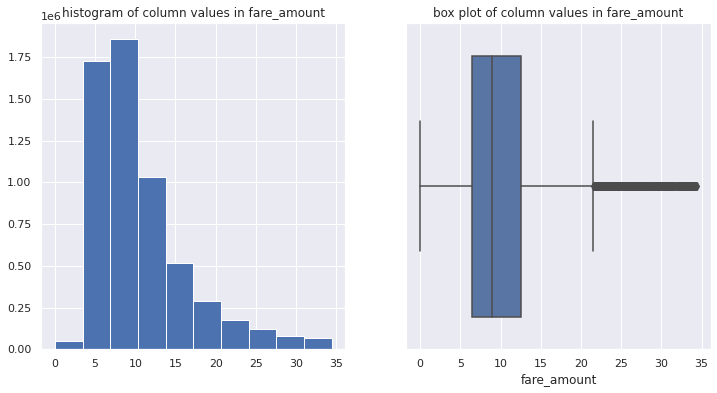

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


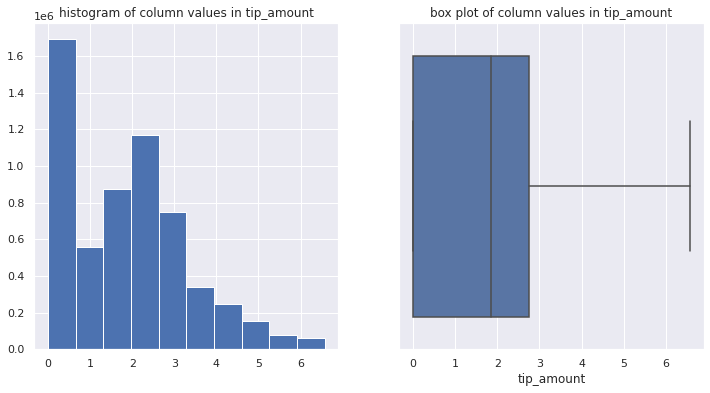

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


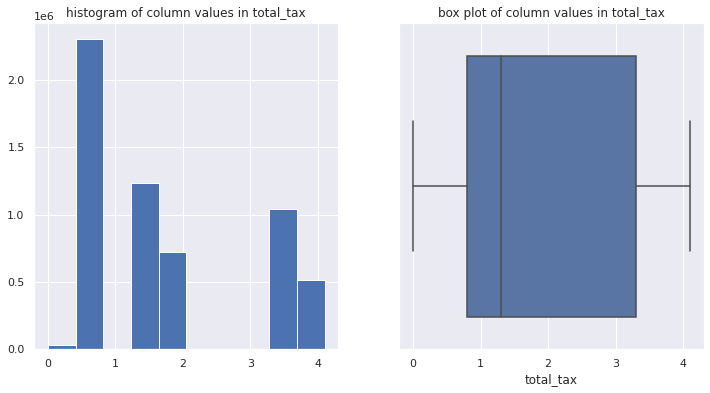

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


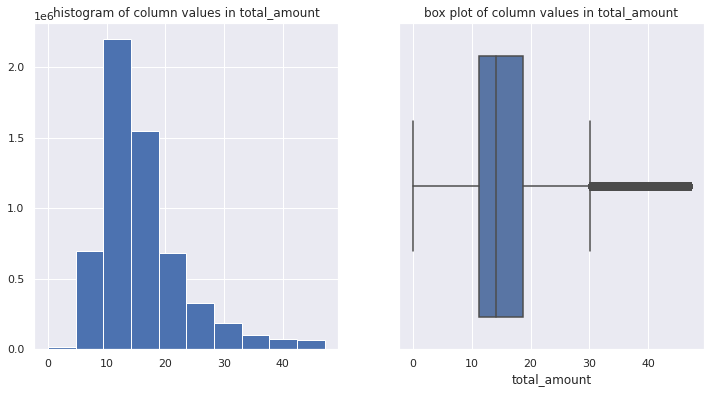

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


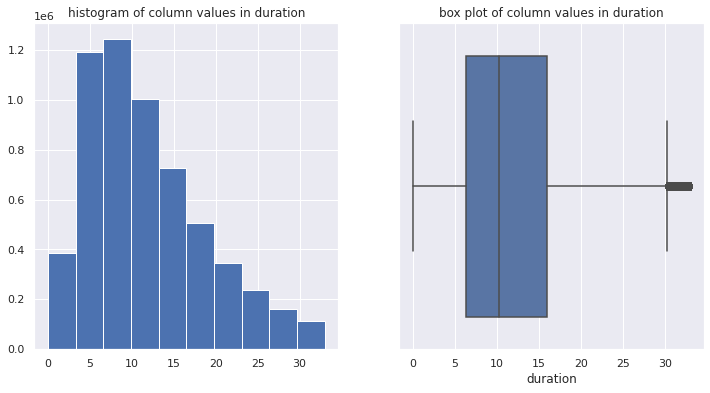

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


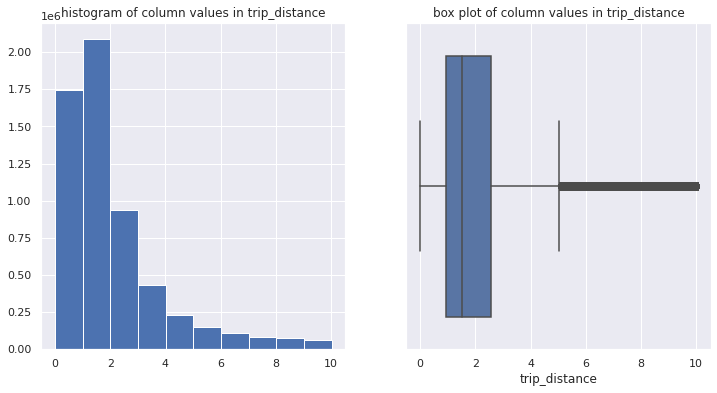

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


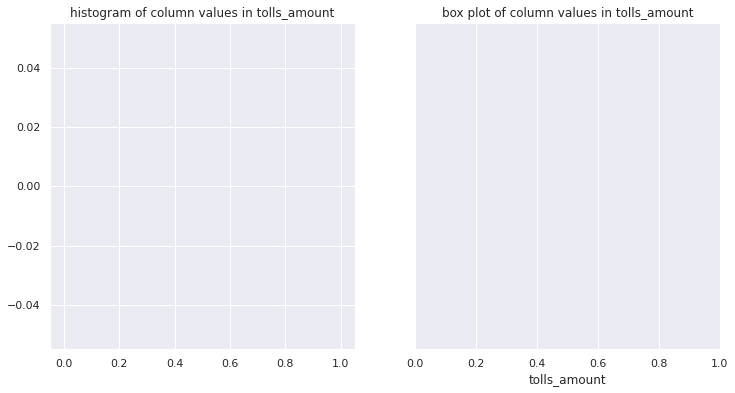

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column

fare_amount - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 6000 dollars.

tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 560 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.

total_amount - most of the total_amount values is within 14.5 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.

duration - most of the values in duration is within 12 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3000 minutes.

trip_distance - most of the trip_distance is within 1.60 miles value as is shown by the median. The outlier in this case is about 350 miles.

In [ ]:
#univarient analysis for categorical coloumns
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [ ]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    4705717
Cash           1490839
No_charge        25135
Dispute           8856
Name: payment_type, dtype: int64

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

index  payment_type
0  Credit_card       4705717
1         Cash       1490839
2    No_charge         25135
3      Dispute          8856

In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

index  payment_type  count_percent
0  Credit_card       4705717      75.526547
1         Cash       1490839      23.927899
2    No_charge         25135       0.403416
3      Dispute          8856       0.142138

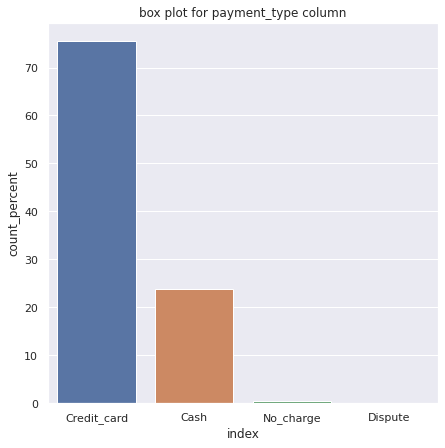

In [ ]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Now we look into time based categorical variables.

'trip_pickup_hour' 'trip_dropoff_hour' 'trip_day'

Number of categories in feature trip_pickup_hour is 24


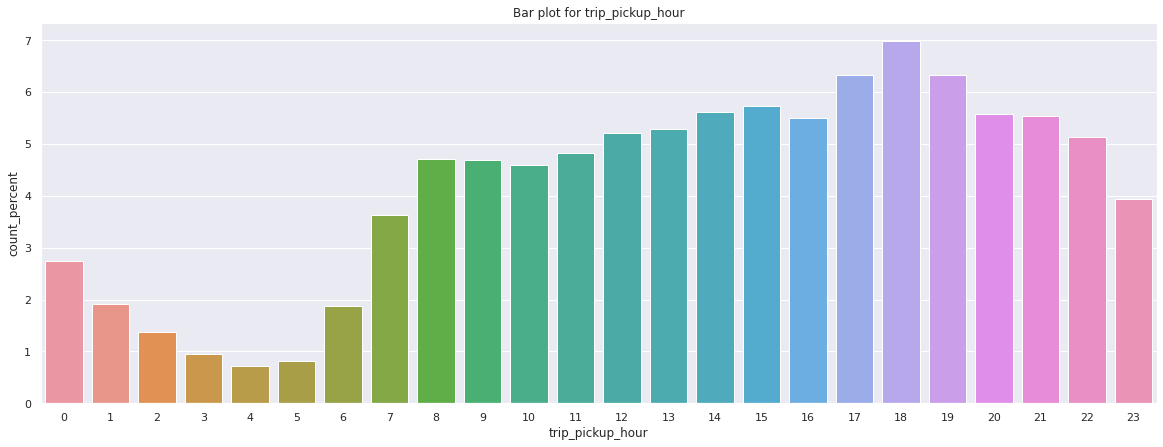

Number of categories in feature trip_dropoff_hour is 24


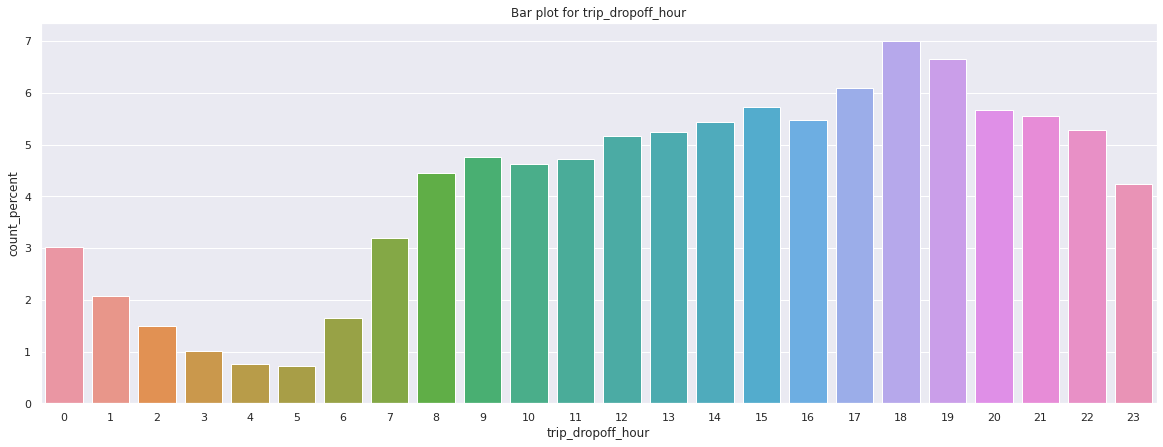

Number of categories in feature trip_day is 7


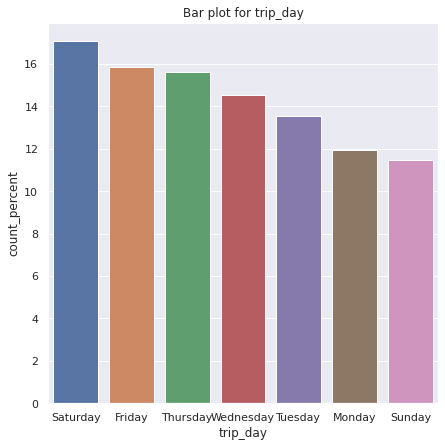

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things

Trip Hour 1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 11 min.

2) Peak hour for the pick up and drop off is around evening from 5 to 7. The busiest time is 6PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while saturday is the busiest.

2)Weekdays except Monday have heavy taxi uses.

Moving on we will explore the distribution of location based features:

'PULocationID'

'DOLocationID'

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(259,)
(261,)


So we have around 260 categories for location. To plot it on bar plots we need to increase the figure size.

Number of categories in feature PULocationID is 259


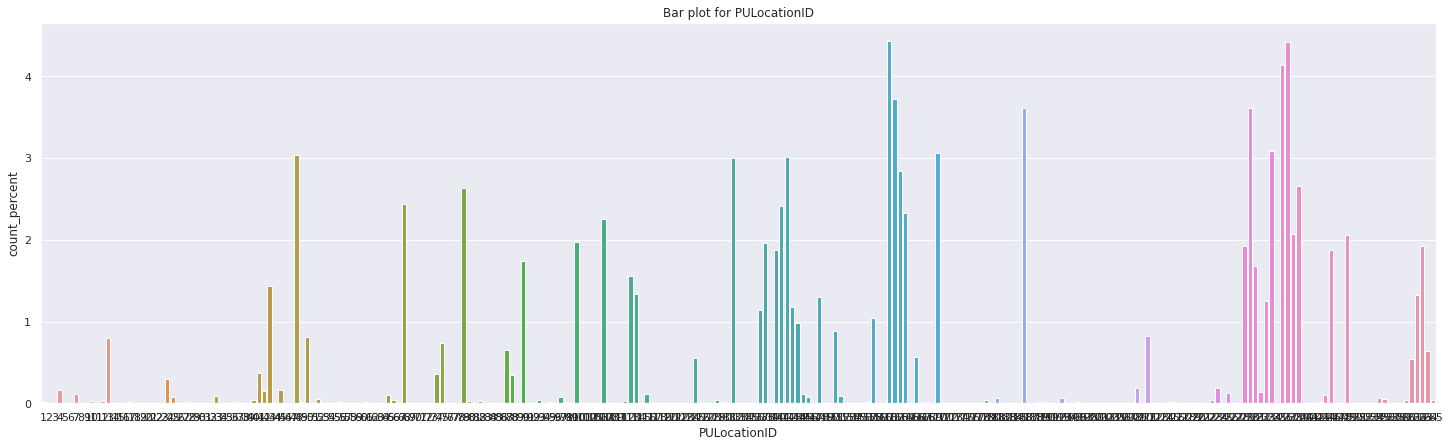

Number of categories in feature DOLocationID is 261


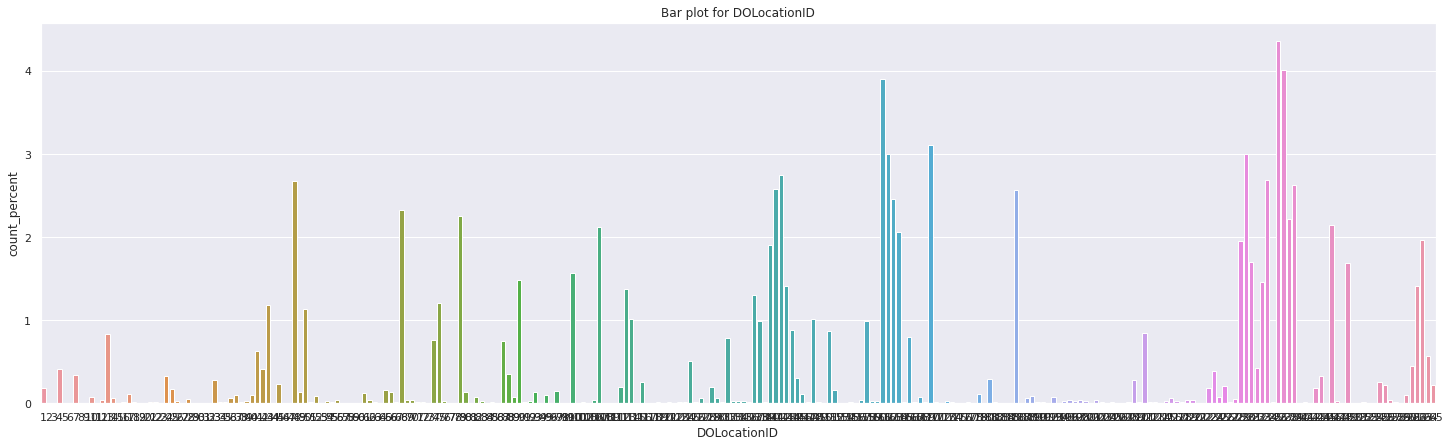

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 48


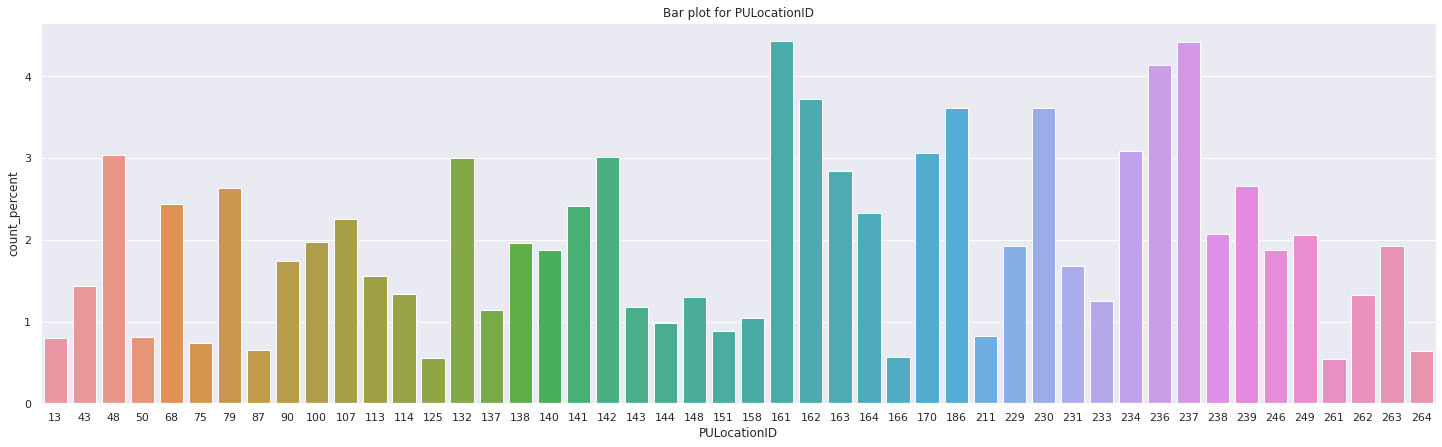

Number of categories in feature DOLocationID above 0.5 % count is 49


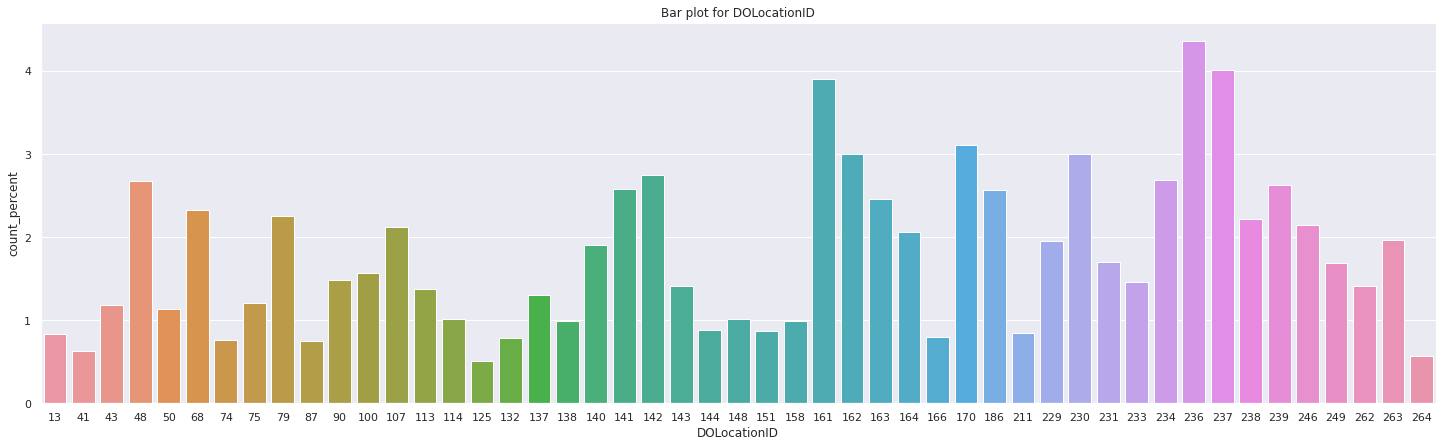

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights

The busiest location in terms of pickup are 161, 237 and 236

The busiest location for dropoff too are 236 , 237 and 161 but order is some what different.
We can also look for routes which are busiest.

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [ ]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
trip_data['routes'].head()

0      145-7
1      45-61
2    186-140
3    144-140
4    238-152
Name: routes, dtype: object

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6230547 entries, 0 to 6250532
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        int64  
 3   trip_distance          float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   payment_type           object 
 7   fare_amount            float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  total_amount           float64
 11  duration               float64
 12  trip_pickup_hour       int64  
 13  trip_dropoff_hour      int64  
 14  trip_day               object 
 15  total_tax              float64
 16  routes                 object 
dtypes: float64(7), int64(5), object(5)
memory usage: 855.6+ MB


In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Data/yellow_tripdata_2020-02_cleaned.csv',index=False)

Number of categories in feature routes above 0.25 % count is 14


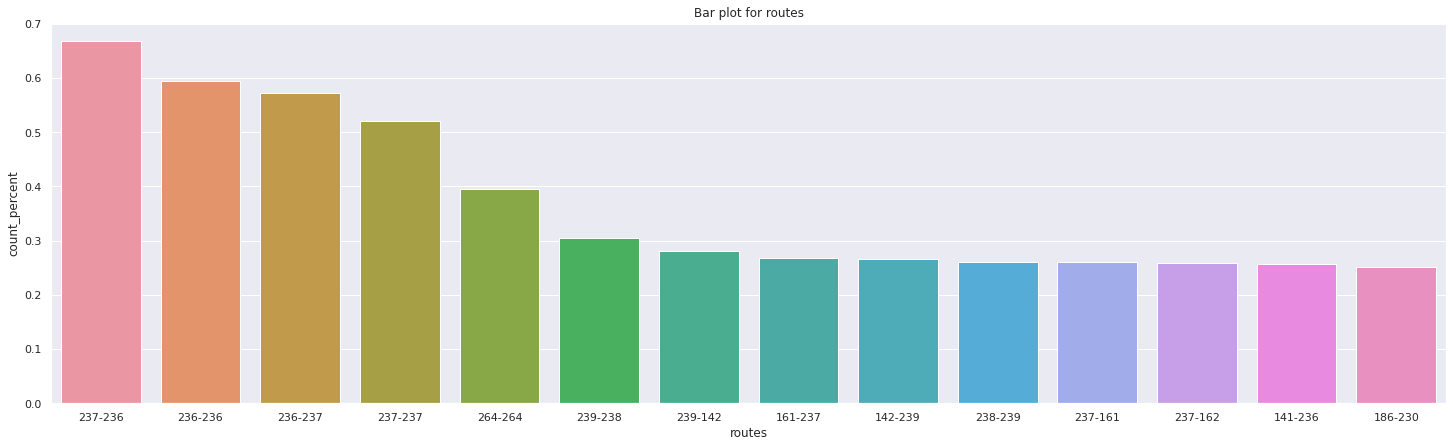

In [ ]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:

237-236

236-236

236-237

237-237

In [ ]:
# Analysis for passenger count
trip_data['passenger_count'].value_counts()

1    4480142
2     923689
3     240845
5     218531
6     128466
0     123567
4     115256
7         26
8         18
9          7
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

### Bivariate Analysis

Remember that we made some analysis points regarding exploration of duration and pricing:

For pricing we will be exploring it's relationship with:

hour/day of trip

pickup location of trip

For duration we will be exploring it's relationship with:

hour of day

pickup location of trip

PRICING EXPLORATION

We have following variables in the dataset that is associated with pricing:

fare_amount

tip_amount

total_taxes

tolls_amount

total_amount

In our anlaysis for now we will be focussing on:

fare_amount

tip_amount

total_taxes

total_amount

we are leaving tolls_amount for now from our analysis as it contributes very little to the total_amount value because it's median value was 0 i.e. most of the trips are not paying tolls_amount.

PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP *
All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable.

so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

Let's do a box plot of fair_amount with hour/day of trip to see how the fare changes for different hours of the day and for different days of the week

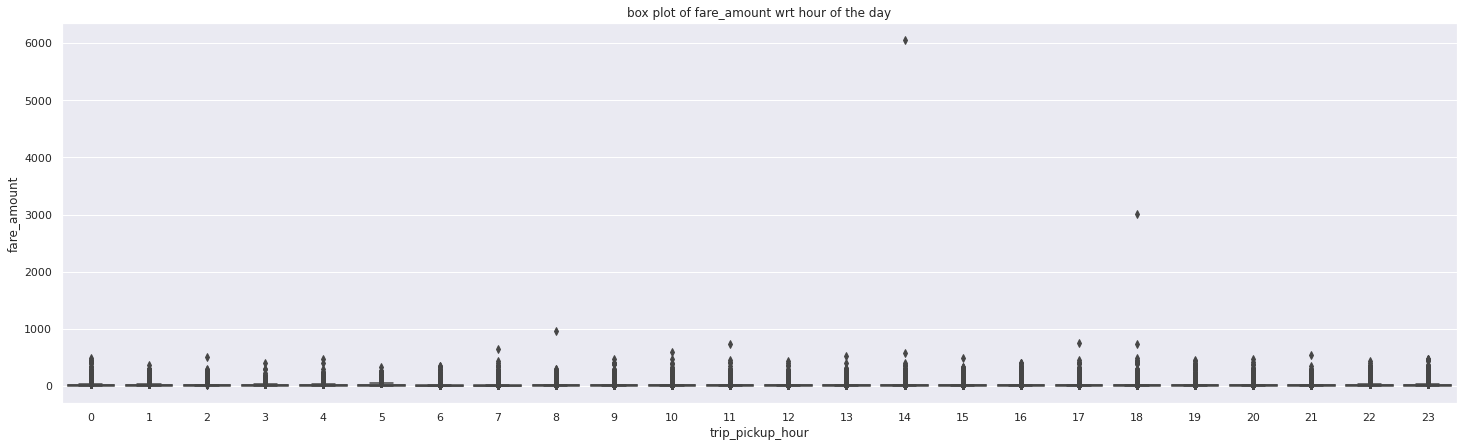

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

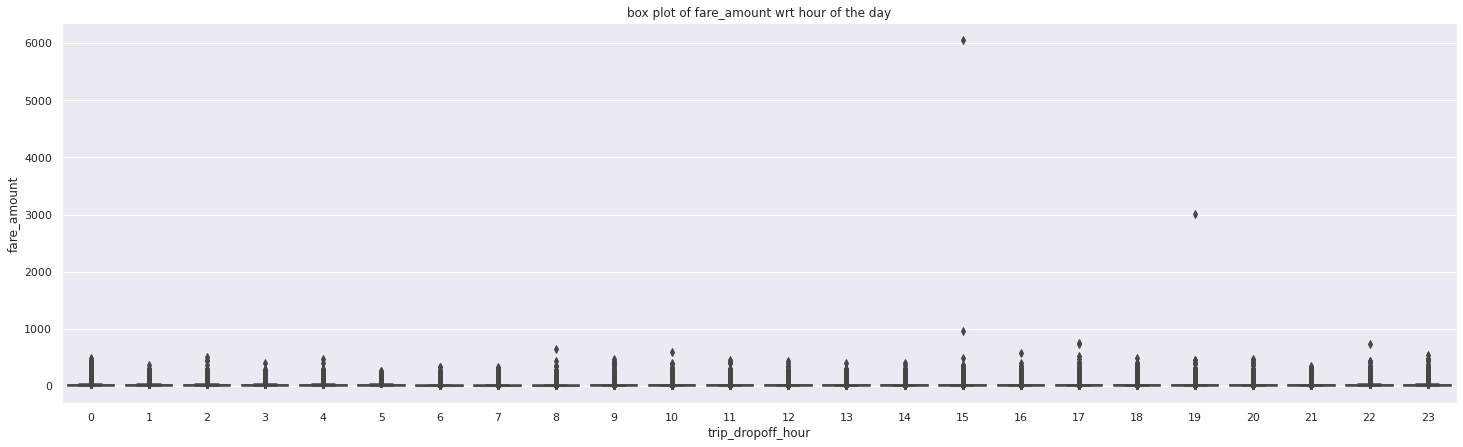

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare happens during 14 or 2PM to 18 or 6PM based on pickup time.

From the above plot trip_dropoff_hour outliers happens during 15 or 3PM to 19 or 7PM based on pickup time.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars.

In [ ]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(6031463, 17)

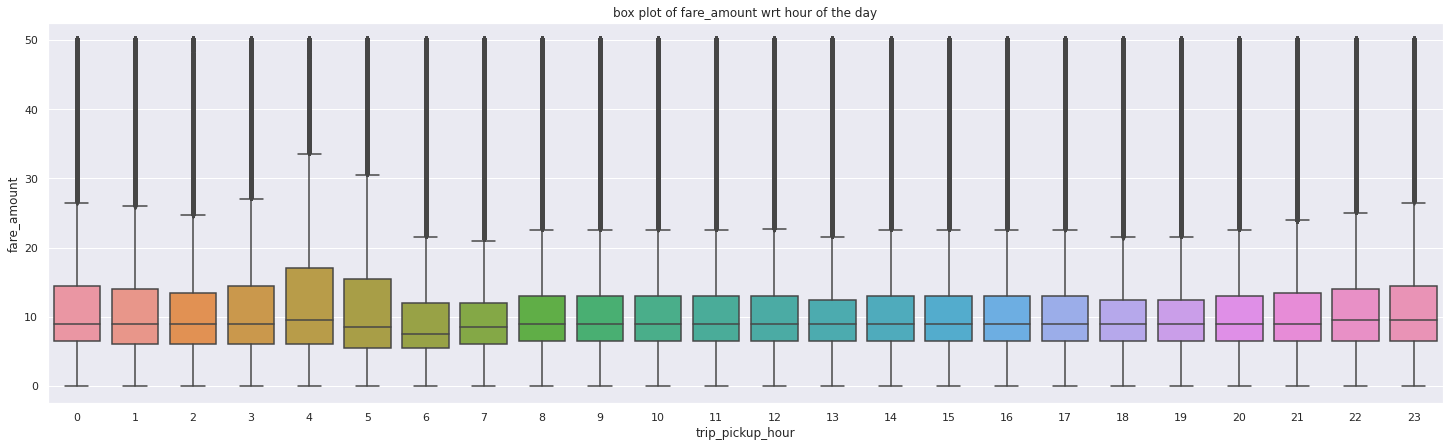

In [ ]:
#now plot graph for restricted data
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

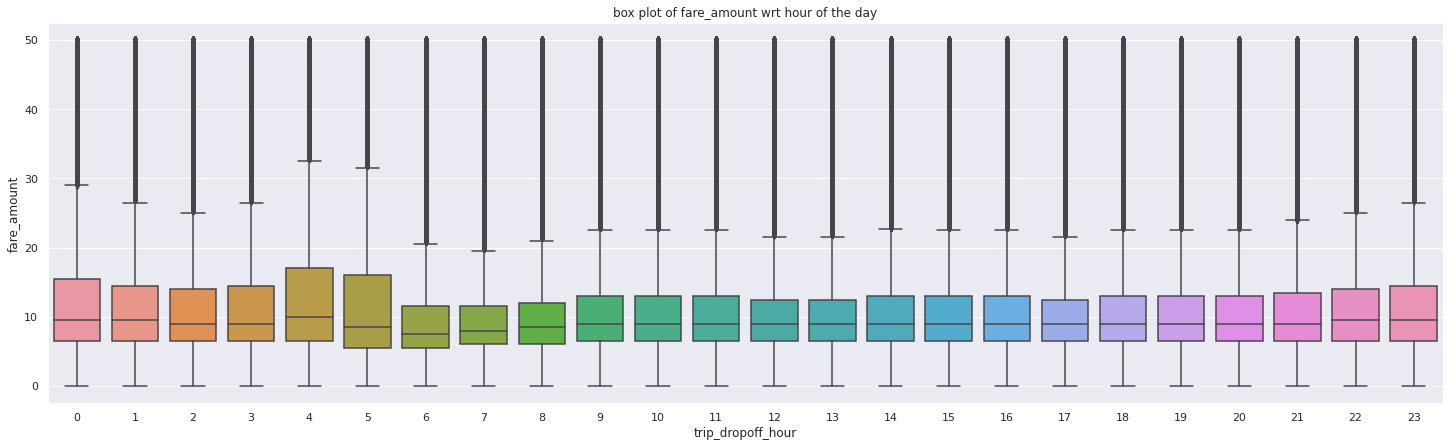

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can see from the plots that trip pickup and dropoff hours do not have much affect on median fare_amount as median is almost same for all the hours.(but fare amount between 5 A.M to 6 A.M is little less than the remaining hour)

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

In [ ]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_tax']<10]

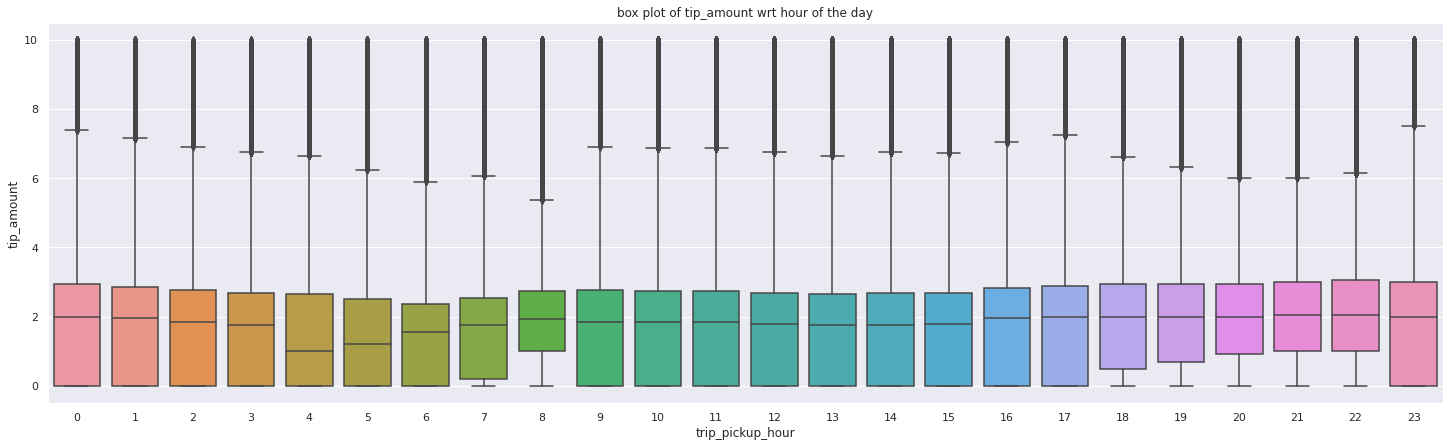

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

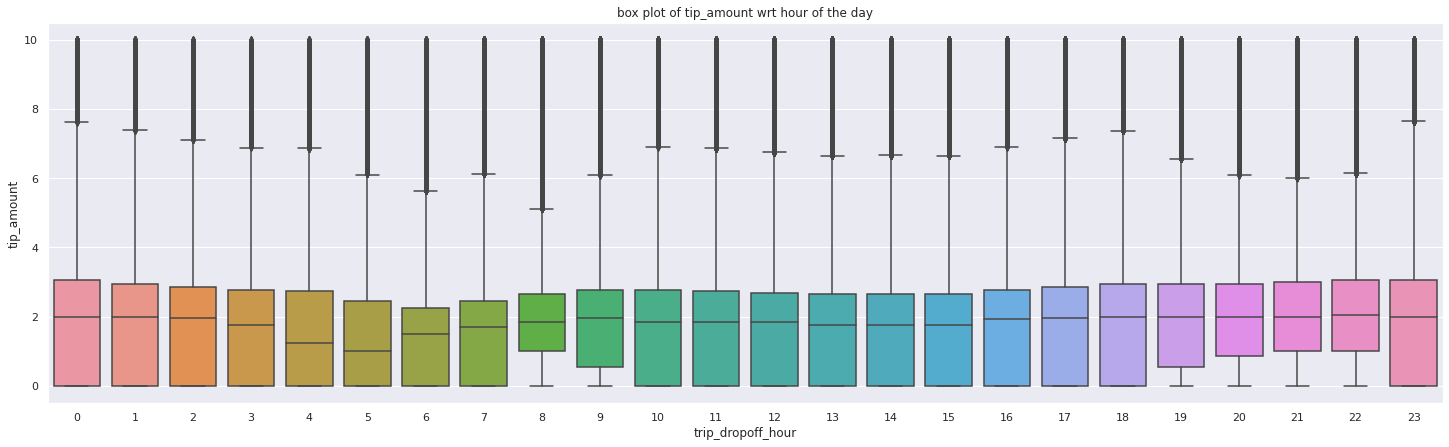

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

Based on tip_amount plot we can see that tip_amount too does not vary much based on hours. but one pattern we can say that tip is llittle large at late nights as compared to early mornings

Let's observe total_taxes now

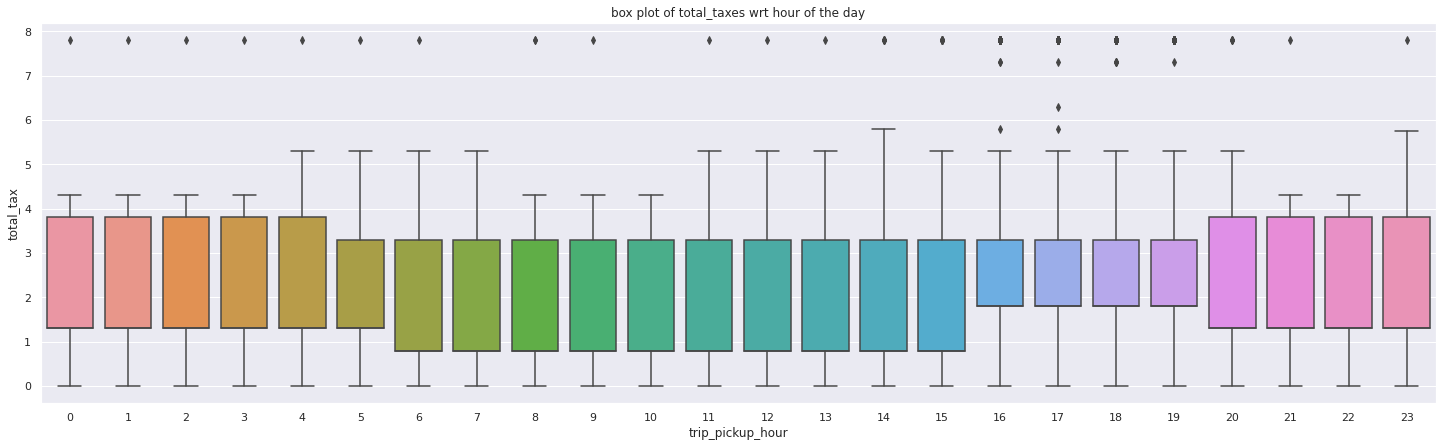

In [ ]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

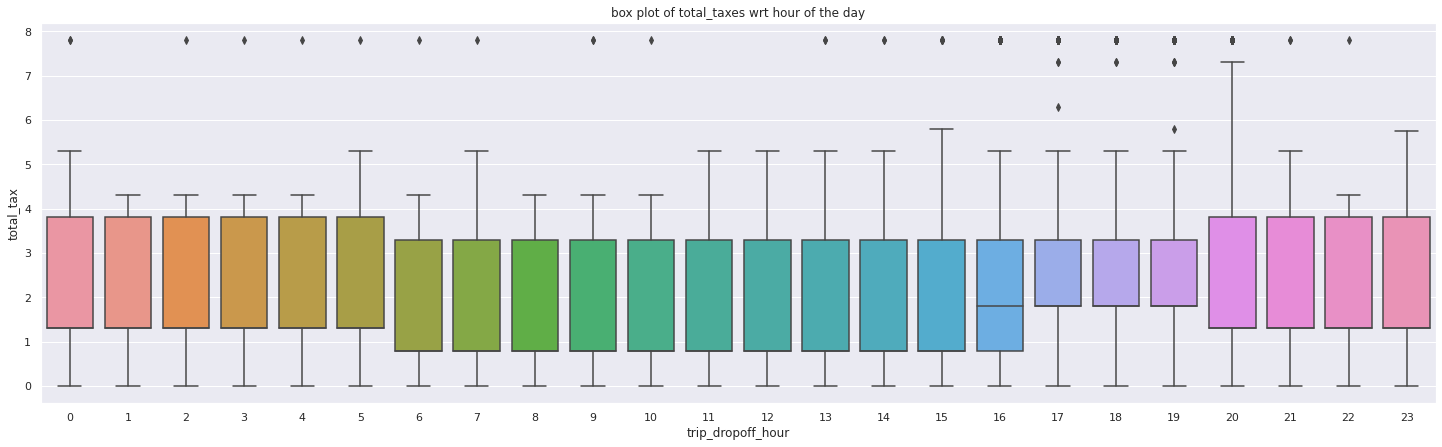

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

Now in this plot we can clearly observe that total_taxes change significantly with hour of the day.

There are two patterns that we can observe here:

1)from the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.

2) Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

Overall the effect of hour of day is most clearly visible on total_taxes. we have two insights about how taxes change with hours

1)Overnight charges are applied between 8PM to 5AM

2)Evening has higher variability in taxes and the taxes are usually high.

Let's move and explore the distribution of pricing variables with respect to day of week. For this analysis we will be using restricited version of dataset that we built for fare_amount, total_amount, tip_amount and total_taxes.

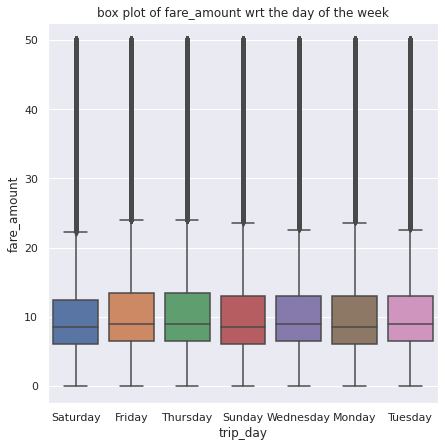

In [ ]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

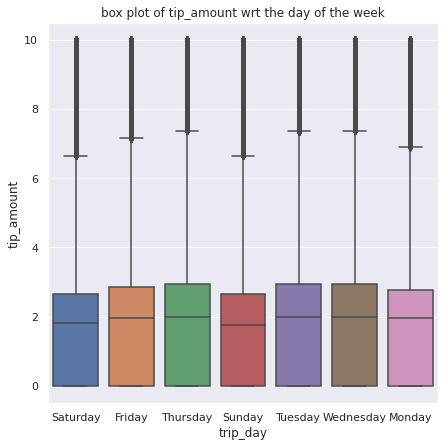

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

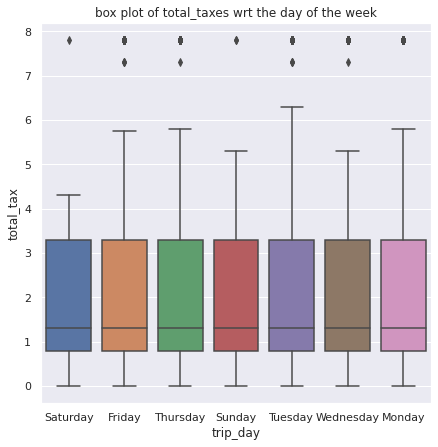

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.

PRICING VARIABLE EXPLORATION WITH LOCATION OF TRIP *
Here we will look into the price changes for the most frequent trip pickup locations.

In [ ]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

161    276062
237    275068
236    257605
162    231538
230    224915
Name: PULocationID, dtype: int64

In [ ]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([161, 237, 236, 162, 230, 186, 234, 170, 48, 142], dtype='int64')

The median fare_amount of trips taken from 161 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


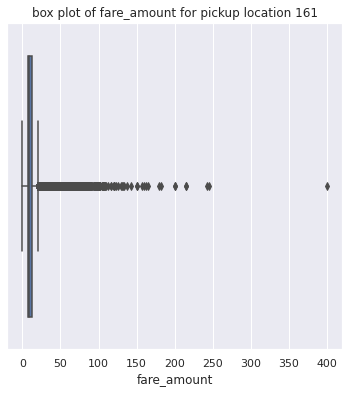

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


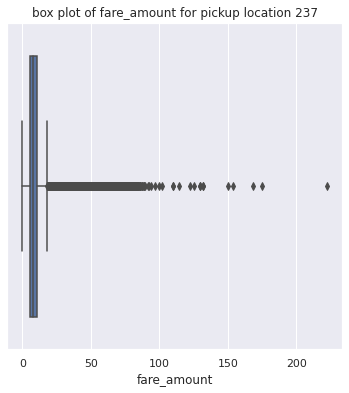

The median fare_amount of trips taken from 236 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


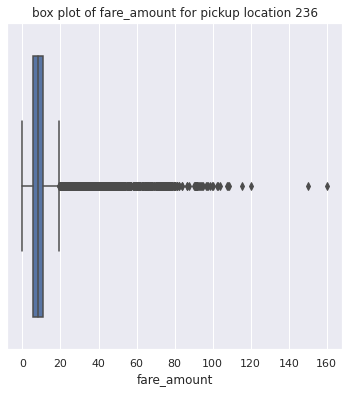

The median fare_amount of trips taken from 162 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


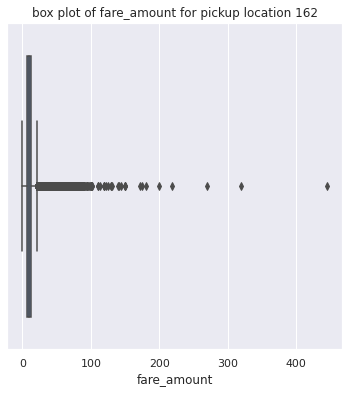

The median fare_amount of trips taken from 230 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


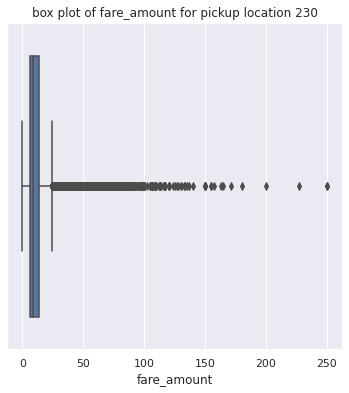

The median fare_amount of trips taken from 186 is 10.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


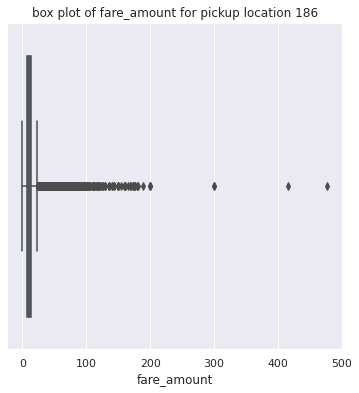

The median fare_amount of trips taken from 234 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


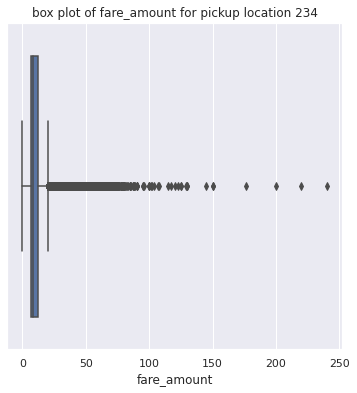

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


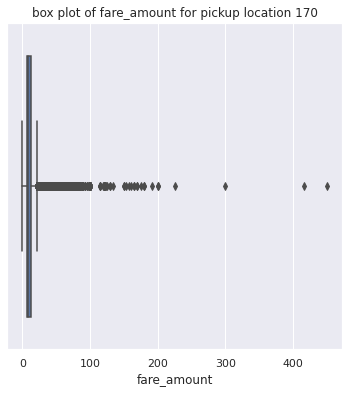

The median fare_amount of trips taken from 48 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


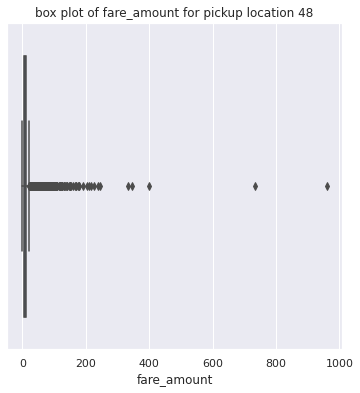

The median fare_amount of trips taken from 142 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


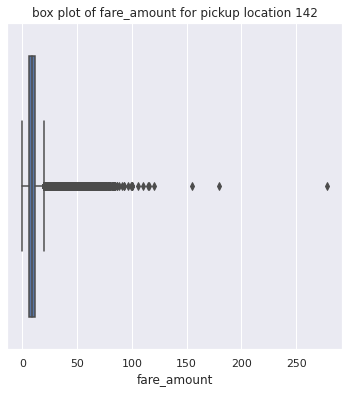

In [ ]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location i.e 161 has median fare_amount is low in comparison to other 186 locations ID and also oultier of 186 location ID is also high.and also we have location ID 162 and 230 has same fare amount as 161

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

### Duration Exploaration

Here we will explore the duration of trip exploration with pickup hour of day.

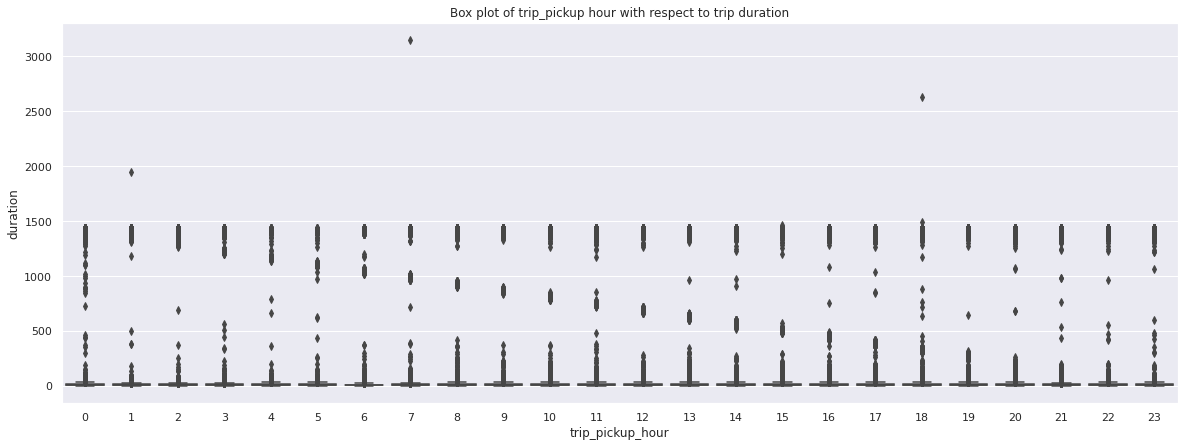

In [ ]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Here again due to heavy outliers in duration data we are not able to observe the general graph. we might need to restrict our duration values to within 50min.

In [ ]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(6148506, 17)

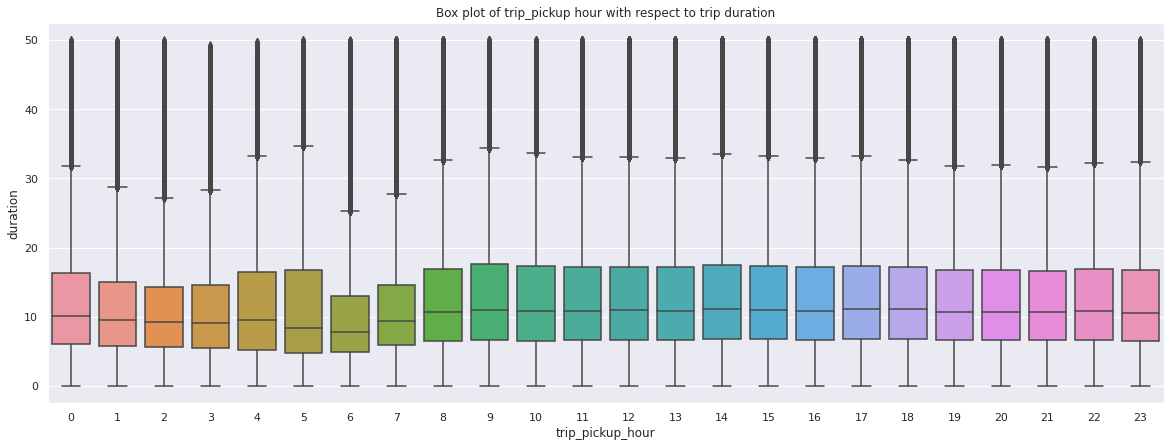

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Early morning hours of 5AM to 6AM have shorter duration trips

The median trip duration of trips taken from 161 is 11.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


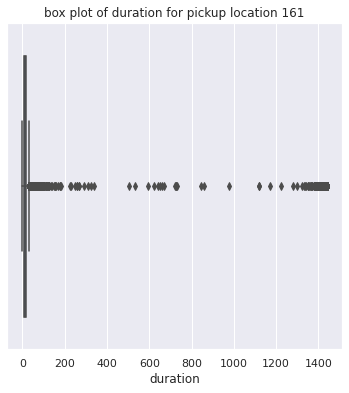

The median trip duration of trips taken from 237 is 8.45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


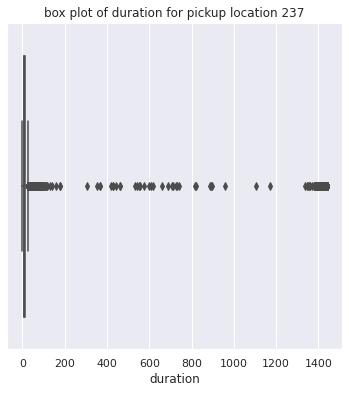

The median trip duration of trips taken from 236 is 8.583333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


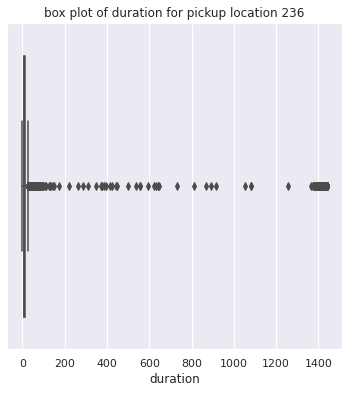

The median trip duration of trips taken from 162 is 11.183333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


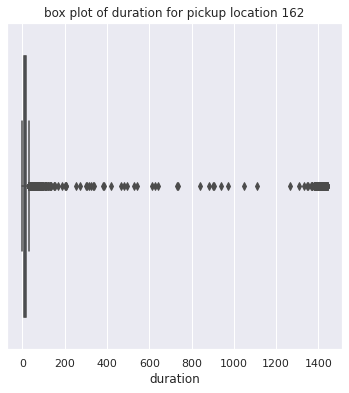

The median trip duration of trips taken from 230 is 11.166666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


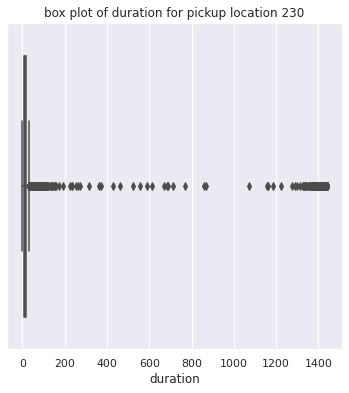

The median trip duration of trips taken from 186 is 13.133333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


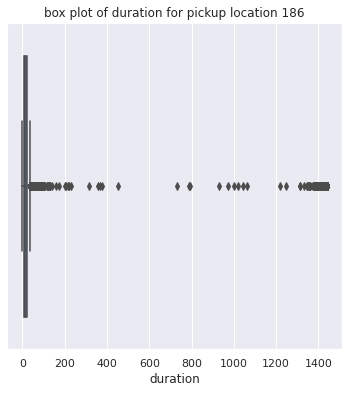

The median trip duration of trips taken from 234 is 10.666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


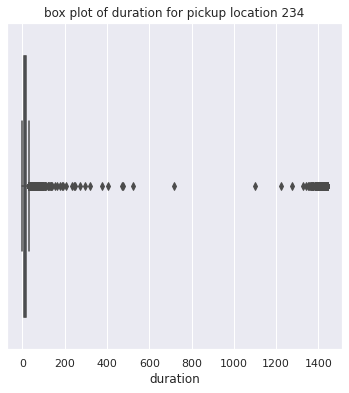

The median trip duration of trips taken from 170 is 10.616666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


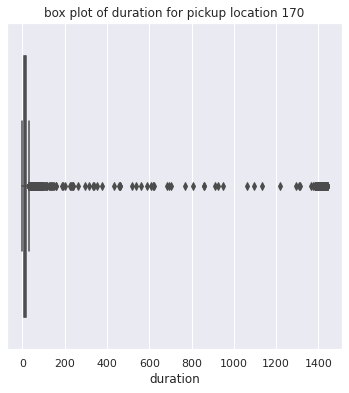

The median trip duration of trips taken from 48 is 9.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


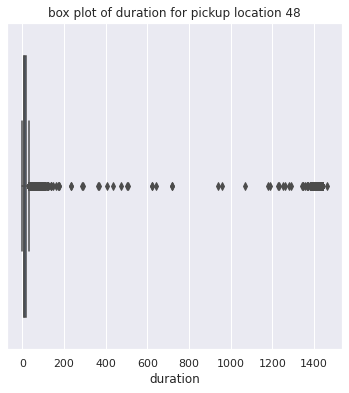

The median trip duration of trips taken from 142 is 9.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


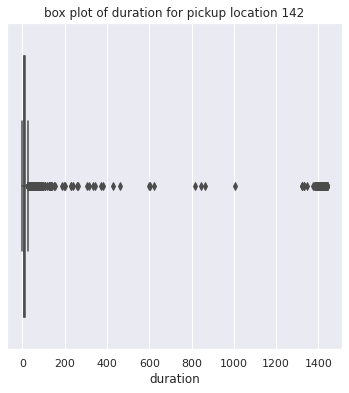

In [ ]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

Here again we can see for the most frequent pickup location 161 the duration value is less in comparison to other pickup location with locationID 186, 186 has higher duration thats why it median far_amount is also higher.

### Analyse routes

We could analyse routes with fare_amount or total_taxes and duration for different time of the day.

In [ ]:
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-02-01 00:17:35   2020-02-01 00:30:32                1           2.60   
1  2020-02-01 00:32:47   2020-02-01 01:05:36                1           4.80   
2  2020-02-01 00:31:44   2020-02-01 00:43:28                1           3.20   
3  2020-02-01 00:07:35   2020-02-01 00:31:39                1           4.38   
4  2020-02-01 00:51:43   2020-02-01 01:01:29                1           2.28   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           145             7  Credit_card         11.0        2.45   
1            45            61  Credit_card         21.5        6.30   
2           186           140  Credit_card         11.0        1.00   
3           144           140  Credit_card         18.0        3.00   
4           238           152         Cash          9.5        0.00   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         14.75  12.950000                 0                  0   
1           0.0         31.60  32.816667                 0                  1   
2           0.0         15.80  11.733333                 0                  0   
3           0.0         24.80  24.066667                 0                  0   
4           0.0         10.80   9.766667                 0                  1   

   trip_day  total_tax   routes  
0  Saturday        1.3    145-7  
1  Saturday        3.8    45-61  
2  Saturday        3.8  186-140  
3  Saturday        1.3  144-140  
4  Saturday        1.3  238-152

In [ ]:
trip_route_value_counts = trip_data['routes'].value_counts()

In [ ]:
trip_route_value_counts.head(10)

237-236    41642
236-236    37050
236-237    35679
237-237    32402
264-264    24642
239-238    18963
239-142    17527
161-237    16718
142-239    16524
238-239    16278
Name: routes, dtype: int64

In [ ]:
trip_route_top_10 = trip_route_value_counts.nlargest(10).index

In [ ]:
trip_route_top_10 

Index(['237-236', '236-236', '236-237', '237-237', '264-264', '239-238',
       '239-142', '161-237', '142-239', '238-239'],
      dtype='object')

the fare amount for the route 237-236 is 6.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


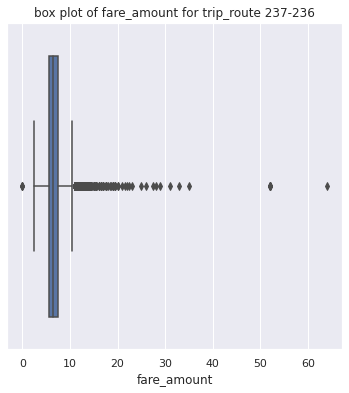

the fare amount for the route 236-236 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


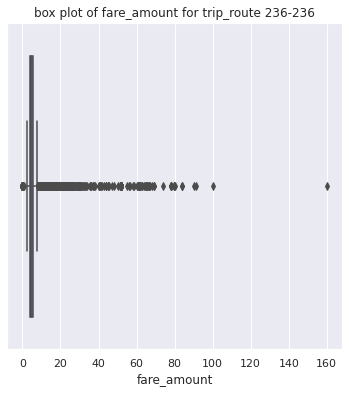

the fare amount for the route 236-237 is 6.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


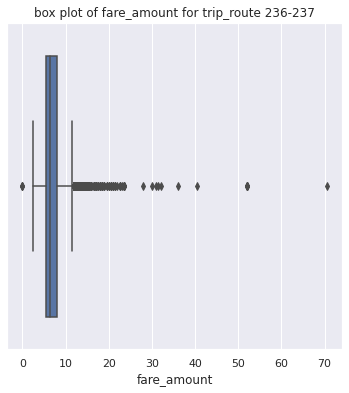

the fare amount for the route 237-237 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


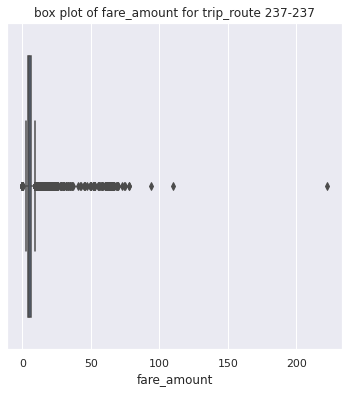

the fare amount for the route 264-264 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


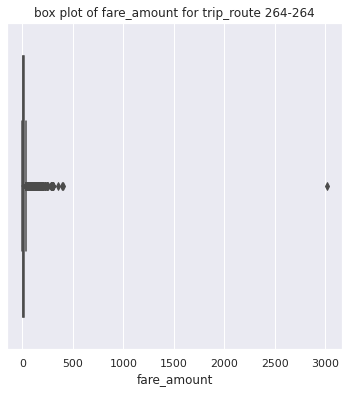

the fare amount for the route 239-238 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


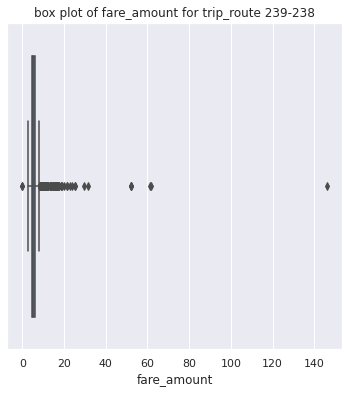

the fare amount for the route 239-142 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


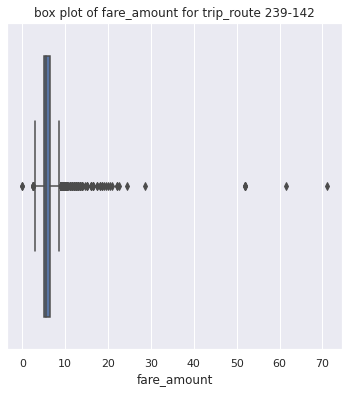

the fare amount for the route 161-237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


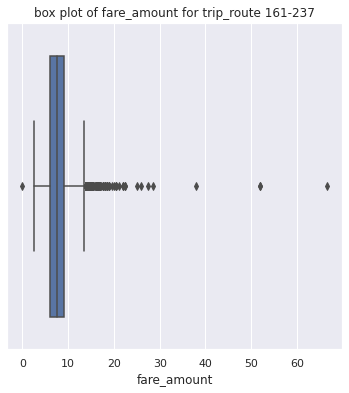

the fare amount for the route 142-239 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


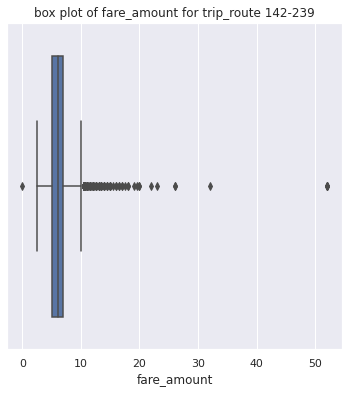

the fare amount for the route 238-239 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


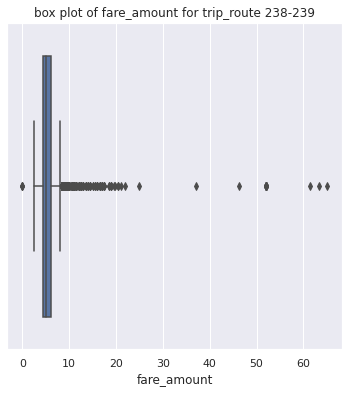

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median fare_amount for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['fare_amount'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From above plot it is clear that the busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is bit lower than the other Busiset trip_routes.

It is also clearly vissible that the route 161-237 has higher median fare amount compared to other routes and its outliers are also low.

the trip_route 264-264 has the highest fare_amount of 9.5 median.Its worthnoting that these route should be kept in mind for business prospect.

the total_taxes for the route 237-236 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


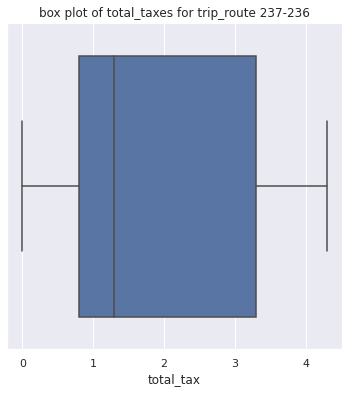

the total_taxes for the route 236-236 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


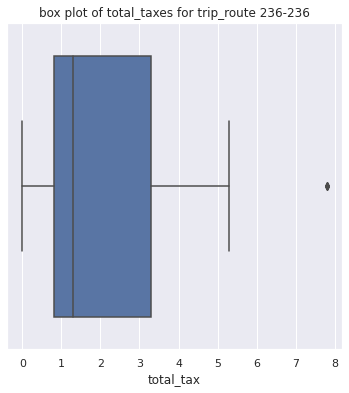

the total_taxes for the route 236-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


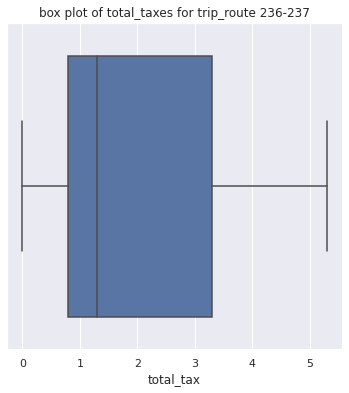

the total_taxes for the route 237-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


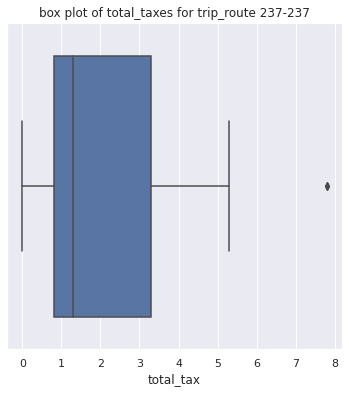

the total_taxes for the route 264-264 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


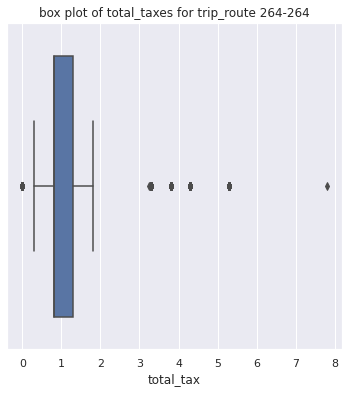

the total_taxes for the route 239-238 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


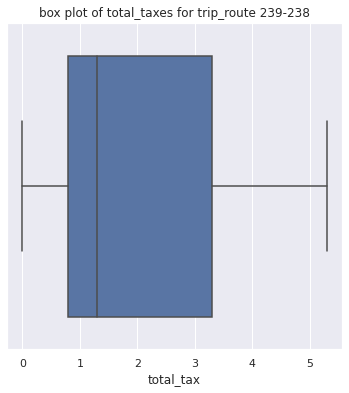

the total_taxes for the route 239-142 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


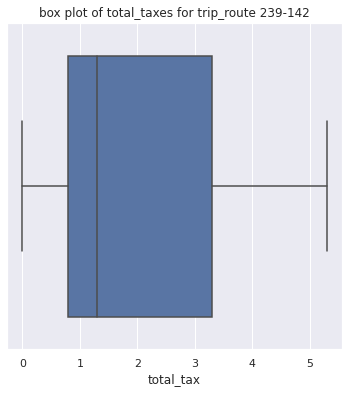

the total_taxes for the route 161-237 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


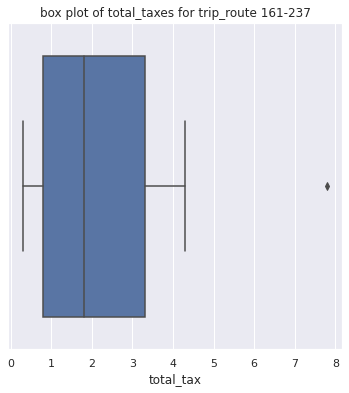

the total_taxes for the route 142-239 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


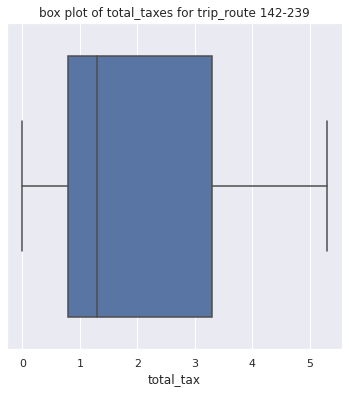

the total_taxes for the route 238-239 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


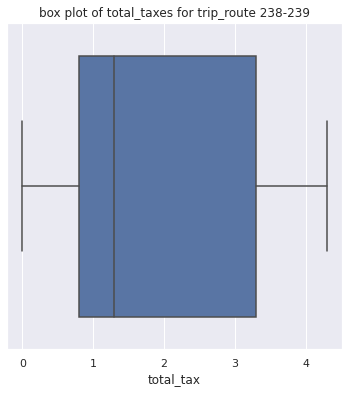

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the total_taxes for the route " + trip_route +' '+ 'is ' + str(trip_route_df['total_tax'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['total_tax'],ax=ax)
    # set_title
    ax.set_title('box plot of total_taxes for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 dollars, but the trip_route 264-264 total_tax i.e .8 dollars as well.

As we seen from fare_amount plot of routes, the 161-237 route has higher fare amount as compared to other routes but it could be higher because of higher taxes applied on the these route as shown in above plot. as it has highest total_tax value of 1.8 dollars

the duration for the route 237-236 is 6.25


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


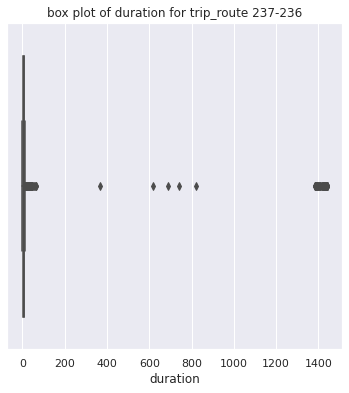

the duration for the route 236-236 is 3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


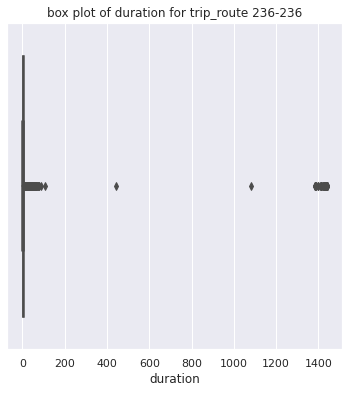

the duration for the route 236-237 is 7.116666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


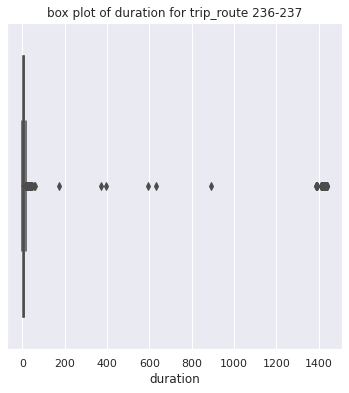

the duration for the route 237-237 is 4.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


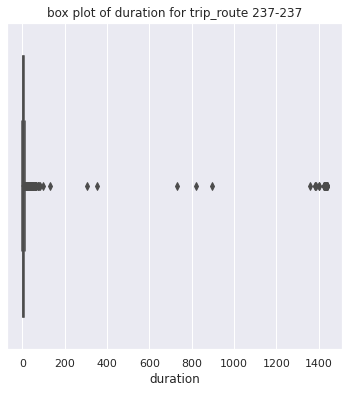

the duration for the route 264-264 is 8.216666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


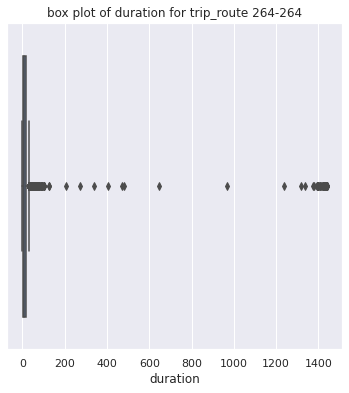

the duration for the route 239-238 is 4.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


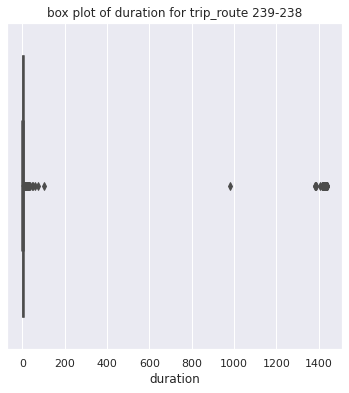

the duration for the route 239-142 is 5.216666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


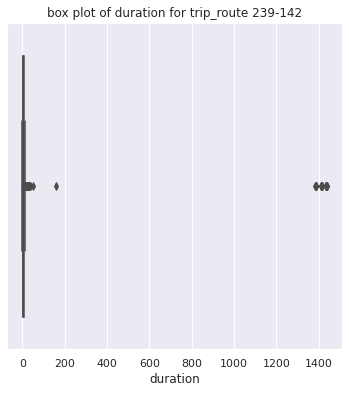

the duration for the route 161-237 is 8.683333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


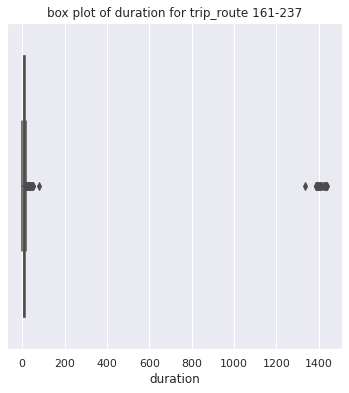

the duration for the route 142-239 is 5.45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


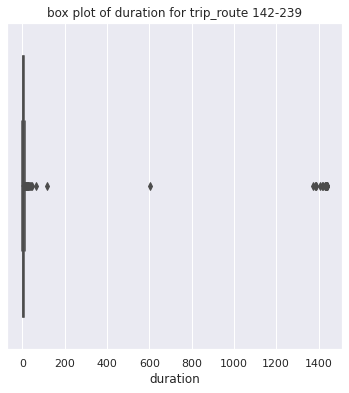

the duration for the route 238-239 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


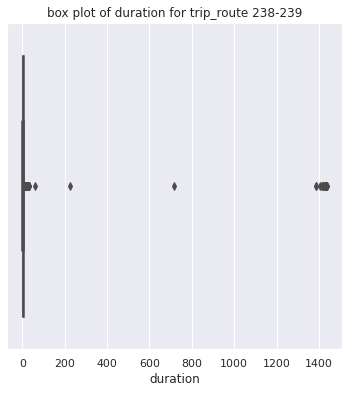

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the duration for the route " + trip_route +' '+ 'is ' + str(trip_route_df['duration'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe  trip_route_df 
    sns.boxplot(trip_route_df['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for trip_route '+ trip_route)
    sns.set()
    plt.show()

As seen from the above plot that the busisest location 237-236 has lower duration as compared other busisest location.

On the other hand 264-264 has higher duration and that could be the reason for the higher fare_amount.

## Final Results from EDA 

fare_amount - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 6000 dollars.

tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 560 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.

total_amount - most of the total_amount values is within 14.5 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.

duration - most of the values in duration is within 12 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3000 minutes.

trip_distance - most of the trip_distance is within 1.60 miles value as is shown by the median. The outlier in this case is about 350 miles.

Credit card is the most preferred mode of payment followed by cash.

Trip Hour-1)The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 11 min.

2) Peak hour for the pick up and drop off is around evening from 5 to 7. The busiest time is 6PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

Sunday has the lowest taxi uses while saturday is the busiest.Weekdays except Monday have heavy taxi uses.

The busiest location in terms of pickup are 161, 237 and 236

The busiest location for dropoff too are 236 , 237 and 161 but order is some what different. We can also look for routes which are busiest.

Here we see that the mostly 1 or 2 passengers avail the cab.

From the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.

Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

We discovered from the dataset that even for the busiest pickup location the median fare_amount is a lower than other busier pickup locations. So just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

Early morning hours of 5AM to 6AM have shorter duration trips

Routes:

From above plot it is clear that the busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is bit lower than the other Busiset trip_routes.

It is also clearly vissible that the route 161-237 has higher median fare amount compared to other routes and its outliers are also low.

the trip_route 264-264 has the highest fare_amount of 9.5 median.Its worthnoting that these route should be kept in mind for business prospect.

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 dollars, but the trip_route 264-264 total_tax i.e .8 dollars as well.

As we seen from fare_amount plot of routes, the 161-237 route has higher fare amount as compared to other routes but it could be higher because of higher taxes applied on the these route as shown in above plot. as it has highest total_tax value of 1.8 dollars

As seen from the above plot that the busisest location 237-236 has lower duration as compared other busisest location.

On the other hand 264-264 has higher duration and that could be the reason for the higher fare_amount.

It is observed that ,it is not at all necessary that the busiest route has higher other features as well. and for the business prospect we have to see the other routes as well for higher revenue genrations. One such route is 264-264.

# Yellow Taxi June data

## Data Importing and Data Summarisation

In [ ]:
# read file
trip_data = pd.read_csv('/content/drive/MyDrive/Data/yellow_tripdata_2020-06.csv')
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         1  2020-06-01 00:31:23   2020-06-01 00:49:58   
1           1         1  2020-06-01 00:42:50   2020-06-01 01:04:33   
2           2         1  2020-06-01 00:39:51   2020-06-01 00:49:09   
3           3         1  2020-06-01 00:56:13   2020-06-01 01:11:38   
4           4         1  2020-06-01 00:16:41   2020-06-01 00:29:30   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0            3.6         1.0                  N   
1              1.0            5.6         1.0                  N   
2              1.0            2.3         1.0                  N   
3              1.0            5.3         1.0                  N   
4              1.0            4.4         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           140            68             1         15.5    3.0      0.5   
1            79           226             1         19.5    3.0      0.5   
2           238           116             2         10.0    0.5      0.5   
3           141           116             2         17.5    3.0      0.5   
4           186            75             1         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        4.00           0.0                    0.3         23.30   
1        2.00           0.0                    0.3         25.30   
2        0.00           0.0                    0.3         11.30   
3        0.00           0.0                    0.3         21.30   
4        3.65           0.0                    0.3         21.95   

   congestion_surcharge  airport_fee  
0                   2.5          NaN  
1                   2.5          NaN  
2                   0.0          NaN  
3                   2.5          NaN  
4                   2.5          NaN

In [ ]:
trip_data.shape

(549797, 20)

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             549797 non-null  int64  
 1   VendorID               549797 non-null  int64  
 2   tpep_pickup_datetime   549797 non-null  object 
 3   tpep_dropoff_datetime  549797 non-null  object 
 4   passenger_count        499079 non-null  float64
 5   trip_distance          549797 non-null  float64
 6   RatecodeID             499079 non-null  float64
 7   store_and_fwd_flag     499079 non-null  object 
 8   PULocationID           549797 non-null  int64  
 9   DOLocationID           549797 non-null  int64  
 10  payment_type           549797 non-null  int64  
 11  fare_amount            549797 non-null  float64
 12  extra                  549797 non-null  float64
 13  mta_tax                549797 non-null  float64
 14  tip_amount             549797 non-nu

## Data Cleaning and Manipulation Steps

In [ ]:
# Droping unwanted column
trip_data.drop(['Unnamed: 0','VendorID','RatecodeID','store_and_fwd_flag','airport_fee','congestion_surcharge',],axis = 1, inplace =True)

In [ ]:
# changing the datatype of datetime object
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   549797 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  549797 non-null  datetime64[ns]
 2   passenger_count        499079 non-null  float64       
 3   trip_distance          549797 non-null  float64       
 4   PULocationID           549797 non-null  int64         
 5   DOLocationID           549797 non-null  int64         
 6   payment_type           549797 non-null  int64         
 7   fare_amount            549797 non-null  float64       
 8   extra                  549797 non-null  float64       
 9   mta_tax                549797 non-null  float64       
 10  tip_amount             549797 non-null  float64       
 11  tolls_amount           549797 non-null  float64       
 12  improvement_surcharge  549797 non-null  floa

In [ ]:
#droping nan values from data
trip_data.dropna(inplace = True)

#converting datatype of passenger count to int because float does not make any sense
trip_data['passenger_count'] = trip_data['passenger_count'].astype(int)

In [ ]:
# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499079 entries, 0 to 499078
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   499079 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  499079 non-null  datetime64[ns]
 2   passenger_count        499079 non-null  int64         
 3   trip_distance          499079 non-null  float64       
 4   PULocationID           499079 non-null  int64         
 5   DOLocationID           499079 non-null  int64         
 6   payment_type           499079 non-null  int64         
 7   fare_amount            499079 non-null  float64       
 8   extra                  499079 non-null  float64       
 9   mta_tax                499079 non-null  float64       
 10  tip_amount             499079 non-null  float64       
 11  tolls_amount           499079 non-null  float64       
 12  improvement_surcharge  499079 non-null  floa

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58                1            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33                1            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09                1            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38                1            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30                1            4.4   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           140            68             1         15.5    3.0      0.5   
1            79           226             1         19.5    3.0      0.5   
2           238           116             2         10.0    0.5      0.5   
3           141           116             2         17.5    3.0      0.5   
4           186            75             1         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount   duration  \
0        4.00           0.0                    0.3         23.30  18.583333   
1        2.00           0.0                    0.3         25.30  21.716667   
2        0.00           0.0                    0.3         11.30   9.300000   
3        0.00           0.0                    0.3         21.30  15.416667   
4        3.65           0.0                    0.3         21.95  12.816667   

   trip_pickup_hour  trip_dropoff_hour trip_day  
0                 0                  0   Monday  
1                 0                  1   Monday  
2                 0                  0   Monday  
3                 0                  1   Monday  
4                 0                  0   Monday

Now our Total_amount is basically Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'

In [ ]:
# create 'total_taxes' column from summing 'extra','mta_tax', 'improvement_surcharge'
trip_data['total_taxes'] = trip_data['extra']+trip_data['mta_tax']+trip_data['improvement_surcharge']
# drop 'extra','mta_tax','improvement_surcharge' columns
trip_data.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)
# print data head
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58                1            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33                1            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09                1            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38                1            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30                1            4.4   

   PULocationID  DOLocationID  payment_type  fare_amount  tip_amount  \
0           140            68             1         15.5        4.00   
1            79           226             1         19.5        2.00   
2           238           116             2         10.0        0.00   
3           141           116             2         17.5        0.00   
4           186            75             1         14.5        3.65   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         23.30  18.583333                 0                  0   
1           0.0         25.30  21.716667                 0                  1   
2           0.0         11.30   9.300000                 0                  0   
3           0.0         21.30  15.416667                 0                  1   
4           0.0         21.95  12.816667                 0                  0   

  trip_day  total_taxes  
0   Monday          3.8  
1   Monday          3.8  
2   Monday          1.3  
3   Monday          3.8  
4   Monday          3.8

For payment_type we have the following mapping for categories: 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [ ]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1    322582
2    168953
3      5257
4      2275
5        12
Name: payment_type, dtype: int64

In [ ]:
# function for mapping numerical payment_type to actual payment
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data['payment_type'] = trip_data.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58                1            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33                1            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09                1            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38                1            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30                1            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         23.30  18.583333                 0                  0   
1           0.0         25.30  21.716667                 0                  1   
2           0.0         11.30   9.300000                 0                  0   
3           0.0         21.30  15.416667                 0                  1   
4           0.0         21.95  12.816667                 0                  0   

  trip_day  total_taxes  
0   Monday          3.8  
1   Monday          3.8  
2   Monday          1.3  
3   Monday          3.8  
4   Monday          3.8

In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Data/yellow_tripdata_2020-06_cleaned.csv')

## Data Analysis and Visualisation

In [ ]:
trip_data

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2020-06-01 00:31:23   2020-06-01 00:49:58                1   
1       2020-06-01 00:42:50   2020-06-01 01:04:33                1   
2       2020-06-01 00:39:51   2020-06-01 00:49:09                1   
3       2020-06-01 00:56:13   2020-06-01 01:11:38                1   
4       2020-06-01 00:16:41   2020-06-01 00:29:30                1   
...                     ...                   ...              ...   
499074  2020-06-30 23:07:00   2020-06-30 23:08:46                1   
499075  2020-06-30 23:24:49   2020-06-30 23:32:00                1   
499076  2020-06-30 23:57:38   2020-07-01 00:24:57                1   
499077  2020-06-30 23:08:03   2020-06-30 23:26:37                1   
499078  2020-06-30 23:06:50   2020-06-30 23:14:27                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
0                3.60           140            68  Credit_card         15.5   
1                5.60            79           226  Credit_card         19.5   
2                2.30           238           116         Cash         10.0   
3                5.30           141           116         Cash         17.5   
4                4.40           186            75  Credit_card         14.5   
...               ...           ...           ...          ...          ...   
499074           1.06            74           194         Cash          5.0   
499075           1.52           138            70  Credit_card          7.5   
499076          13.36           138           259         Cash         37.5   
499077           2.23            41            41         Cash         13.5   
499078           1.43           263           239  Credit_card          7.5   

        tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
0             4.00          0.00         23.30  18.583333                 0   
1             2.00          0.00         25.30  21.716667                 0   
2             0.00          0.00         11.30   9.300000                 0   
3             0.00          0.00         21.30  15.416667                 0   
4             3.65          0.00         21.95  12.816667                 0   
...            ...           ...           ...        ...               ...   
499074        0.00          6.12         12.42   1.766667                23   
499075        1.76          0.00         10.56   7.183333                23   
499076        0.00          6.12         44.92  27.316667                23   
499077        0.00          0.00         14.80  18.566667                23   
499078        2.83          0.00         14.13   7.616667                23   

        trip_dropoff_hour trip_day  total_taxes  
0                       0   Monday          3.8  
1                       1   Monday          3.8  
2                       0   Monday          1.3  
3                       1   Monday          3.8  
4                       0   Monday          3.8  
...                   ...      ...          ...  
499074                 23  Tuesday          1.3  
499075                 23  Tuesday          1.3  
499076                  0  Tuesday          1.3  
499077                 23  Tuesday          1.3  
499078                 23  Tuesday          1.3  

[499079 rows x 16 columns]

### Univariat Analysis

In [ ]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_taxes','total_amount','duration','trip_distance','tolls_amount']

In [ ]:
trip_data[continuous_columns].head()

fare_amount  tip_amount  total_taxes  total_amount   duration  \
0         15.5        4.00          3.8         23.30  18.583333   
1         19.5        2.00          3.8         25.30  21.716667   
2         10.0        0.00          1.3         11.30   9.300000   
3         17.5        0.00          3.8         21.30  15.416667   
4         14.5        3.65          3.8         21.95  12.816667   

   trip_distance  tolls_amount  
0            3.6           0.0  
1            5.6           0.0  
2            2.3           0.0  
3            5.3           0.0  
4            4.4           0.0

In [ ]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

fare_amount     tip_amount    total_taxes   total_amount  \
count  499079.000000  499079.000000  499079.000000  499079.000000   
mean       11.844124       1.772810       1.913078      17.027129   
std        11.449062       2.696049       1.298972      13.431778   
min      -216.000000     -36.300000      -5.300000    -216.300000   
25%         6.000000       0.000000       0.800000      10.300000   
50%         8.500000       1.500000       1.300000      13.560000   
75%        13.500000       2.650000       3.300000      18.950000   
max       941.500000     422.680000      88.360000    1141.100000   

            duration  trip_distance   tolls_amount  
count  499079.000000  499079.000000  499079.000000  
mean       12.515458       2.864641       0.221131  
std       754.086818      32.118713       1.368470  
min   -531231.233333       0.000000     -28.750000  
25%         5.300000       1.000000       0.000000  
50%         8.816667       1.710000       0.000000  
75%        14.316667       3.140000       0.000000  
max      4497.566667   22543.990000     114.750000

Since we are trying to understand the distribution of continuous numerical variables, we will be using

histograms box plots Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


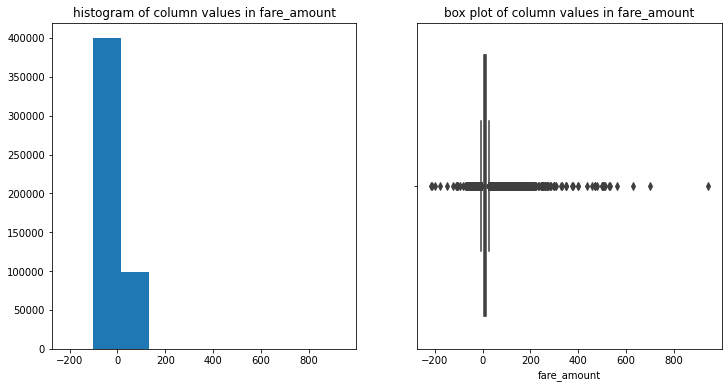

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


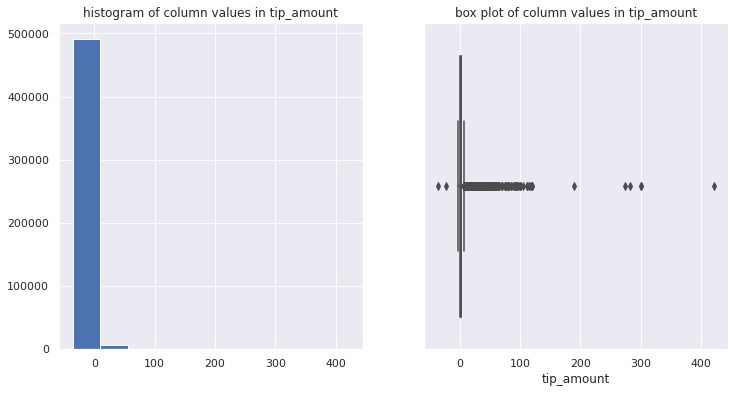

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


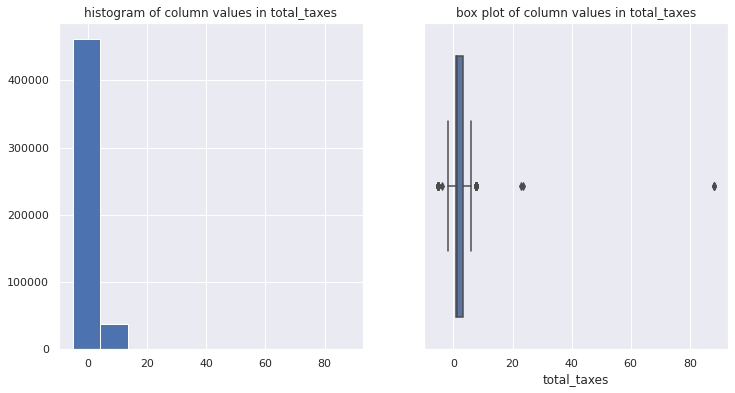

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


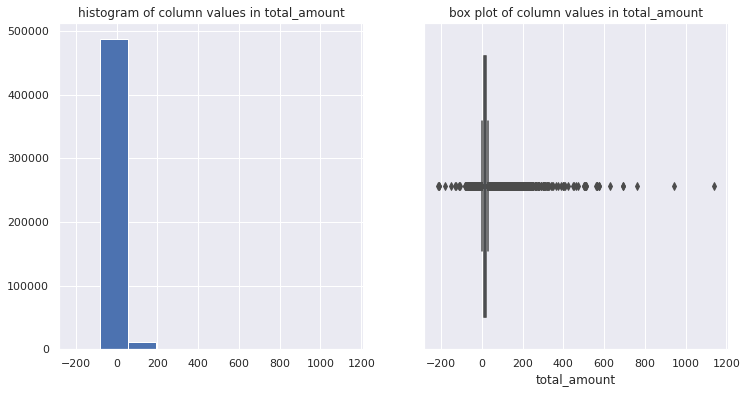

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


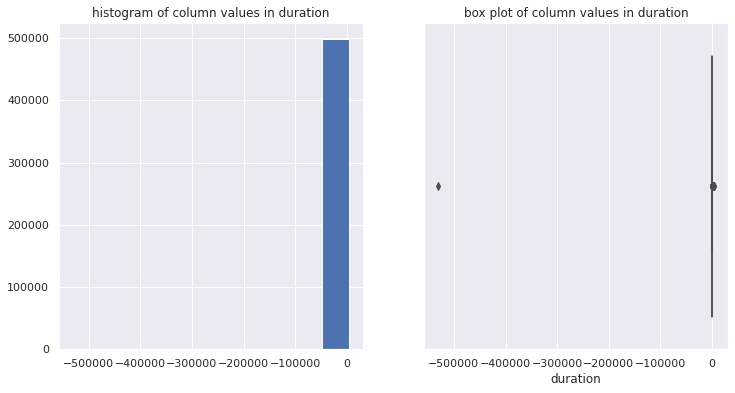

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


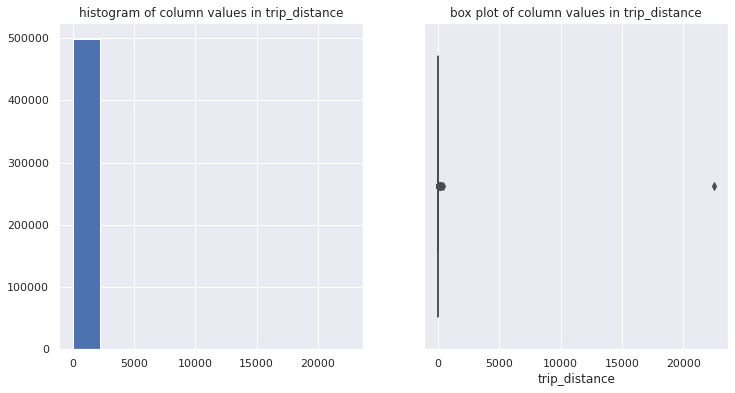

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


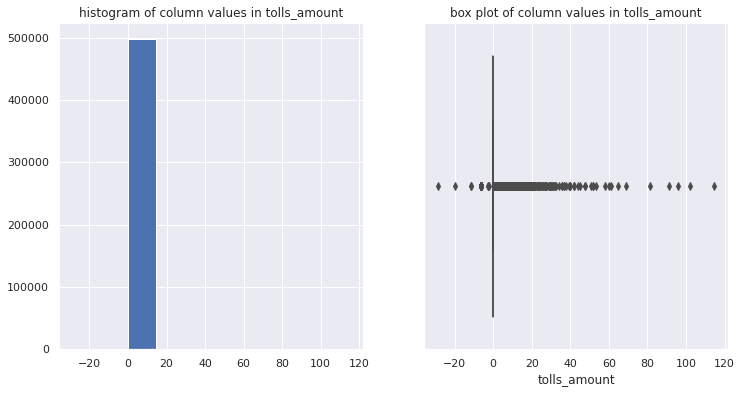

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense fare_amount tip_amount total_taxes tolls_amount total_amount duration

Let's just observe how the negative values in each of these columns look like

In [ ]:
# using .loc to show negative values in fare_amount  # 8 mil rows
trip_data.loc[trip_data['fare_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01                1   
103     2020-06-01 00:41:37   2020-06-01 00:41:54                1   
157     2020-06-01 01:56:10   2020-06-01 02:12:36                1   
167     2020-06-01 01:46:11   2020-06-01 02:06:21                1   
169     2020-06-01 01:48:54   2020-06-01 01:49:08                1   
...                     ...                   ...              ...   
496584  2020-06-30 19:55:21   2020-06-30 20:02:14                2   
497216  2020-06-30 20:04:44   2020-06-30 20:04:46                2   
497574  2020-06-30 21:11:21   2020-06-30 21:12:12                1   
498020  2020-06-30 21:56:04   2020-06-30 21:56:23                2   
498165  2020-06-30 22:53:42   2020-06-30 23:14:21                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496584           1.70           100           170      Dispute         -6.5   
497216           0.00           262           264    No_charge         -2.5   
497574           0.03            41            41      Dispute         -2.5   
498020           0.06           164           186      Dispute         -2.5   
498165           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
14             0.0           0.0          -9.3   3.550000                 0   
103            0.0           0.0          -4.8   0.283333                 0   
157            0.0           0.0         -13.8  16.433333                 1   
167            0.0           0.0         -14.8  20.166667                 1   
169            0.0           0.0          -6.3   0.233333                 1   
...            ...           ...           ...        ...               ...   
496584         0.0           0.0         -10.8   6.883333                19   
497216         0.0           0.0          -3.8   0.033333                20   
497574         0.0           0.0          -3.8   0.850000                21   
498020         0.0           0.0          -6.3   0.316667                21   
498165         0.0           0.0         -22.3  20.650000                22   

        trip_dropoff_hour trip_day  total_taxes  
14                      0   Monday         -1.3  
103                     0   Monday         -0.3  
157                     2   Monday         -1.3  
167                     2   Monday         -1.3  
169                     1   Monday         -1.3  
...                   ...      ...          ...  
496584                 20  Tuesday         -1.8  
497216                 20  Tuesday         -1.3  
497574                 21  Tuesday         -1.3  
498020                 21  Tuesday         -1.3  
498165                 23  Tuesday         -1.3  

[2507 rows x 16 columns]

In [ ]:
# using .loc to show negative values in tip_amount
trip_data.loc[trip_data['tip_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4969    2020-06-01 12:34:24   2020-06-01 12:34:46                1   
29627   2020-06-03 10:19:57   2020-06-03 10:20:14                1   
31382   2020-06-03 12:34:51   2020-06-03 12:35:16                1   
69396   2020-06-06 09:22:35   2020-06-06 09:22:41                1   
250800  2020-06-18 12:49:41   2020-06-18 12:51:54                1   
261586  2020-06-18 21:07:58   2020-06-18 21:28:00                1   
266861  2020-06-19 10:02:36   2020-06-19 10:25:54                1   
267171  2020-06-19 10:49:38   2020-06-19 10:49:45                2   
287651  2020-06-20 12:00:05   2020-06-20 12:00:17                1   
289530  2020-06-20 14:55:08   2020-06-20 14:55:43                1   
290429  2020-06-20 15:07:45   2020-06-20 15:07:49                1   
313347  2020-06-22 10:14:56   2020-06-22 10:15:13                1   
314932  2020-06-22 11:44:30   2020-06-22 11:49:22                1   
315585  2020-06-22 12:05:12   2020-06-22 12:05:42                1   
321751  2020-06-22 16:21:07   2020-06-22 16:22:50                1   
336792  2020-06-23 11:54:49   2020-06-23 11:55:43                1   
362685  2020-06-24 13:32:35   2020-06-24 13:34:15                1   
391255  2020-06-25 16:09:26   2020-06-25 16:09:36                1   
399330  2020-06-26 04:52:06   2020-06-26 04:54:23                1   
407832  2020-06-26 13:12:39   2020-06-26 13:13:07                1   
428807  2020-06-27 13:37:18   2020-06-27 13:39:04                6   
457223  2020-06-29 09:07:01   2020-06-29 09:07:49                1   
458904  2020-06-29 10:10:40   2020-06-29 10:10:51                1   
459523  2020-06-29 11:08:44   2020-06-29 11:09:14                1   
462194  2020-06-29 13:40:02   2020-06-29 13:40:32                1   
466082  2020-06-29 15:28:52   2020-06-29 15:29:08                1   
466289  2020-06-29 15:01:23   2020-06-29 15:01:37                1   
466470  2020-06-29 15:06:59   2020-06-29 15:07:56                3   
482092  2020-06-30 11:10:29   2020-06-30 11:11:01                1   
485581  2020-06-30 13:34:39   2020-06-30 13:36:12                1   
486643  2020-06-30 13:39:31   2020-06-30 13:40:33                1   
493352  2020-06-30 17:11:26   2020-06-30 17:13:39                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
4969             0.00           193           193      Dispute         -2.5   
29627            0.00           193           193    No_charge         -2.5   
31382            0.00           193           193      Dispute         -2.5   
69396            0.00           193           193    No_charge         -2.5   
250800           0.00             7             7    No_charge         -3.5   
261586           4.07           239           137      Dispute        -17.0   
266861          10.59           231           223  Credit_card        -31.0   
267171           0.00           193           264    No_charge         -2.5   
287651           0.00           193           193    No_charge         -2.5   
289530           0.00           193           193    No_charge         -2.5   
290429           0.00           193           193      Dispute         -2.5   
313347           0.00           193           193    No_charge         -2.5   
314932           0.00           193           193    No_charge         -4.5   
315585           0.00           193           193    No_charge         -2.5   
321751           0.00           193           193    No_charge         -3.0   
336792           0.00           193           193    No_charge         -2.5   
362685           0.00           193           193    No_charge         -3.0   
391255           0.00           152           264    No_charge         -2.5   
399330           0.00           152           152    No_charge         -3.5   
407832           0.00           193           193    No_charge         -2.5   
428807           0.00           193  

In [ ]:
# using .loc to show negative values in tolls_amount
trip_data.loc[trip_data['tolls_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
26633   2020-06-03 01:01:05   2020-06-03 01:21:12                1   
50519   2020-06-04 17:45:16   2020-06-04 17:57:23                1   
57050   2020-06-05 10:53:22   2020-06-05 11:18:36                1   
58141   2020-06-05 11:17:46   2020-06-05 11:46:03                1   
61204   2020-06-05 14:34:36   2020-06-05 14:49:27                1   
67111   2020-06-05 20:12:07   2020-06-05 20:44:02                1   
76709   2020-06-06 19:34:15   2020-06-06 20:07:45                1   
92473   2020-06-08 11:28:59   2020-06-08 11:57:17                1   
114260  2020-06-09 16:01:43   2020-06-09 16:33:58                1   
118430  2020-06-09 22:14:44   2020-06-09 22:51:44                4   
131442  2020-06-10 17:42:44   2020-06-10 18:43:40                1   
161977  2020-06-12 15:32:10   2020-06-12 16:07:18                1   
165387  2020-06-12 18:49:03   2020-06-12 19:10:08                1   
171665  2020-06-13 10:45:53   2020-06-13 11:11:32                1   
172249  2020-06-13 11:28:27   2020-06-13 11:45:30                1   
176014  2020-06-13 15:34:09   2020-06-13 15:56:52                1   
188465  2020-06-14 17:08:15   2020-06-14 17:29:17                1   
207026  2020-06-15 20:52:40   2020-06-15 21:22:12                1   
243779  2020-06-17 23:37:16   2020-06-18 00:01:42                1   
250897  2020-06-18 12:23:19   2020-06-18 12:56:31                1   
262260  2020-06-18 23:04:33   2020-06-18 23:22:36                1   
268467  2020-06-19 11:19:23   2020-06-19 11:42:33                1   
269400  2020-06-19 12:45:41   2020-06-19 13:03:37                1   
269951  2020-06-19 12:02:01   2020-06-19 12:21:11                1   
281555  2020-06-19 21:25:39   2020-06-19 22:16:00                1   
283515  2020-06-20 03:36:57   2020-06-20 04:05:24                1   
297021  2020-06-21 05:21:47   2020-06-21 05:23:01                3   
328147  2020-06-22 21:12:44   2020-06-22 21:14:06                2   
360760  2020-06-24 12:33:40   2020-06-24 12:58:41                1   
370232  2020-06-24 18:15:52   2020-06-24 18:46:24                1   
374721  2020-06-24 23:43:28   2020-06-25 00:06:42                1   
374900  2020-06-24 23:54:34   2020-06-25 00:22:27                1   
387735  2020-06-25 14:48:34   2020-06-25 15:20:08                1   
394468  2020-06-25 18:28:52   2020-06-25 18:54:58                1   
403891  2020-06-26 10:28:29   2020-06-26 11:02:31                1   
414661  2020-06-26 16:01:48   2020-06-26 16:02:02                1   
415577  2020-06-26 17:48:53   2020-06-26 18:24:05                1   
420421  2020-06-26 20:38:54   2020-06-26 21:00:25                1   
420808  2020-06-26 21:13:29   2020-06-26 21:56:32                1   
423234  2020-06-27 00:06:15   2020-06-27 00:32:42                1   
423642  2020-06-27 02:28:26   2020-06-27 02:51:44                1   
433223  2020-06-27 16:08:46   2020-06-27 16:34:20                1   
451287  2020-06-28 20:50:03   2020-06-28 21:25:18                1   
455039  2020-06-29 07:21:02   2020-06-29 07:41:32                1   
455728  2020-06-29 08:56:08   2020-06-29 09:30:05                1   
459702  2020-06-29 11:44:03   2020-06-29 12:06:25                1   
469742  2020-06-29 17:16:03   2020-06-29 17:49:41                1   
491983  2020-06-30 16:47:59   2020-06-30 17:49:24                1   
493518  2020-06-30 17:13:59   2020-06-30 17:48:49                1   
495440  2020-06-30 18:30:28   2020-06-30 18:59:19                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
26633            9.78           170           197      Dispute        -28.5   
50519            3.02           170           112         Cash        -11.5   
57050           11.55           230           121      Dispute        -35.0   
58141           19.58            48             1         Cash        -53.0   
61204            9.82           138      

In [ ]:
# using .loc to show negative values in total_taxes
trip_data.loc[trip_data['total_taxes']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01                1   
103     2020-06-01 00:41:37   2020-06-01 00:41:54                1   
157     2020-06-01 01:56:10   2020-06-01 02:12:36                1   
167     2020-06-01 01:46:11   2020-06-01 02:06:21                1   
169     2020-06-01 01:48:54   2020-06-01 01:49:08                1   
...                     ...                   ...              ...   
496584  2020-06-30 19:55:21   2020-06-30 20:02:14                2   
497216  2020-06-30 20:04:44   2020-06-30 20:04:46                2   
497574  2020-06-30 21:11:21   2020-06-30 21:12:12                1   
498020  2020-06-30 21:56:04   2020-06-30 21:56:23                2   
498165  2020-06-30 22:53:42   2020-06-30 23:14:21                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496584           1.70           100           170      Dispute         -6.5   
497216           0.00           262           264    No_charge         -2.5   
497574           0.03            41            41      Dispute         -2.5   
498020           0.06           164           186      Dispute         -2.5   
498165           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
14             0.0           0.0          -9.3   3.550000                 0   
103            0.0           0.0          -4.8   0.283333                 0   
157            0.0           0.0         -13.8  16.433333                 1   
167            0.0           0.0         -14.8  20.166667                 1   
169            0.0           0.0          -6.3   0.233333                 1   
...            ...           ...           ...        ...               ...   
496584         0.0           0.0         -10.8   6.883333                19   
497216         0.0           0.0          -3.8   0.033333                20   
497574         0.0           0.0          -3.8   0.850000                21   
498020         0.0           0.0          -6.3   0.316667                21   
498165         0.0           0.0         -22.3  20.650000                22   

        trip_dropoff_hour trip_day  total_taxes  
14                      0   Monday         -1.3  
103                     0   Monday         -0.3  
157                     2   Monday         -1.3  
167                     2   Monday         -1.3  
169                     1   Monday         -1.3  
...                   ...      ...          ...  
496584                 20  Tuesday         -1.8  
497216                 20  Tuesday         -1.3  
497574                 21  Tuesday         -1.3  
498020                 21  Tuesday         -1.3  
498165                 23  Tuesday         -1.3  

[2505 rows x 16 columns]

In [ ]:
# using .loc to show negative values in total_amount
trip_data.loc[trip_data['total_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01                1   
103     2020-06-01 00:41:37   2020-06-01 00:41:54                1   
157     2020-06-01 01:56:10   2020-06-01 02:12:36                1   
167     2020-06-01 01:46:11   2020-06-01 02:06:21                1   
169     2020-06-01 01:48:54   2020-06-01 01:49:08                1   
...                     ...                   ...              ...   
496584  2020-06-30 19:55:21   2020-06-30 20:02:14                2   
497216  2020-06-30 20:04:44   2020-06-30 20:04:46                2   
497574  2020-06-30 21:11:21   2020-06-30 21:12:12                1   
498020  2020-06-30 21:56:04   2020-06-30 21:56:23                2   
498165  2020-06-30 22:53:42   2020-06-30 23:14:21                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496584           1.70           100           170      Dispute         -6.5   
497216           0.00           262           264    No_charge         -2.5   
497574           0.03            41            41      Dispute         -2.5   
498020           0.06           164           186      Dispute         -2.5   
498165           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount   duration  trip_pickup_hour  \
14             0.0           0.0          -9.3   3.550000                 0   
103            0.0           0.0          -4.8   0.283333                 0   
157            0.0           0.0         -13.8  16.433333                 1   
167            0.0           0.0         -14.8  20.166667                 1   
169            0.0           0.0          -6.3   0.233333                 1   
...            ...           ...           ...        ...               ...   
496584         0.0           0.0         -10.8   6.883333                19   
497216         0.0           0.0          -3.8   0.033333                20   
497574         0.0           0.0          -3.8   0.850000                21   
498020         0.0           0.0          -6.3   0.316667                21   
498165         0.0           0.0         -22.3  20.650000                22   

        trip_dropoff_hour trip_day  total_taxes  
14                      0   Monday         -1.3  
103                     0   Monday         -0.3  
157                     2   Monday         -1.3  
167                     2   Monday         -1.3  
169                     1   Monday         -1.3  
...                   ...      ...          ...  
496584                 20  Tuesday         -1.8  
497216                 20  Tuesday         -1.3  
497574                 21  Tuesday         -1.3  
498020                 21  Tuesday         -1.3  
498165                 23  Tuesday         -1.3  

[2506 rows x 16 columns]

In [ ]:
# data shape before filtering negative fare_amount rows
print(trip_data.shape)
# using .loc to filter only those rows where fare_amount is positive 
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
# print data shape
print(trip_data.shape)
# print data.head()
trip_data.head()

(499079, 16)
(496572, 16)


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58                1            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33                1            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09                1            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38                1            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30                1            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount   duration  trip_pickup_hour  trip_dropoff_hour  \
0           0.0         23.30  18.583333                 0                  0   
1           0.0         25.30  21.716667                 0                  1   
2           0.0         11.30   9.300000                 0                  0   
3           0.0         21.30  15.416667                 0                  1   
4           0.0         21.95  12.816667                 0                  0   

  trip_day  total_taxes  
0   Monday          3.8  
1   Monday          3.8  
2   Monday          1.3  
3   Monday          3.8  
4   Monday          3.8

In [ ]:
print(trip_data.loc[trip_data['tip_amount']<0].shape)
print(trip_data.loc[trip_data['total_taxes']<0].shape)
print(trip_data.loc[trip_data['tolls_amount']<0].shape)

(0, 16)
(0, 16)
(0, 16)


In [ ]:
# using .loc to show negative values in duration
trip_data.loc[trip_data['duration']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
182436  2020-06-14 04:09:09   2019-06-11 06:17:55                1   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
182436            8.1           262           138  Credit_card         26.0   

        tip_amount  tolls_amount  total_amount       duration  \
182436        7.18          6.12          43.1 -531231.233333   

        trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
182436                 4                  6   Sunday          3.8

In [ ]:
# using .loc to filter only those rows where duration is positive 
trip_data = trip_data.loc[trip_data['duration']>=0]
print(trip_data.shape)

(496571, 16)


Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


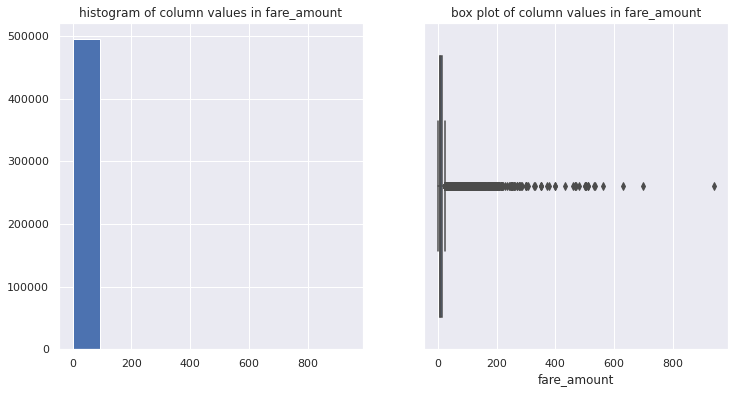

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


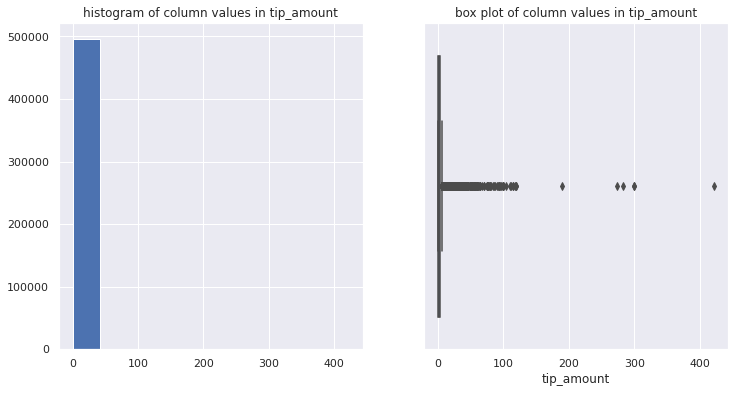

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


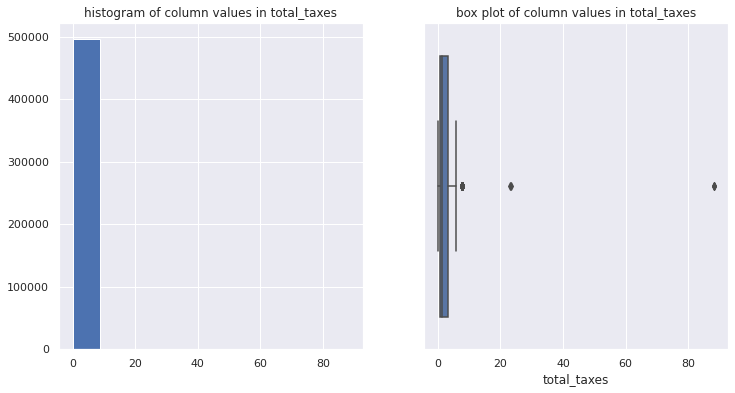

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


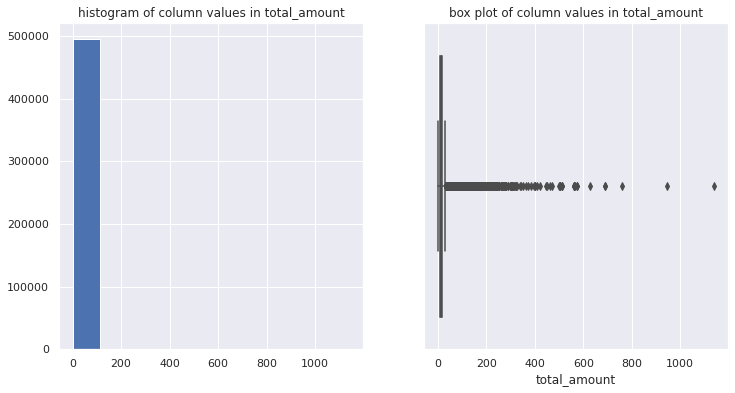

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


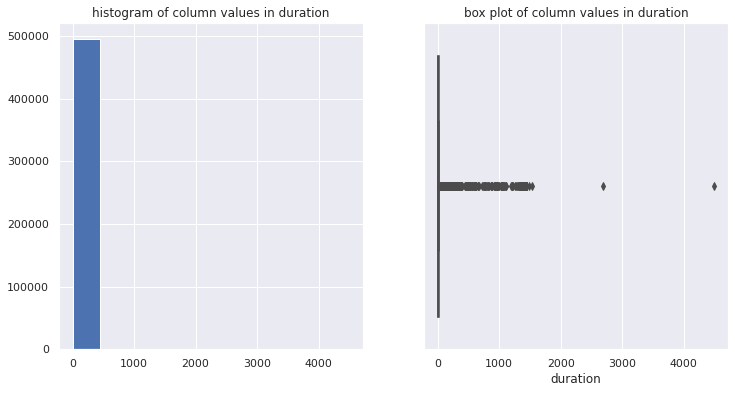

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


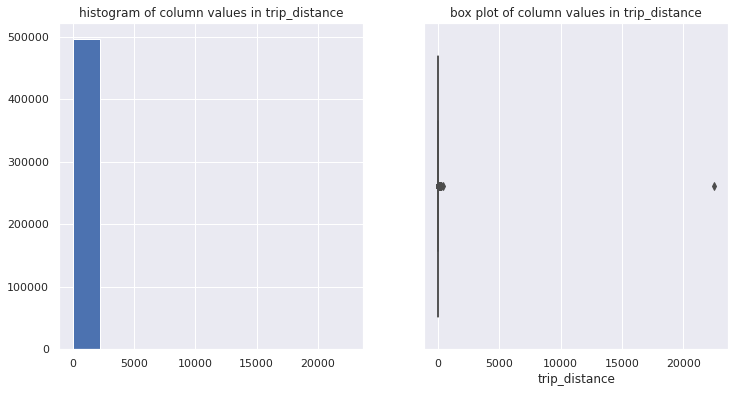

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


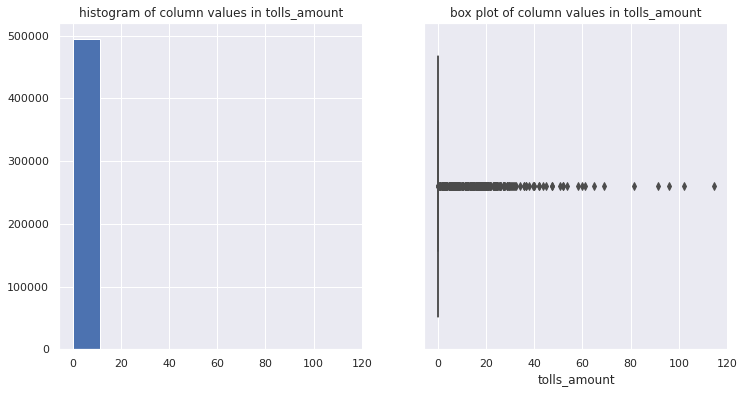

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [ ]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

fare_amount     tip_amount    total_taxes   total_amount  \
count  496571.000000  496571.000000  496571.000000  496571.000000   
mean       11.961704       1.781660       1.928412      17.186914   
std        11.302666       2.698523       1.283562      13.226619   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       0.800000      10.350000   
50%         8.500000       1.500000       1.300000      13.560000   
75%        13.500000       2.660000       3.300000      18.960000   
max       941.500000     422.680000      88.360000    1141.100000   

            duration  trip_distance   tolls_amount  
count  496571.000000  496571.000000  496571.000000  
mean       13.609472       2.869122       0.222927  
std        56.378312      32.198804       1.369394  
min         0.000000       0.000000       0.000000  
25%         5.316667       1.000000       0.000000  
50%         8.833333       1.710000       0.000000  
75%        14.333333       3.150000       0.000000  
max      4497.566667   22543.990000     114.750000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


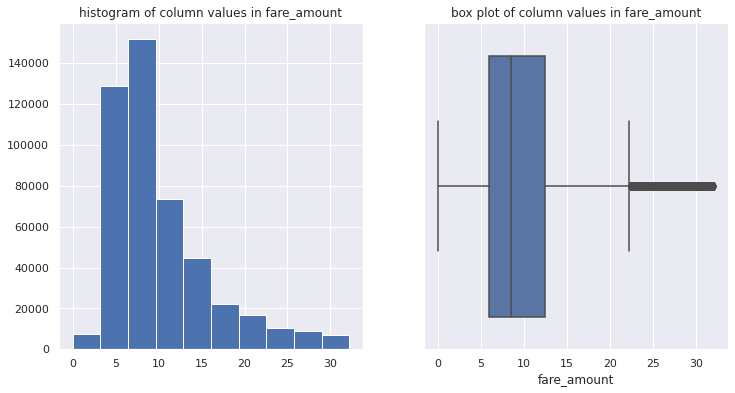

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


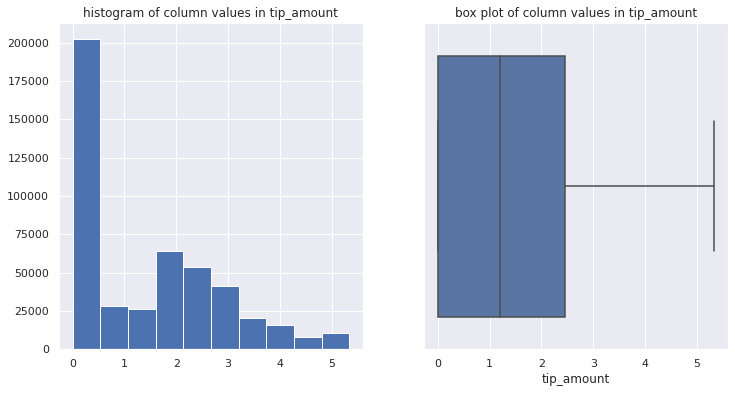

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


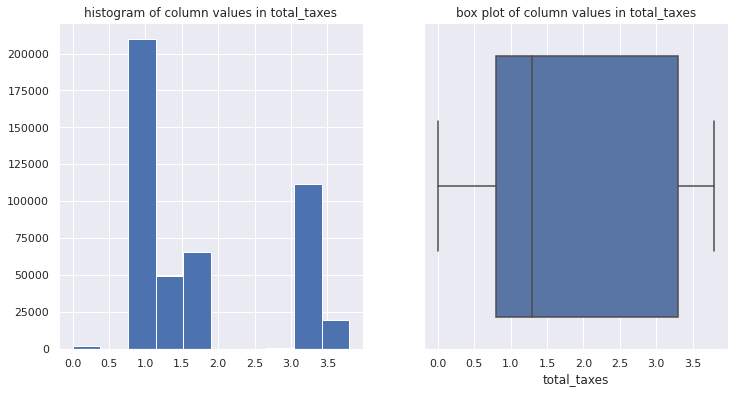

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


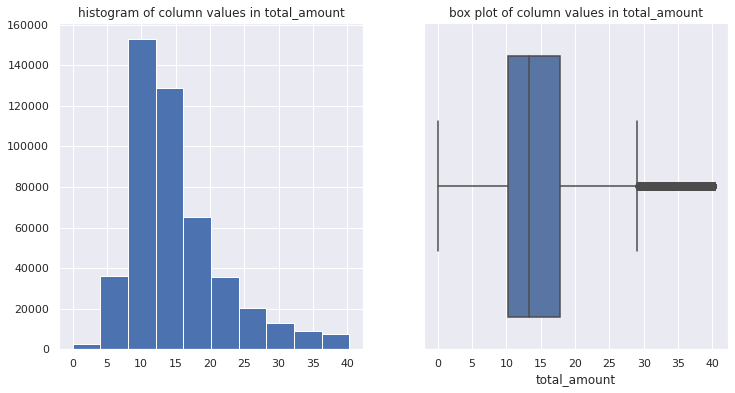

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


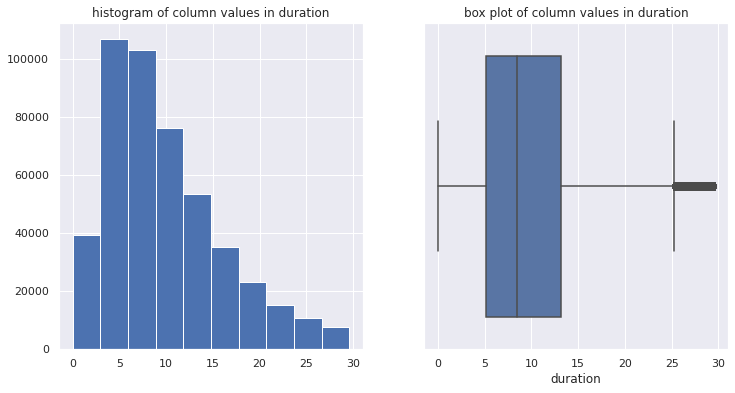

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


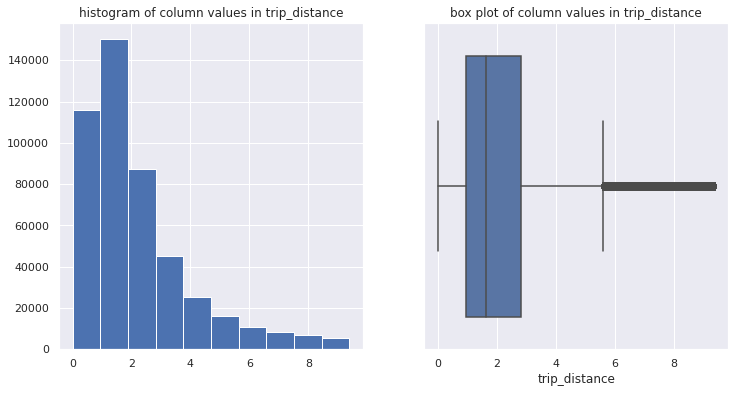

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


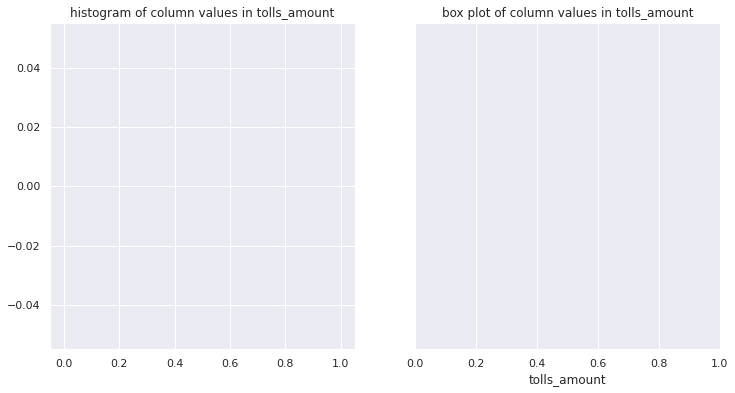

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column

fare_amount - most of the fare amount is within 8.5 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 940 dollars.

tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 400 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. There is very less outliers.

total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.some Heavy outlier exist of 1100 dollar

duration - most of the values in duration is within 8.86 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4000 minutes.

trip_distance - most of the trip_distance is within 1.7 miles value as is shown by the median. only a heavy outliers exit of around 22k miles.

categorical_variables

In [ ]:
# list of categorical_variables
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [ ]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    322579
Cash           168391
No_charge        4476
Dispute          1113
Unknown            12
Name: payment_type, dtype: int64

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

index  payment_type
0  Credit_card        322579
1         Cash        168391
2    No_charge          4476
3      Dispute          1113
4      Unknown            12

In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

index  payment_type  count_percent
0  Credit_card        322579      64.961305
1         Cash        168391      33.910760
2    No_charge          4476       0.901382
3      Dispute          1113       0.224137
4      Unknown            12       0.002417

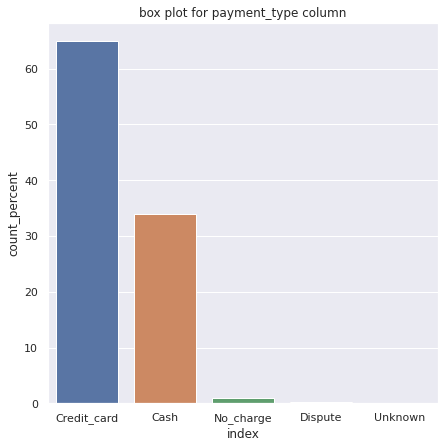

In [ ]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Now we look into time based categorical variables.

'trip_pickup_hour' 'trip_dropoff_hour' 'trip_day'

Number of categories in feature trip_pickup_hour is 24


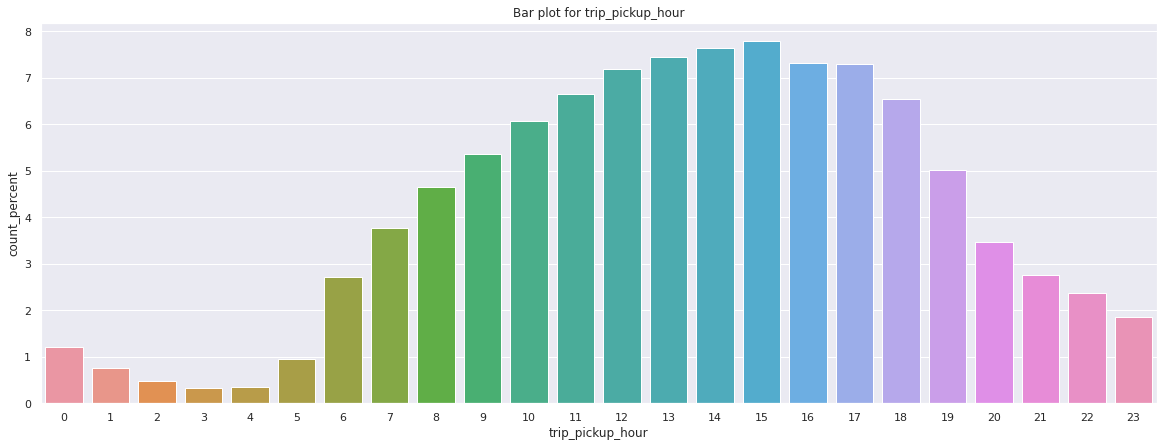

Number of categories in feature trip_dropoff_hour is 24


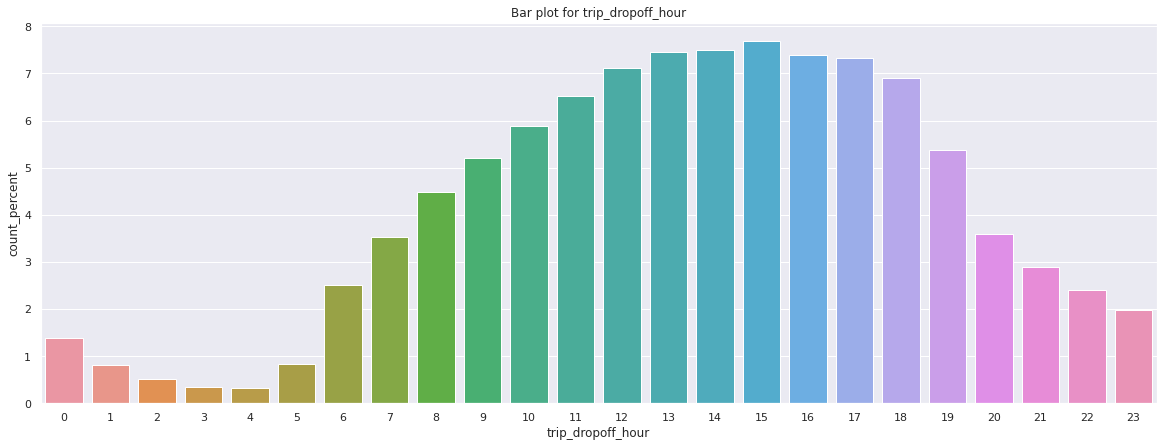

Number of categories in feature trip_day is 7


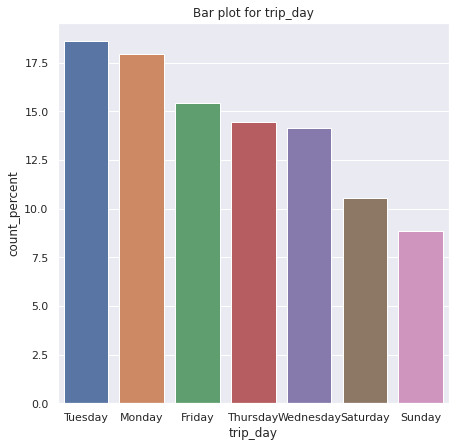

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things

Trip Hour 1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 9 min.

2) Peak hour for the pick up and drop off is around evening from 13 to 16. The busiest time is 15 PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while Tuesday is the busiest.

2)Weekdays have heavy taxi uses compared to the weekands

Moving on we will explore the distribution of location based features:

'PULocationID'

'DOLocationID'

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(252,)
(259,)


Number of categories in feature PULocationID is 252


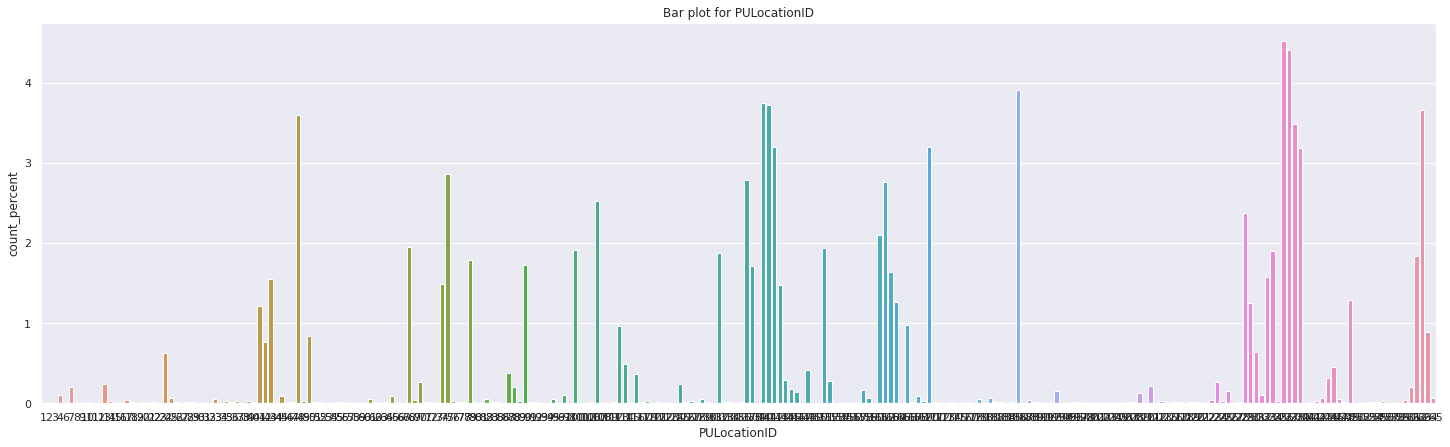

Number of categories in feature DOLocationID is 259


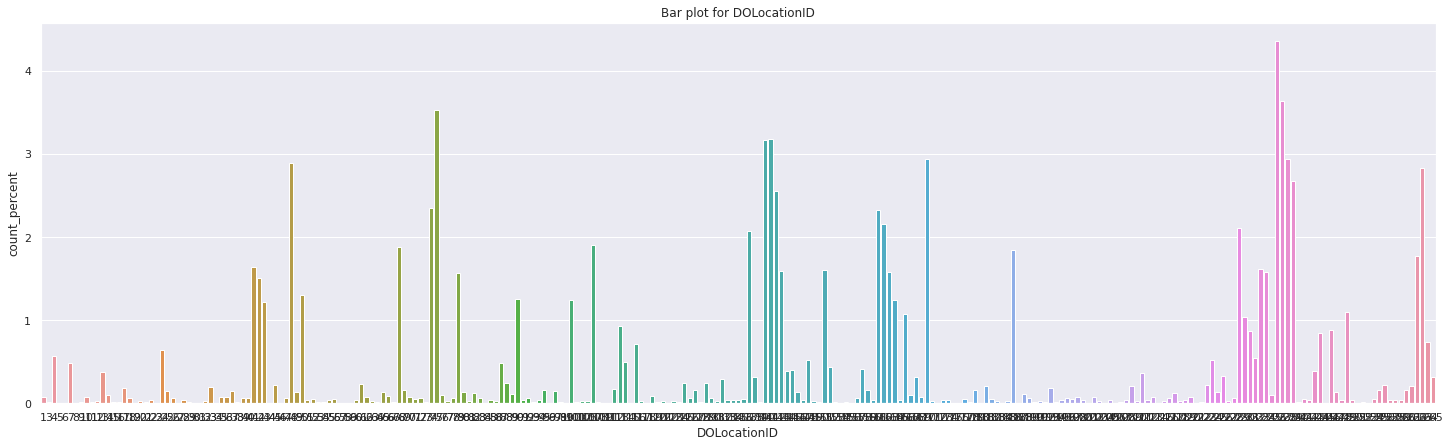

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 42


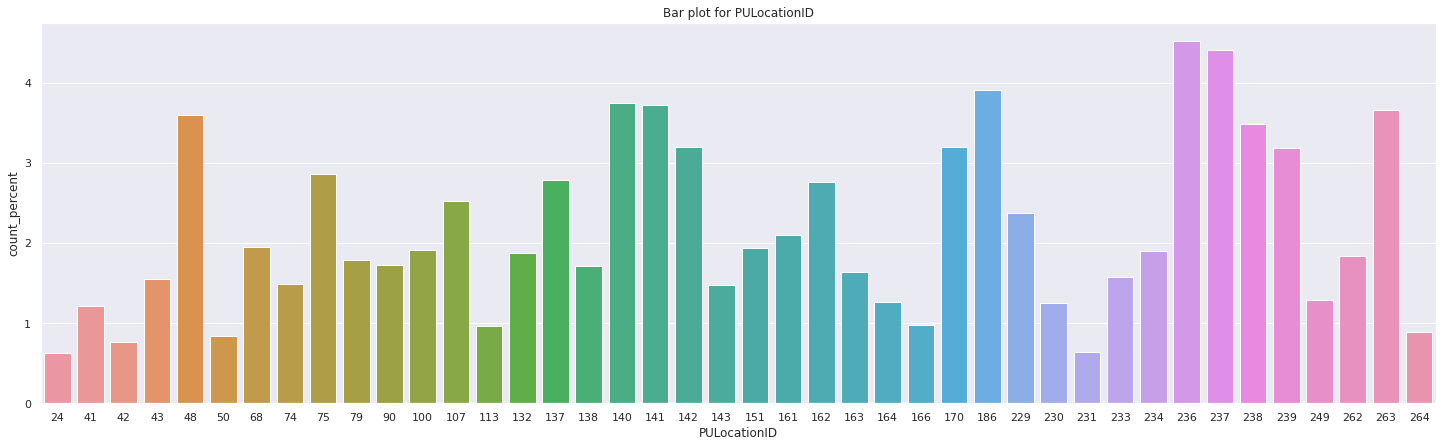

Number of categories in feature DOLocationID above 0.5 % count is 47


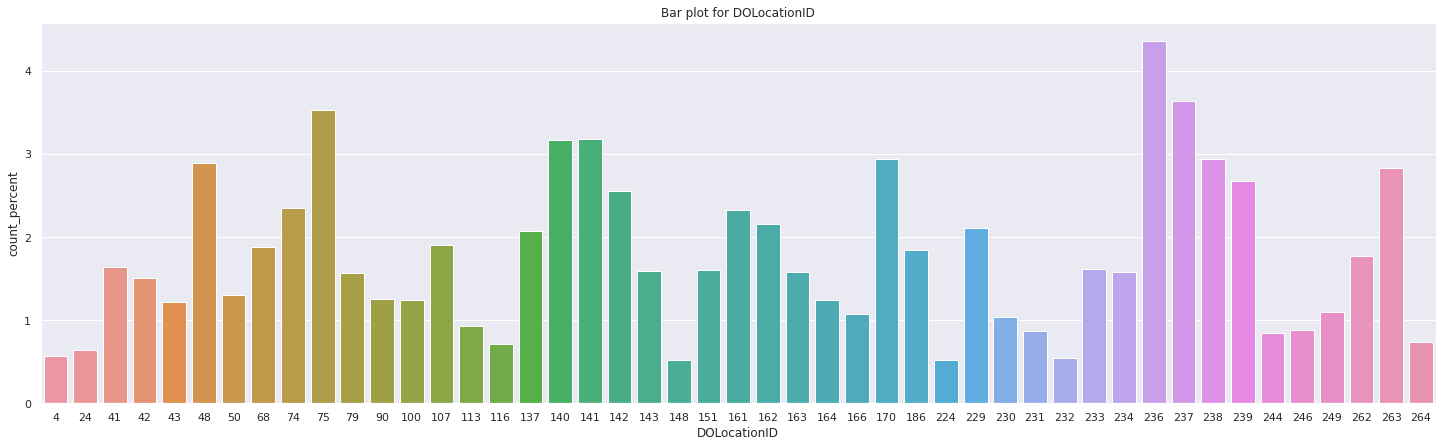

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights

The busiest location in terms of pickup are 236 and 237

The busiest location for dropoff too are 236 , 237 and 79 busiest locations but 236 is far more busiest than the other two in drop_off hour.

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [ ]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
trip_data['routes'].head()

0     140-68
1     79-226
2    238-116
3    141-116
4     186-75
Name: routes, dtype: object

Number of categories in feature routes above 0.25 % count is 23


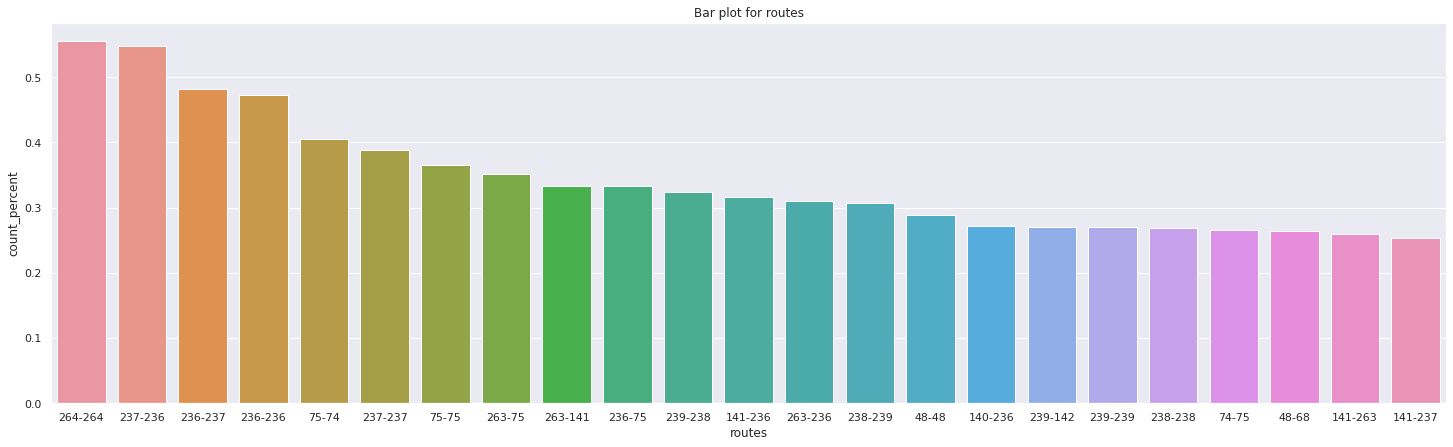

In [ ]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:

264-264

237-236

236-237

236-236

In [ ]:
# look into value_counts of 'passenger_count'
trip_data['passenger_count'].value_counts()

1    386903
2     56951
3     14257
0     13303
5     11187
6      9045
4      4922
9         2
8         1
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare

### Bivariate Analysis

PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP *

All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable.

so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

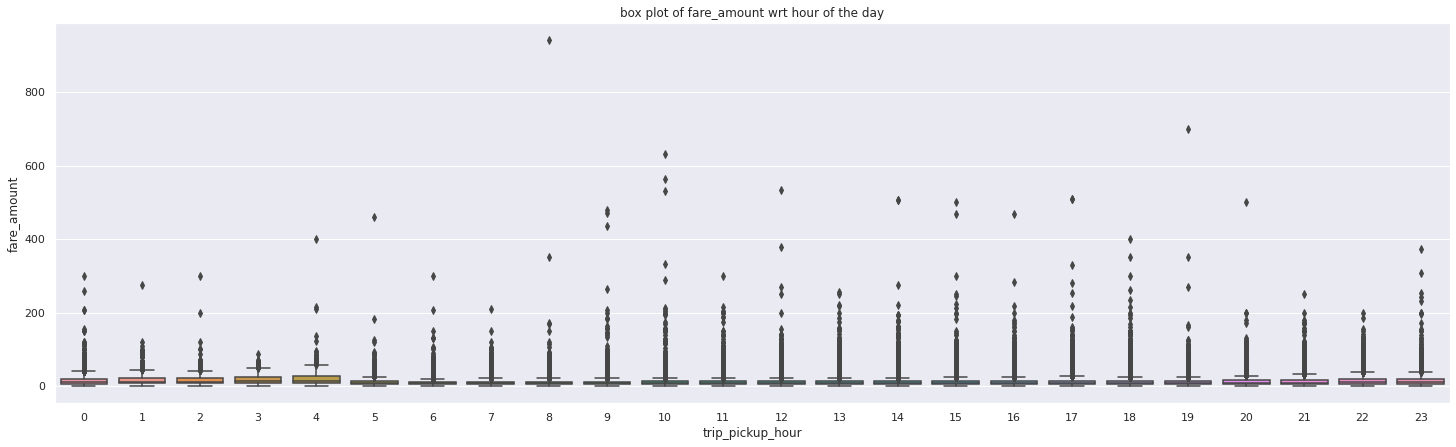

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

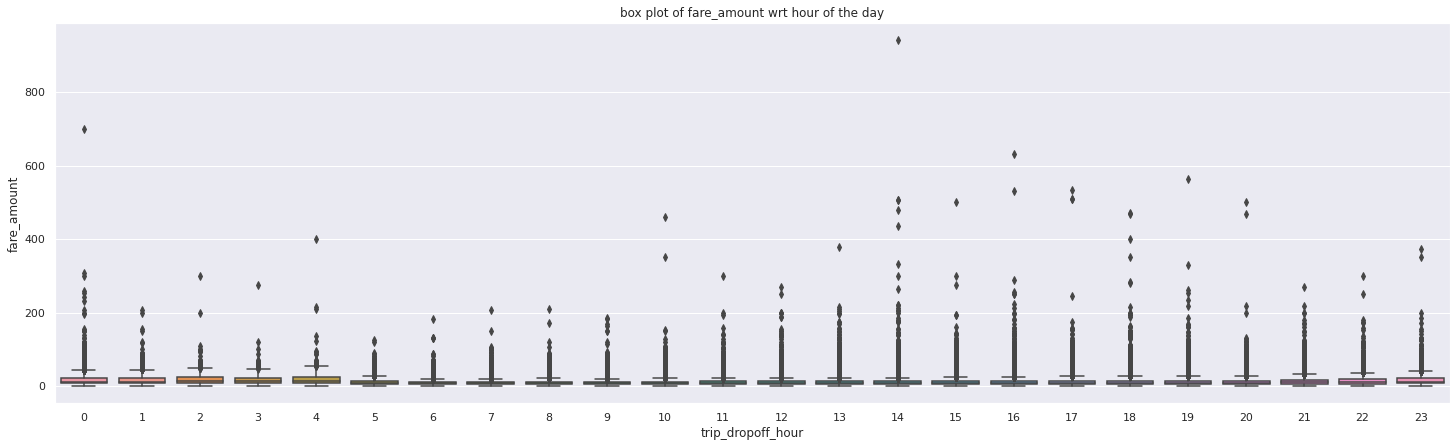

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare_amount happens during 10AM to 7PM based on pickup time.

From the above plot trip_dropoff_hour outliers happens during 14 or 2PM to 20 or 8PM based on pickup time.

Outliers is less in the late nights and early morning.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars.

In [ ]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(487000, 17)

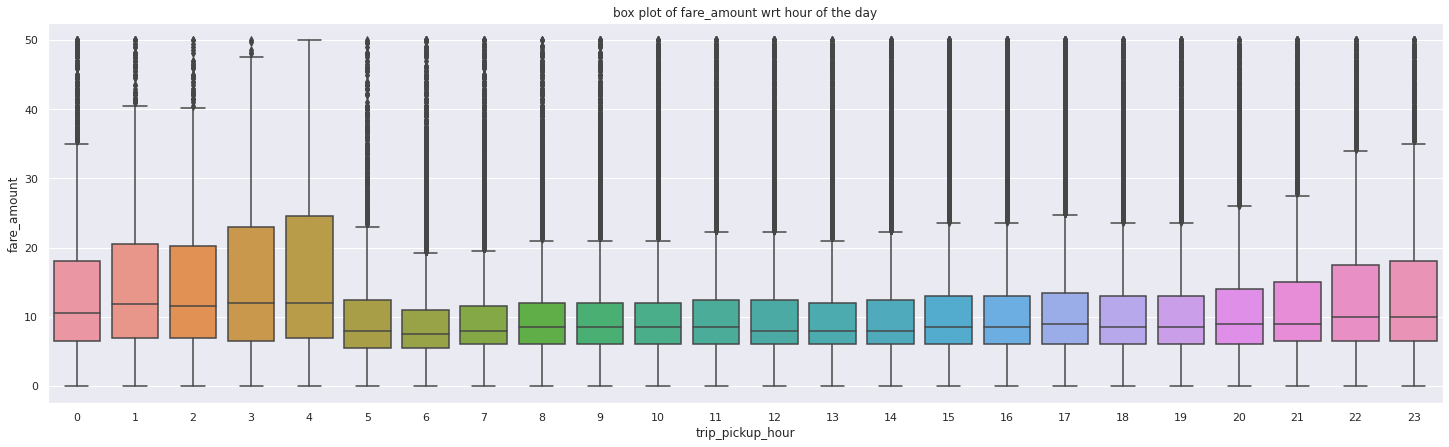

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

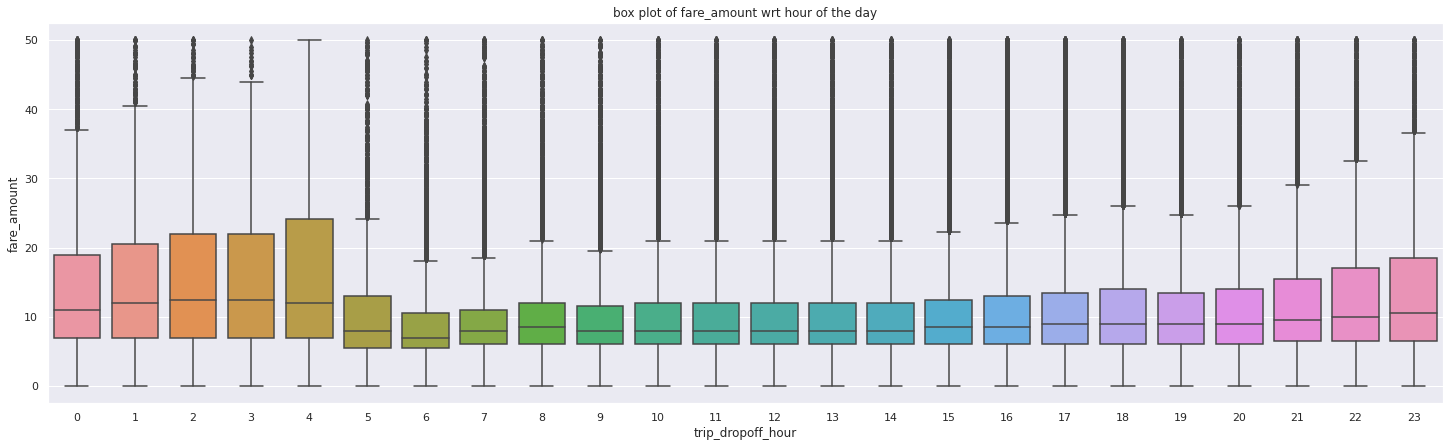

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can obseve from the above graph the fare_amount in late nigth is comparitively higher than the rest of the hours(same pattern seen in both the cases).

Also the median fare_amount between 5 - 6 is less than all others hours of the day(seen in bothe cases)

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

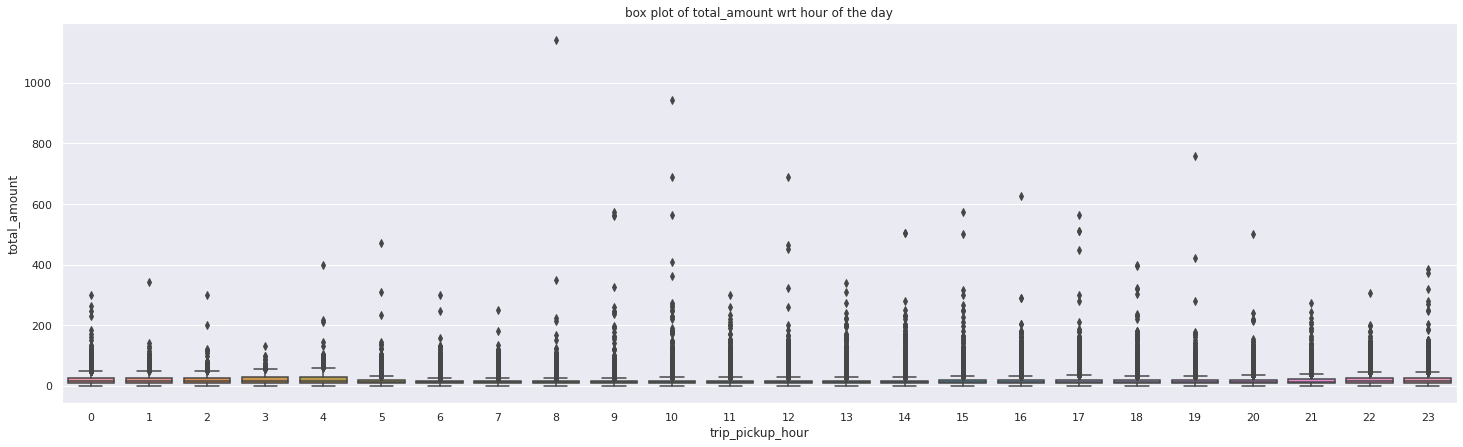

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

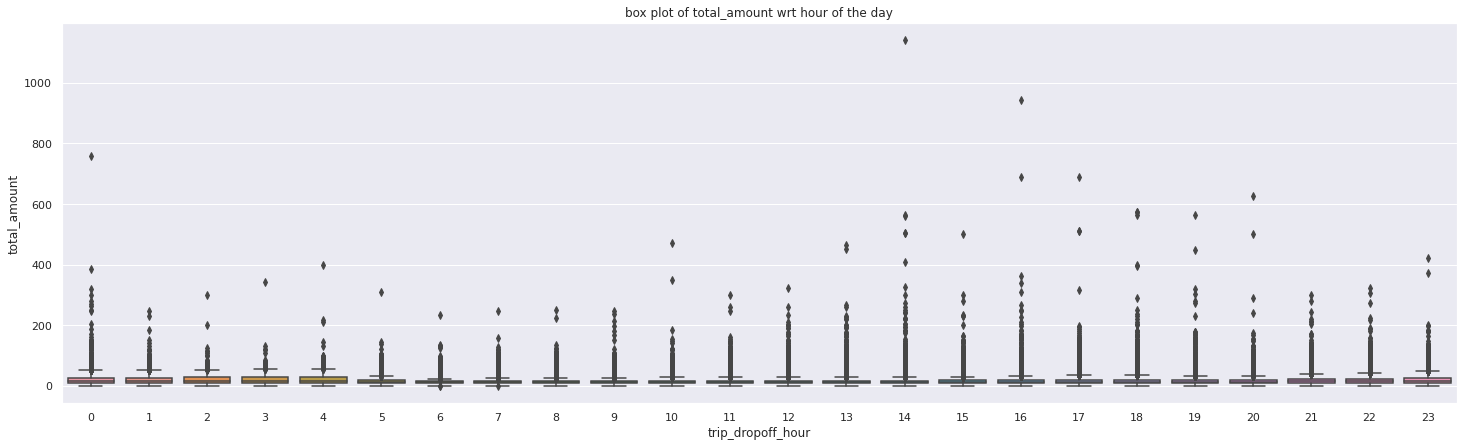

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

In [ ]:
# restricted_total_amount_data for filtering total_amount data to less than 50 dollars
restricted_total_amount_data = trip_data.loc[trip_data['total_amount']<=50]
restricted_total_amount_data.shape

(482489, 17)

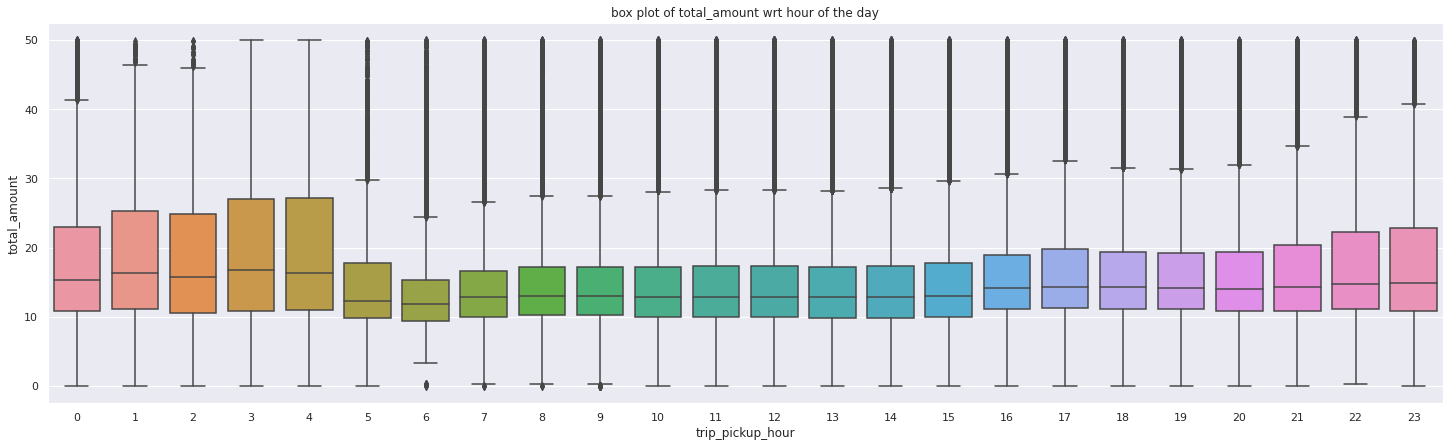

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

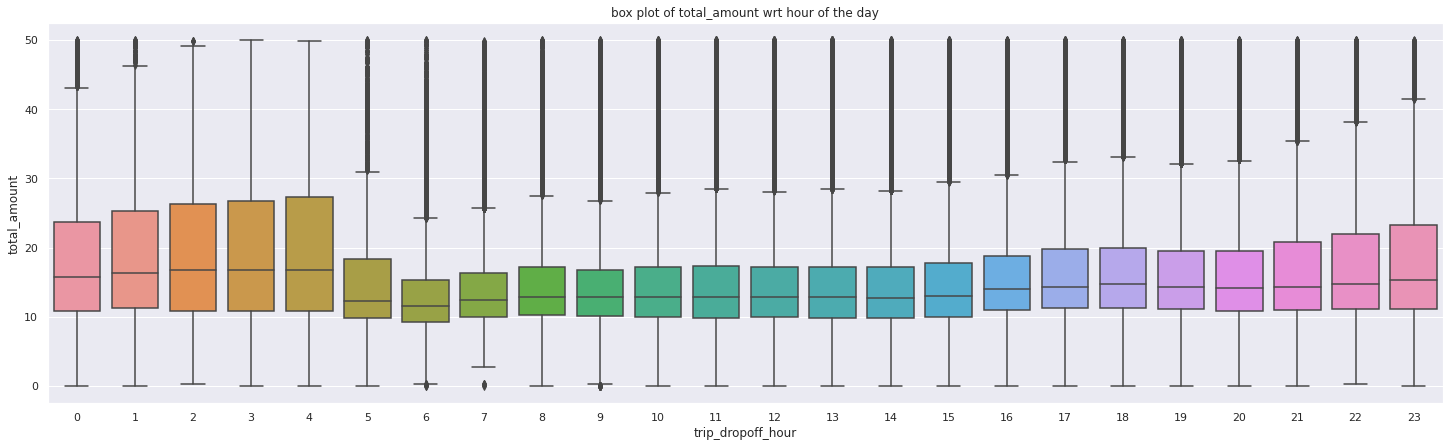

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

the pattern of total_amount is same as the pattern we seen in the fare_amount

In [ ]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_taxes']<10]

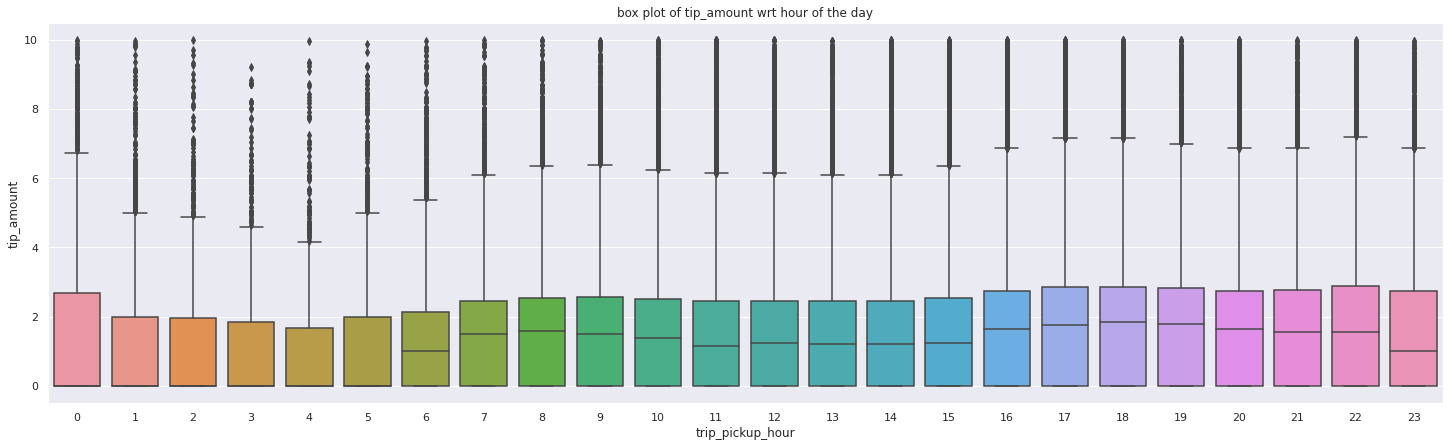

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

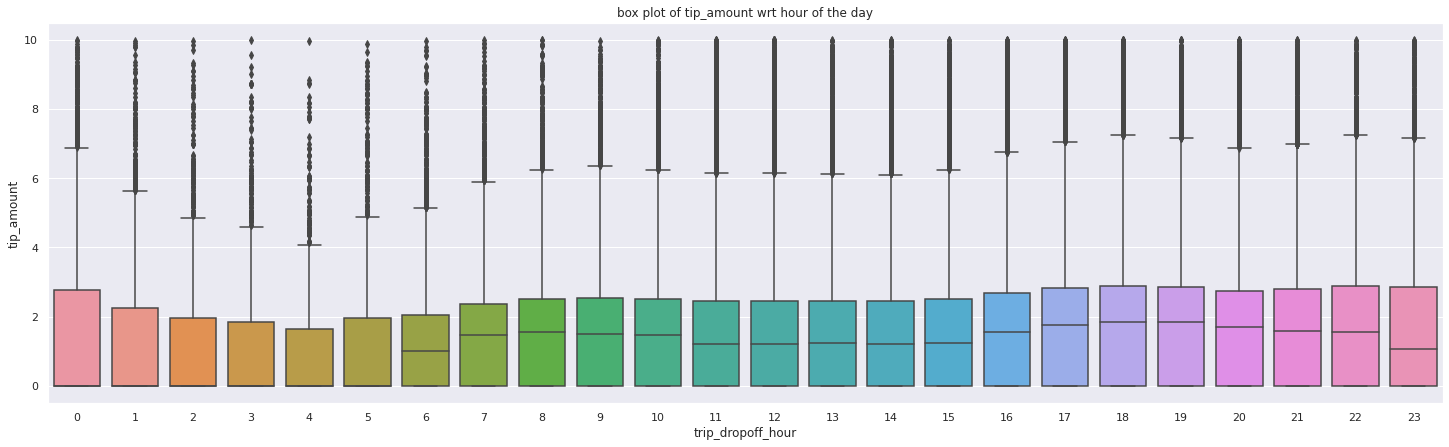

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

The median of tip_amount in early morning is mostly zero but IQR is high that means the some of the tip amounts are higher end).

And in between 11 -14 the tip_amount is minimum and almost constant, whereas tip amount is on higher side in evenings.

(Same pattern seen in both the trip_pickup and trip_drop_off)

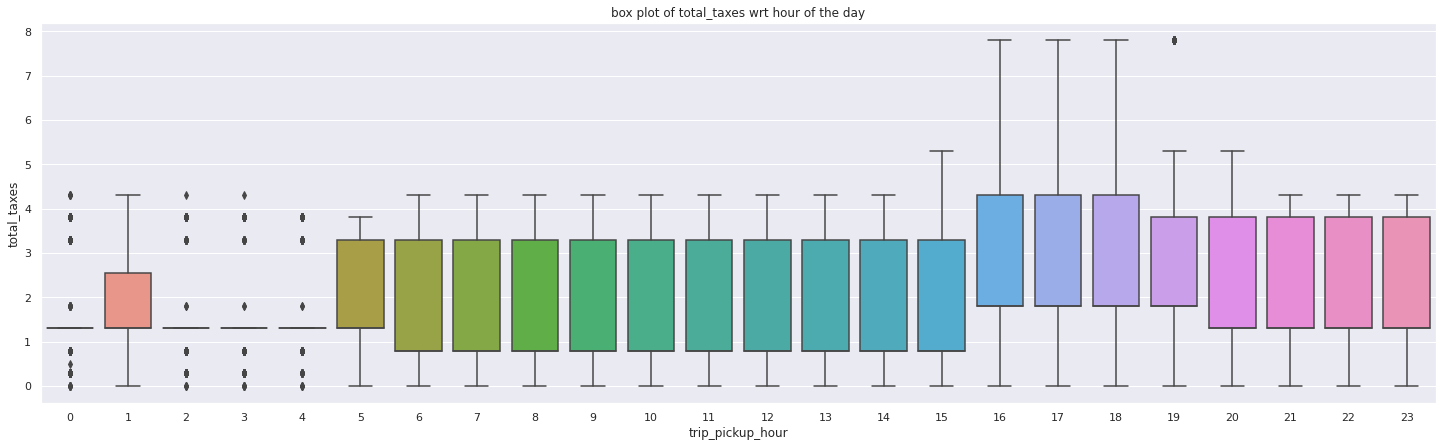

In [ ]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

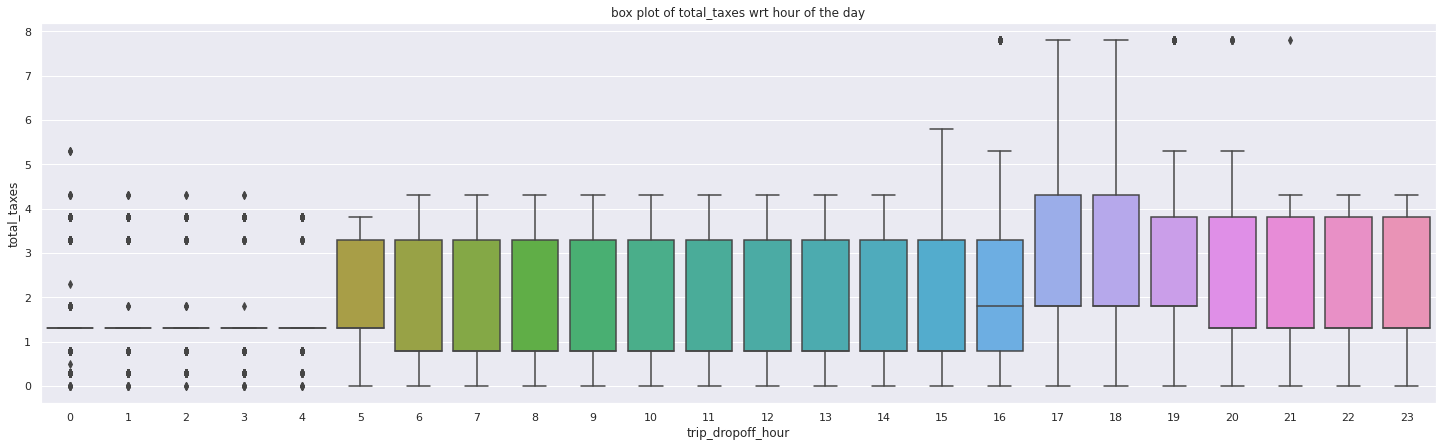

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

The taxs imposed from 16 to 19 is much higher as compared to the other hours beacue traffic surcharge.

The taxes in the period between 6 to 15 is much lower than the other pick_up hours

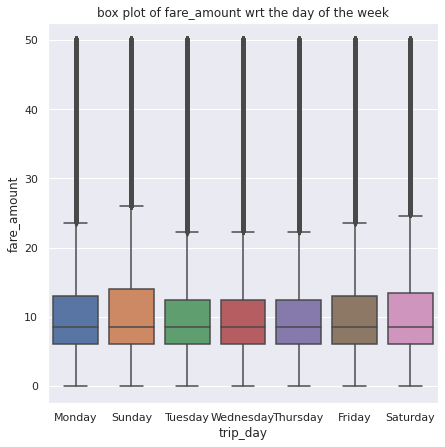

In [ ]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

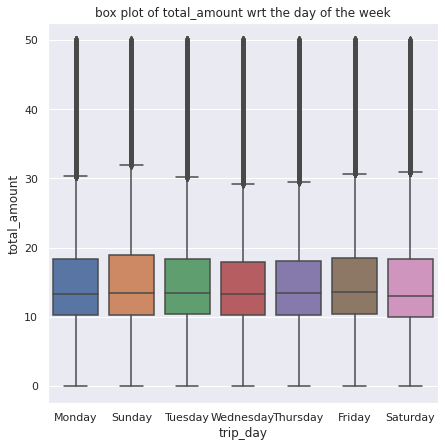

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week')
sns.set()
plt.show()

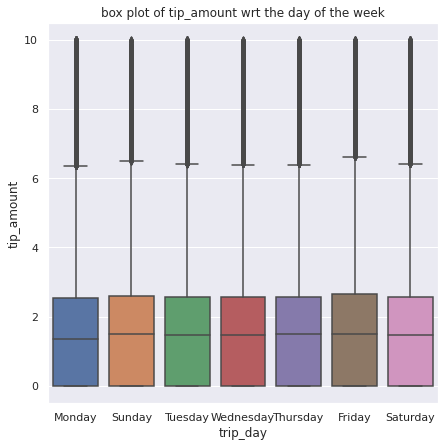

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

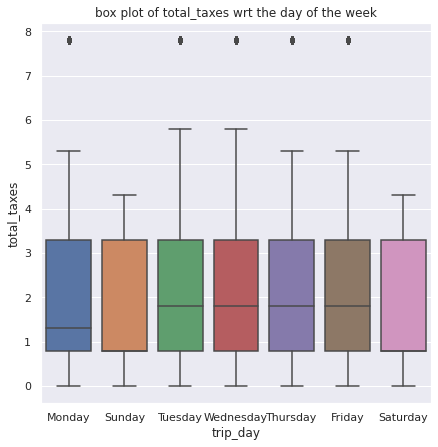

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.but total taxes are higher in weekdays compared to weekands

In [ ]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

236    22458
237    21882
186    19429
140    18589
141    18491
Name: PULocationID, dtype: int64

In [ ]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([236, 237, 186, 140, 141, 263, 48, 238, 142, 170], dtype='int64')

The median fare_amount of trips taken from 236 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


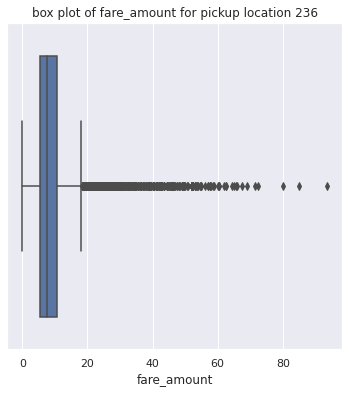

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


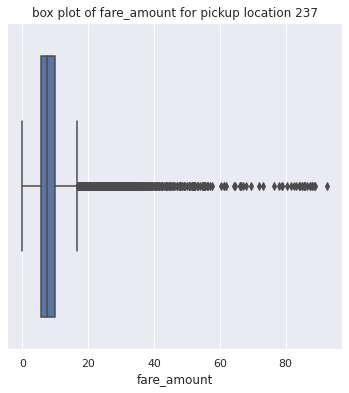

The median fare_amount of trips taken from 186 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


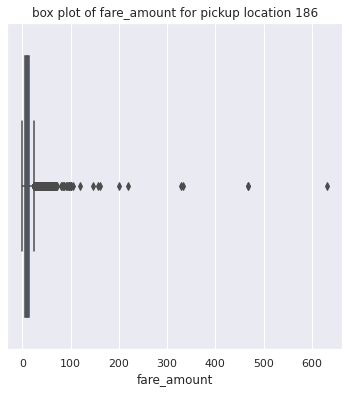

The median fare_amount of trips taken from 140 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


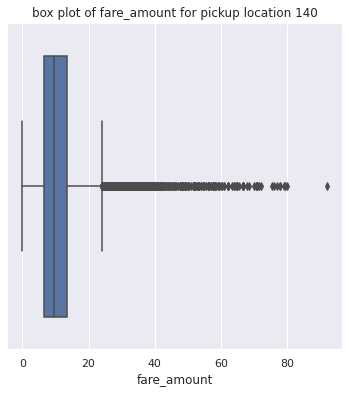

The median fare_amount of trips taken from 141 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


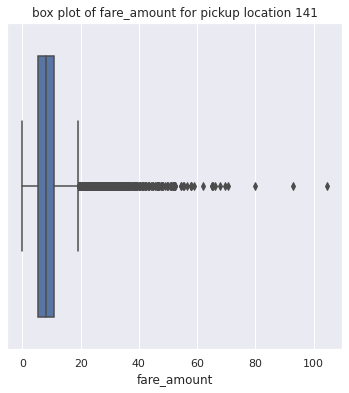

The median fare_amount of trips taken from 263 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


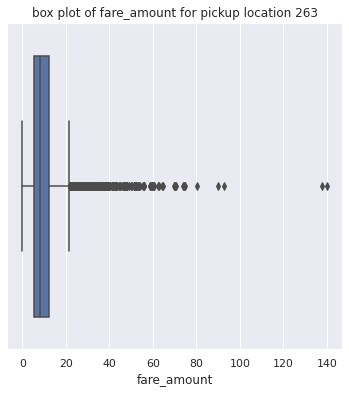

The median fare_amount of trips taken from 48 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


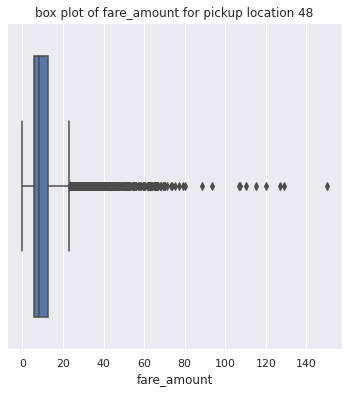

The median fare_amount of trips taken from 238 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


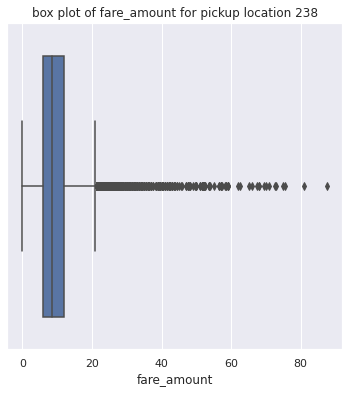

The median fare_amount of trips taken from 142 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


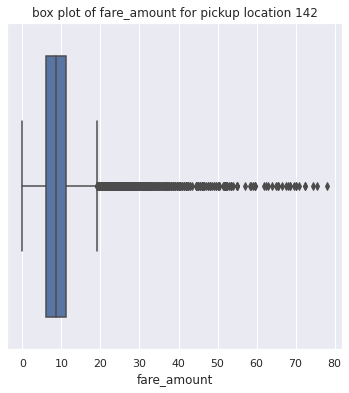

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


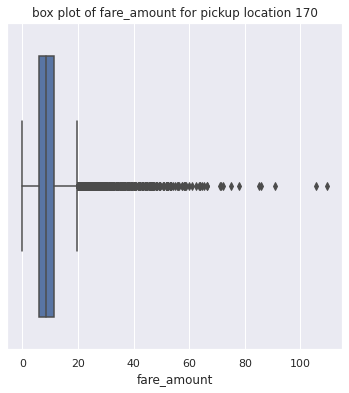

In [ ]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location i.e 236 has median fare_amount is low in comparison to other busiset location.

It is also observe that the median fare_amount is highest for the location ID 140 which is about 9.5 dollars

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

### Duration Exploration

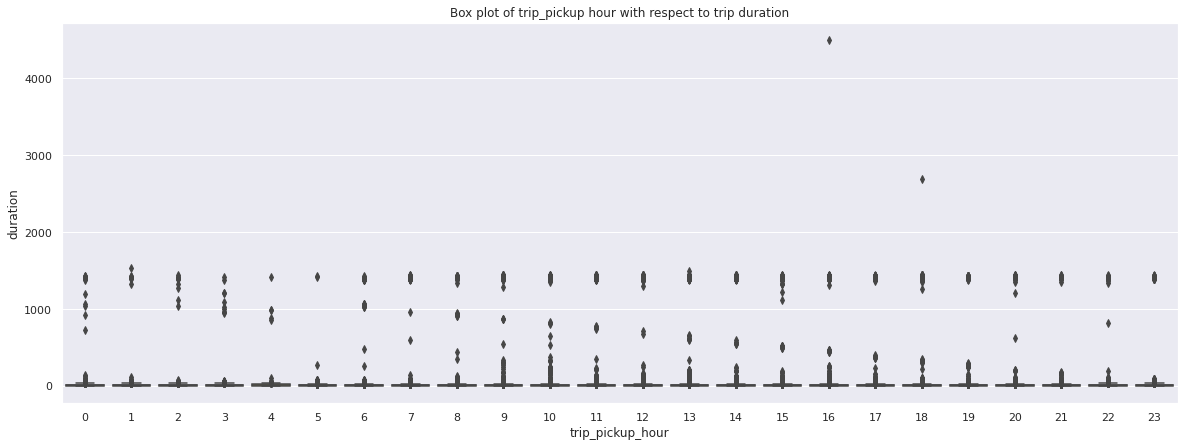

In [ ]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

In [ ]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(491939, 17)

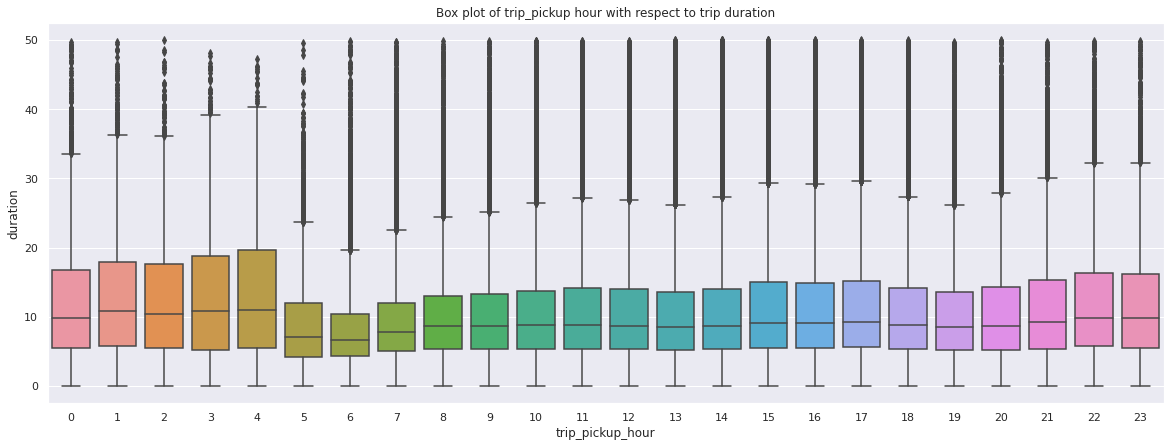

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

The duration of trip is higher in the early morning and late nights whereas in pickup_hour 5-7 AM the duration of trip is lowest.

The median trip duration of trips taken from 236 is 7.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


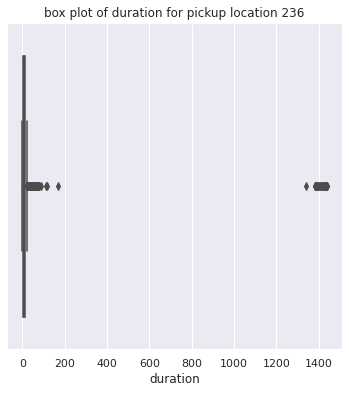

The median trip duration of trips taken from 237 is 7.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


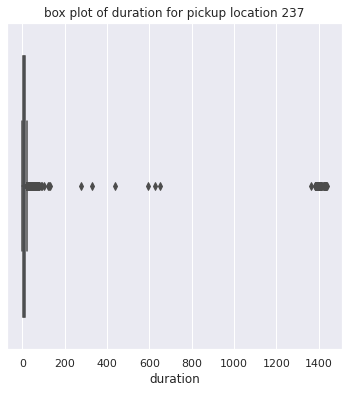

The median trip duration of trips taken from 186 is 8.95


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


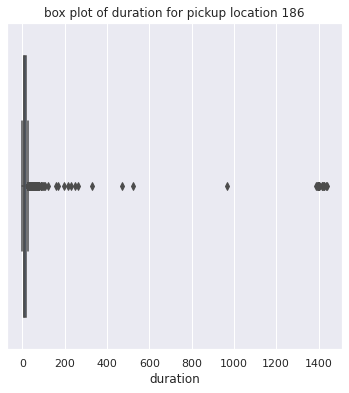

The median trip duration of trips taken from 140 is 9.716666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


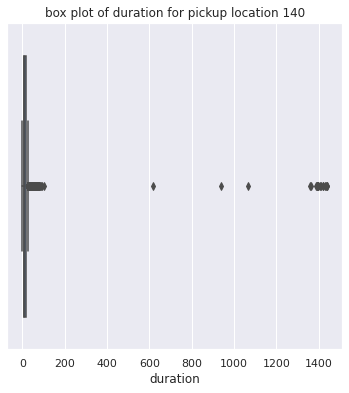

The median trip duration of trips taken from 141 is 7.666666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


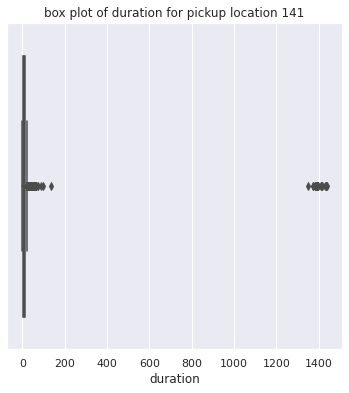

The median trip duration of trips taken from 263 is 7.783333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


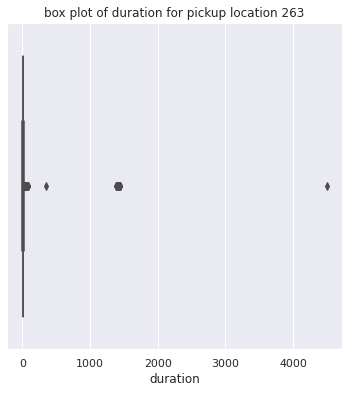

The median trip duration of trips taken from 48 is 8.083333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


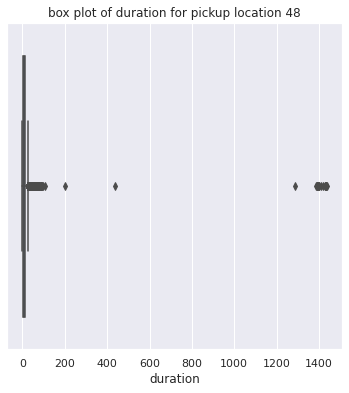

The median trip duration of trips taken from 238 is 8.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


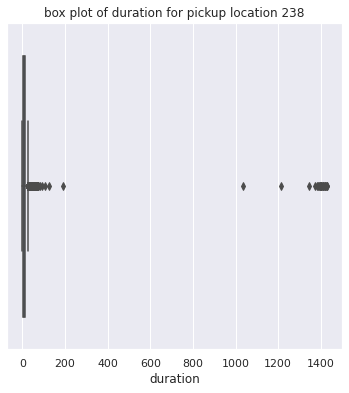

The median trip duration of trips taken from 142 is 8.366666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


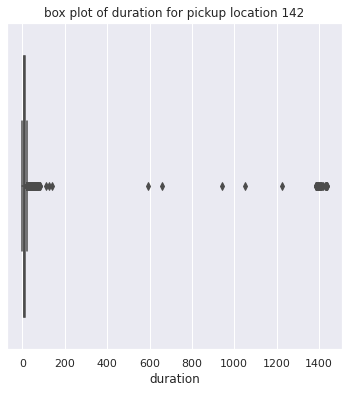

The median trip duration of trips taken from 170 is 8.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


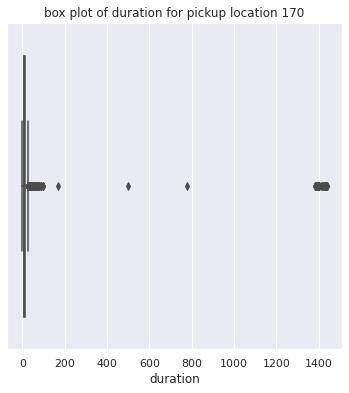

In [ ]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

As seen from the above plot the busiset location not has the longest duration of trip, but the other busiset location that is 140 has higher duration (thats why that location has higher fare_amount too)

### Analyse Routes

We could analyse routes with fare_amount or total_taxes and duration for different time of the day.

In [ ]:
# counting the routes of the trip_data
trip_route_value_counts = trip_data['routes'].value_counts()

In [ ]:
trip_route_value_counts.head(10)

264-264    2759
237-236    2721
236-237    2390
236-236    2346
75-74      2009
237-237    1928
75-75      1813
263-75     1746
263-141    1658
236-75     1655
Name: routes, dtype: int64

In [ ]:
# 10 busiest routes in trip_data
trip_route_top_10 = trip_route_value_counts.nlargest(10).index

In [ ]:
trip_route_top_10

Index(['264-264', '237-236', '236-237', '236-236', '75-74', '237-237', '75-75',
       '263-75', '263-141', '236-75'],
      dtype='object')

the fare amount for the route 264-264 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


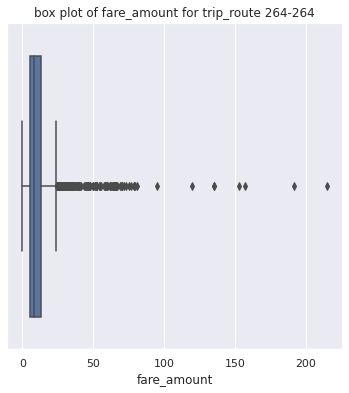

the fare amount for the route 237-236 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


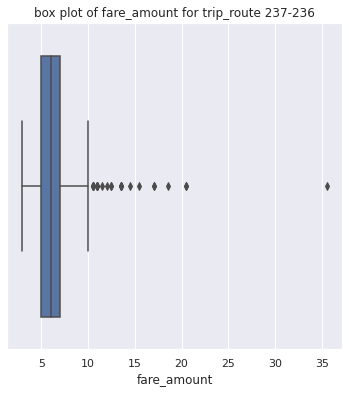

the fare amount for the route 236-237 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


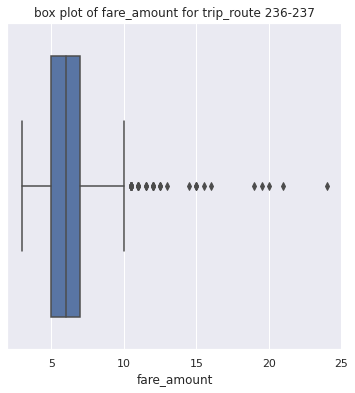

the fare amount for the route 236-236 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


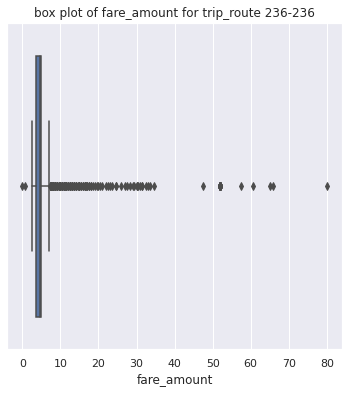

the fare amount for the route 75-74 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


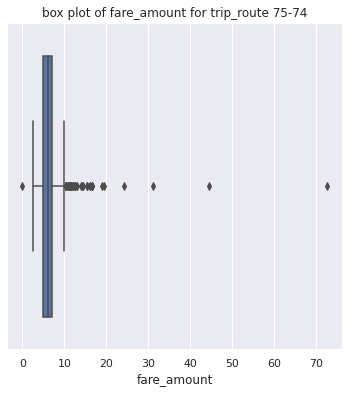

the fare amount for the route 237-237 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


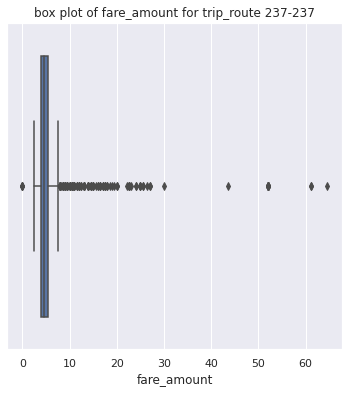

the fare amount for the route 75-75 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


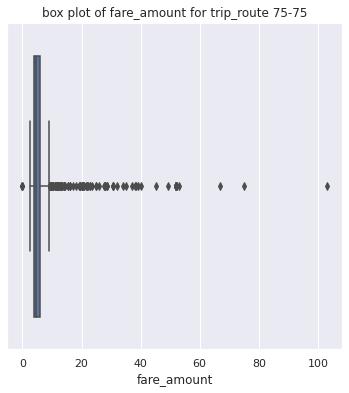

the fare amount for the route 263-75 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


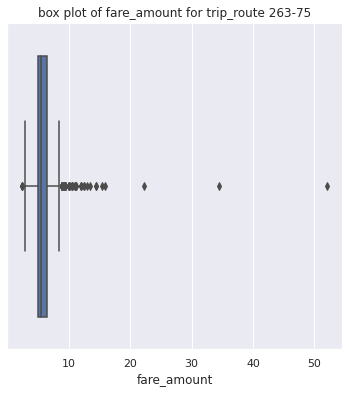

the fare amount for the route 263-141 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


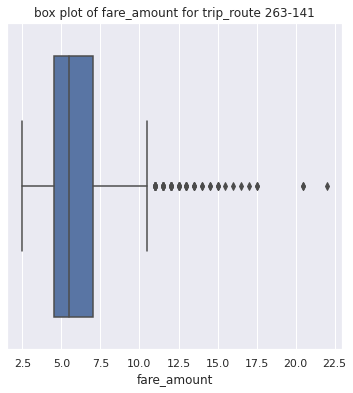

the fare amount for the route 236-75 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


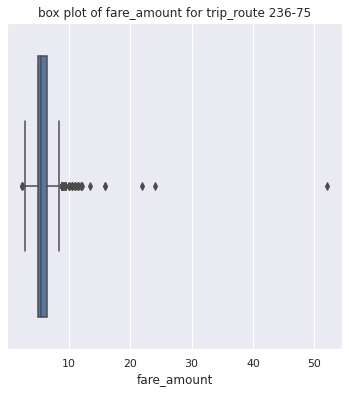

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median fare_amount for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['fare_amount'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From above plot it is clear that the busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is lower than the other Busiset trip_routes.

the trip_route 264-264 has the highest fare_amount of 8.5 median.Its worthnoting that these route should be kept in mind for business prospect.

the fare amount for the route 264-264 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


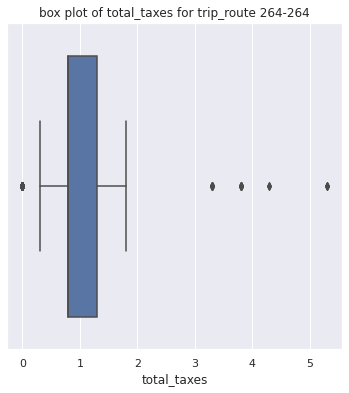

the fare amount for the route 237-236 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


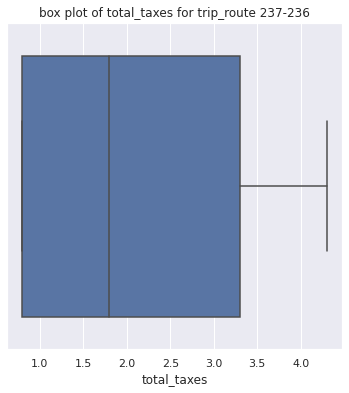

the fare amount for the route 236-237 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


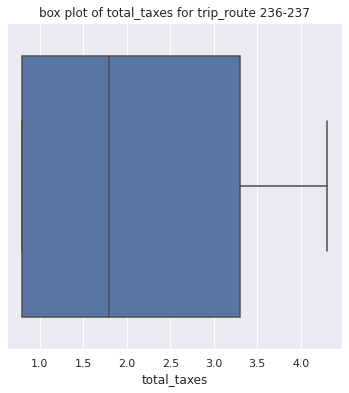

the fare amount for the route 236-236 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


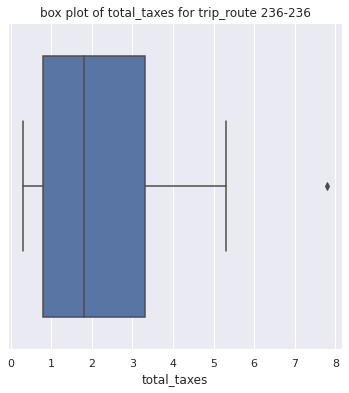

the fare amount for the route 75-74 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


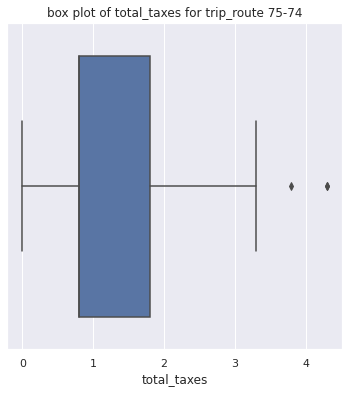

the fare amount for the route 237-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


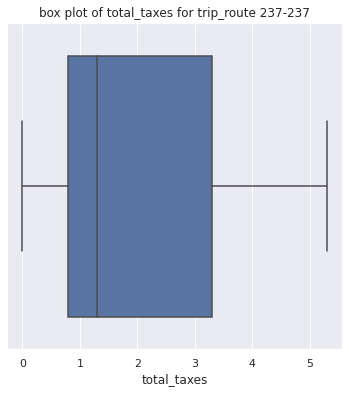

the fare amount for the route 75-75 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


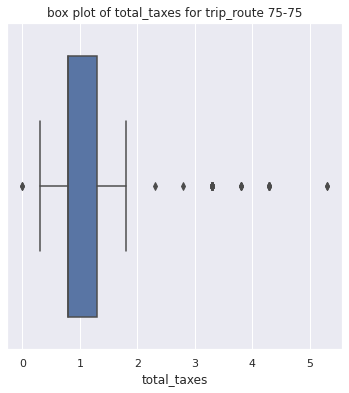

the fare amount for the route 263-75 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


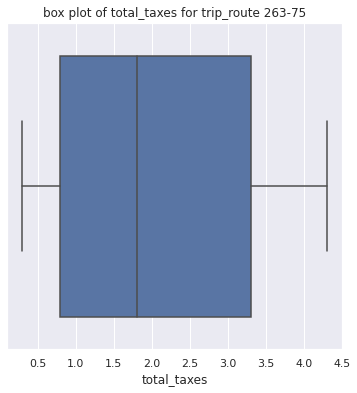

the fare amount for the route 263-141 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


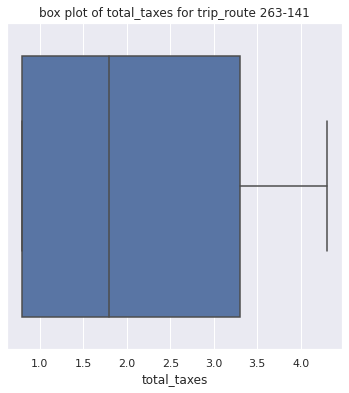

the fare amount for the route 236-75 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


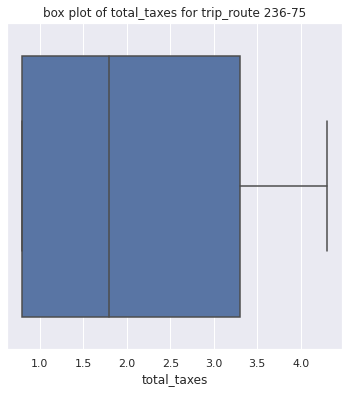

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['total_taxes'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['total_taxes'],ax=ax)
    # set_title
    ax.set_title('box plot of total_taxes for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 and 1.8 dollars, but the trip_route 264-264 and 75-74 lowest total_tax i.e 0.8 dollars as well.

As we seen from fare_amount plot of routes, the 264-264 route has higher fare amount as compared to other routes but it could be higher because of lower taxes applied on the these route as shown in above plot. as it has lowest total_tax value of 0.8 dollars

the duration for the route 264-264 is 6.966666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


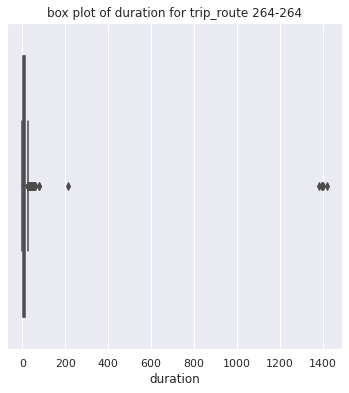

the duration for the route 237-236 is 5.016666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


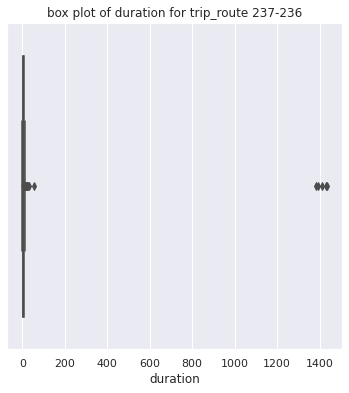

the duration for the route 236-237 is 5.533333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


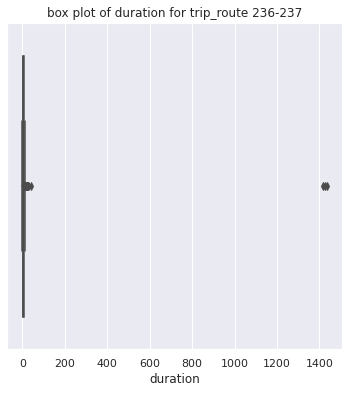

the duration for the route 236-236 is 3.183333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


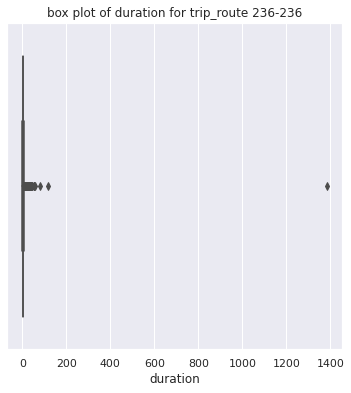

the duration for the route 75-74 is 5.183333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


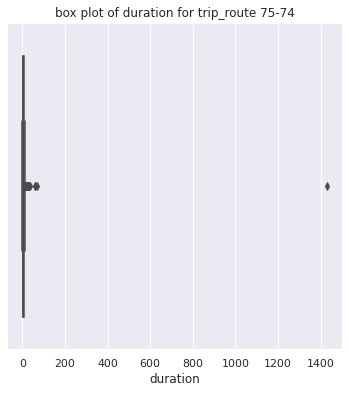

the duration for the route 237-237 is 3.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


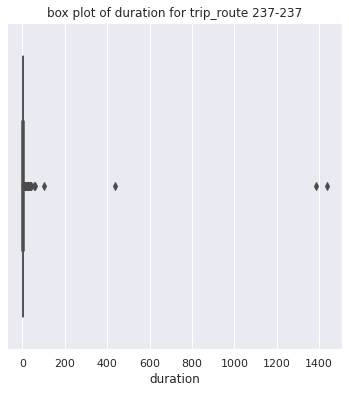

the duration for the route 75-75 is 3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


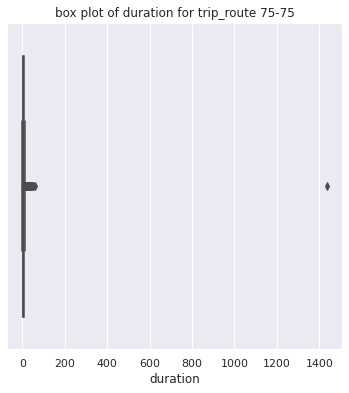

the duration for the route 263-75 is 4.933333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


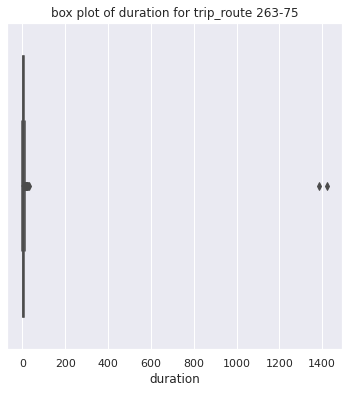

the duration for the route 263-141 is 4.533333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


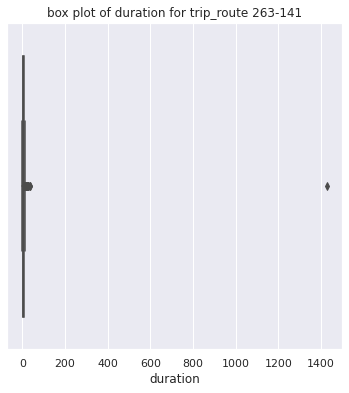

the duration for the route 236-75 is 4.566666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


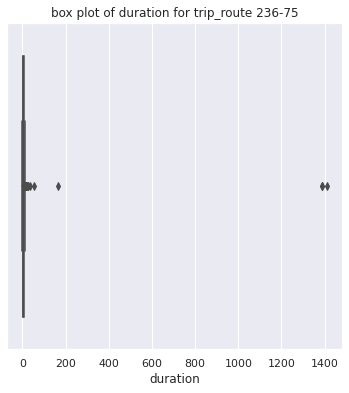

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the duration for the route " + trip_route +' '+ 'is ' + str(trip_route_df['duration'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe  trip_route_df 
    sns.boxplot(trip_route_df['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for trip_route '+ trip_route)
    sns.set()
    plt.show()

As seen from the above plot that the busisest location 264-264 has 6.96, highest duration as compared other busisest location.

## Final Results from EDA

fare_amount - most of the fare amount is within 8.5 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 940 dollars.

tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 400 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. There is very less outliers.

total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.some Heavy outlier exist of 1100 dollar

duration - most of the values in duration is within 8.86 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4000 minutes.

trip_distance - most of the trip_distance is within 1.7 miles value as is shown by the median. only a heavy outliers exit of around 22k miles.

most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Trip Hour

1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 9 min.

2) Peak hour for the pick up and drop off is around evening from 13 to 16. The busiest time is 15 PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while Tuesday is the busiest.

2)Weekdays have heavy taxi uses compared to the weekands

location_ID-The busiest location in terms of pickup are 236 and 237

The busiest location for dropoff too are 236 , 237 and 79 busiest locations but 236 is far more busiest than the other two in drop_off hour.

The mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

The fare_amount in late nigth is comparitively higher than the rest of the hours(same pattern seen in both the cases).

Also the median fare_amount between 5 - 6 is less than all others hours of the day(seen in bothe cases)

The median of tip_amount in early morning is mostly zero.And in between 11 -14 the tip_amount is minimum and almost constant, whereas tip amount is on higher side in evenings.

The taxs imposed from 16 to 19 is much higher as compared to the other hours beacue traffic surcharge.

The taxes in the period between 6 to 15 is much lower than the other pick_up hours

Pricing overall does not change much with respect to day of week.But total taxes are higher in weekdays compared to weekands

For one of the most busiest pickup location i.e 236 has median fare_amount is low in comparison to other busiset location.

It is also observe that the median fare_amount is highest for the location ID 140 which is about 9.5 dollars

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

The duration of trip is higher in the early morning and late nights whereas in pickup_hour 5-7 AM the duration of trip is lowest.

The busiset location not has the longest duration of trip, but the other busiset location that is 140 has higher duration (thats why that location has higher fare_amount too)

The busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is lower than the other Busiset trip_routes.

The trip_route 264-264 has the highest fare_amount of 8.5 median.Its worthnoting that these route should be kept in mind for business prospect.

Almost all routes has same total_tax of 1.3 and 1.8 dollars, but the trip_route 264-264 and 75-74 lowest total_tax i.e 0.8 dollars as well.

As we seen from fare_amount plot of routes, the 264-264 route has higher fare amount as compared to other routes but it could be higher because of lower taxes applied on the these route as shown in above plot. as it has lowest total_tax value of 0.8 dollars

The busisest location 264-264 has 6.96, highest duration as compared other busisest location.

# Final Output

•	Foremost important thing that was obtained from data, the number of trips in post-pandemic period (June 2022) is greatly reduced around 93% as compared to in pre-pandemic period (February 2022).

•	Fare amount decreases little bit after pandemic i.e., 9 to around 8.5, but there is a significant change in maximum amount it will reach around 940 dollars which is around 6000 dollars in pre-pandemic period.

•	Tip amount also decreases from 2 dollars to 1.5 dollars.

•	Toll amount not significant change between periods.

•	Total Taxes: There is no change in total taxes.

•	Duration of the trip decreased from around 12 min to 8.6 min after the pandemic period. 

•	Trip Distance: There is not such a significant change in trip distance.

•	Payment type: Credit card will be more preferred for payment followed by cash in both periods.

•	Trip Pickup / Trip Dropoff: For trip pick up the peak hours in pre-pandemic is in evening from 5PM to 7PM and busiest time was 6PM, but in post-pandemic it will be around 1PM to 4PM with busiest time was 3PM. The drop off time for trip is almost same as pick up hours in both periods.

•	Trip Day: Tuesday is the day on which there are a greater number of trips occurred while Sunday with a smaller number of trips done in pre-pandemic period. But in post-pandemic period Saturday is the busiest day with most number while Sunday with smaller number of trips occurred.

•	Location: The busiest location for pickup and drop off 161 ,237 and 236 in pre-pandemic period, while in post-pandemic it will be 236 and 237.

•	Mostly 1 or 2 passengers avail the cab in both periods.

•	Busiest routes are 237-236 and 236-236 in pre-pandemic and in post-pandemic it will be 264-264 and 237-236.

•	In pre-pandemic period the fare amount almost constant throughout pickup hours, but in post-pandemic in late night trips the fare amount more as trips occurred in day pickup hours.

•	The tip amount is less in the morning period and almost constant for remaining period in pre-pandemic while it is more in evening and almost 0 in late night trips in post-pandemic.

•	Total taxes are almost same in both periods. The variation in total taxes is higher in early morning in pre-pandemic but after pandemic the variation in early morning are negligible.

•	Total taxes are more in weekdays in post-pandemic but not much significant change in pre-pandemic.

•	The median fare amount was highest in location id 186 in pre-pandemic, in post-pandemic the fare amount is highest for location id 140 (it was seen in the 10 busiest locations and it’s worth noting that both of above id’s are not busiest one hence we can conclude that busiest location doesn’t assure you higher revenue generation.) (These are those 2 locations where duration of trip is also high)

•	As far as routes are concerned the route 161-237 has higher median fare amount in pre pandemic, whereas in post pandemic route 264-264 has highest fare amount. (it was seen in the 10 busiest route and it’s worth noting that both of above id’s are not busiest one hence we can conclude that busiest route doesn’t assure you higher revenue generation.) (These are those 2 routes where duration of trip is also high)



